___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [7]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum().any()

False

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [11]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

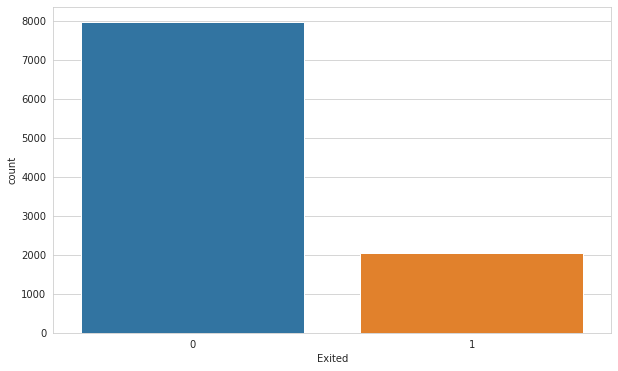

In [13]:
sns.countplot(df["Exited"])

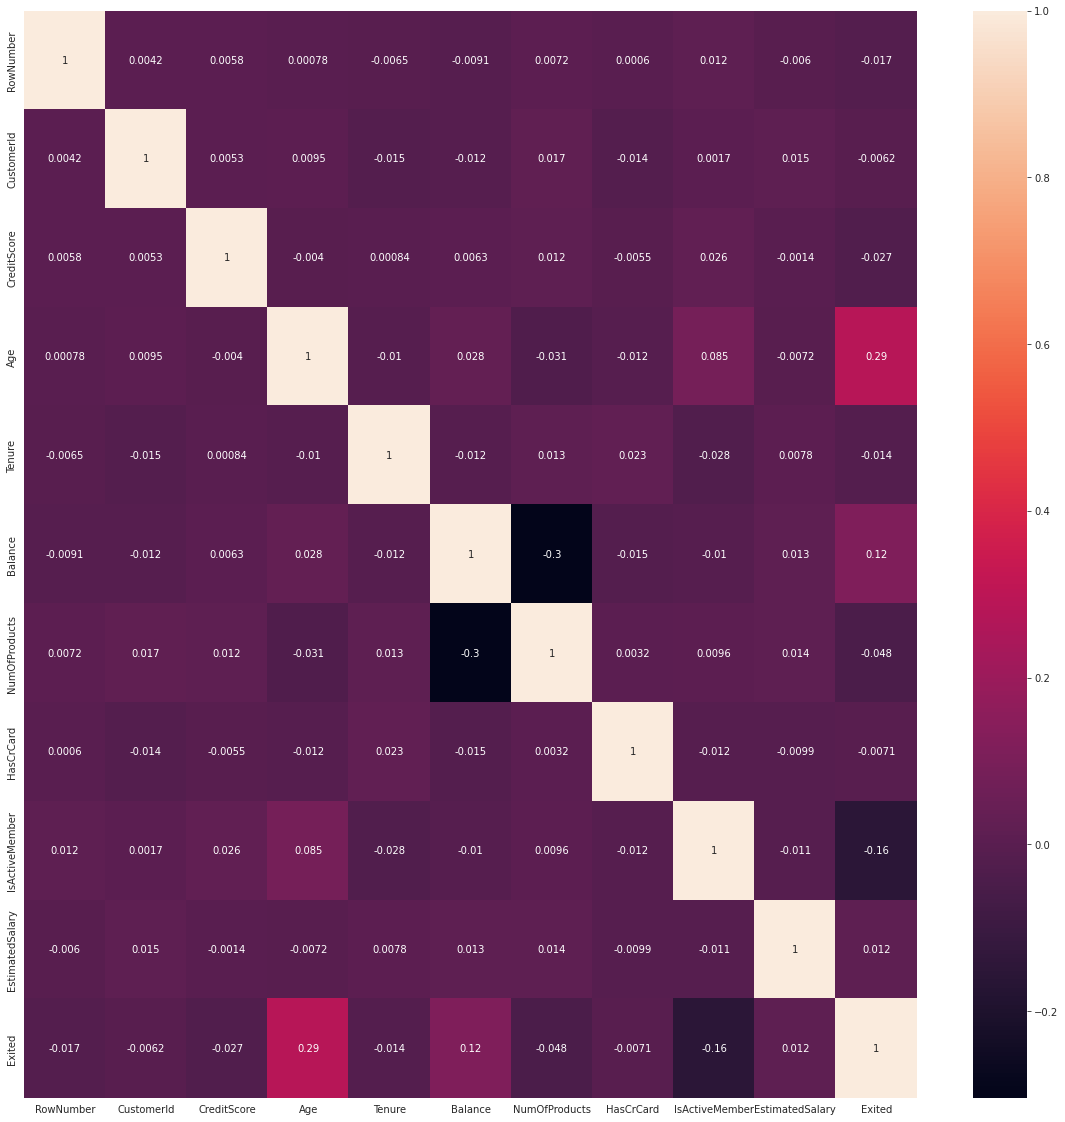

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [14]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [22]:
df.shape

(10000, 11)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


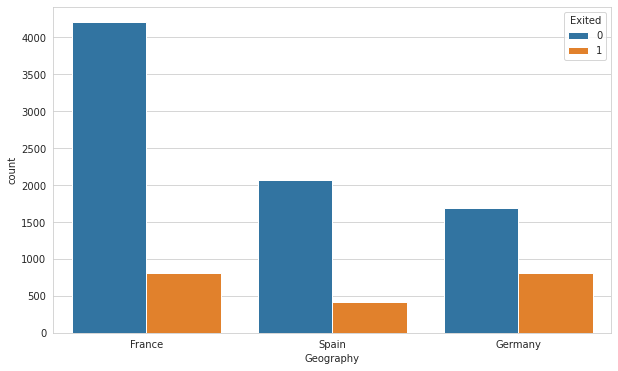

In [17]:
sns.countplot(x='Geography', hue = 'Exited',data = df)

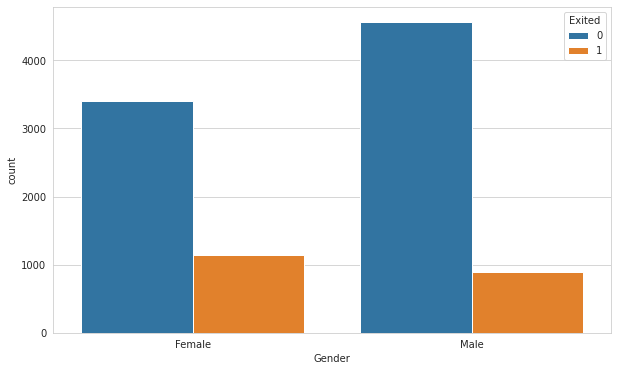

In [19]:
sns.countplot(x='Gender', hue = 'Exited', data=df)

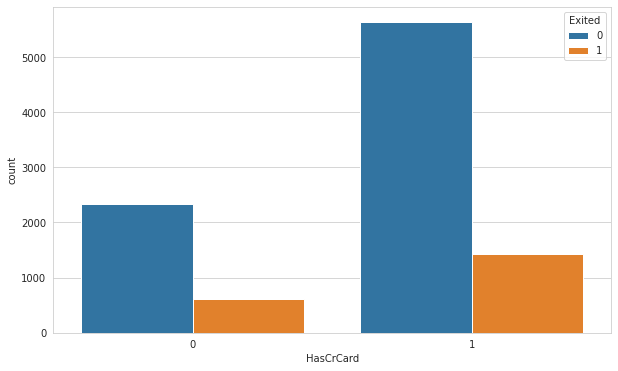

In [20]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = df)

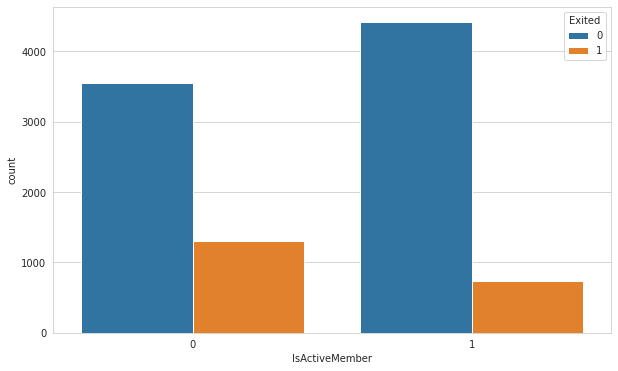

In [21]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df)

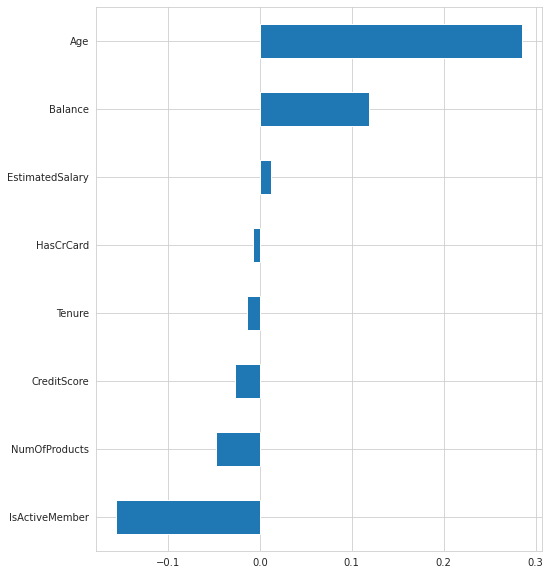

In [23]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [25]:
df['Geography'] = df['Geography'].replace(['Germany'],'0')
df['Geography'] = df['Geography'].replace(['France'],'1')
df['Geography'] = df['Geography'].replace(['Spain'],'2')


In [26]:
df['Gender'] = df['Gender'].replace(['Female'],'0')
df['Gender'] = df['Gender'].replace(['Male'],'1')

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.000,1,1,1,101348.880,1
1,608,2,0,41,1,83807.860,1,0,1,112542.580,0
2,502,1,0,42,8,159660.800,3,1,0,113931.570,1
3,699,1,0,39,1,0.000,2,0,0,93826.630,0
4,850,2,0,43,2,125510.820,1,1,1,79084.100,0


In [28]:
df['Geography'] = pd.to_numeric(df['Geography'])
df['Gender'] = pd.to_numeric(df['Gender'])
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Preprocessing of Data
- Train | Test Split, Scalling

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [43]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [44]:
seed = 42

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = seed)

In [46]:
scaler = StandardScaler()

In [47]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [49]:
X_train.shape

(8000, 10)

In [50]:
X_test.shape

(2000, 10)

In [51]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [53]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8649 - val_loss: 0.3213 - val_accuracy: 0.8712
Epoch 2/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8676 - val_loss: 0.3231 - val_accuracy: 0.8575
Epoch 3/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3098 - accuracy: 0.8660 - val_loss: 0.3194 - val_accuracy: 0.8625
Epoch 4/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8693 - val_loss: 0.3347 - val_accuracy: 0.8687
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8675 - val_loss: 0.3267 - val_accuracy: 0.8725
Epoch 6/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3078 - accuracy: 0.8707 - val_loss: 0.3237 - val_accuracy: 0.8687
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.8690 - val_loss: 0.3240 - val_accuracy:

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                396       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,243
Trainable params: 1,243
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [55]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.312,0.865,0.321,0.871
1,0.310,0.868,0.323,0.858
2,0.310,0.866,0.319,0.863
3,0.309,0.869,0.335,0.869
4,0.309,0.868,0.327,0.873


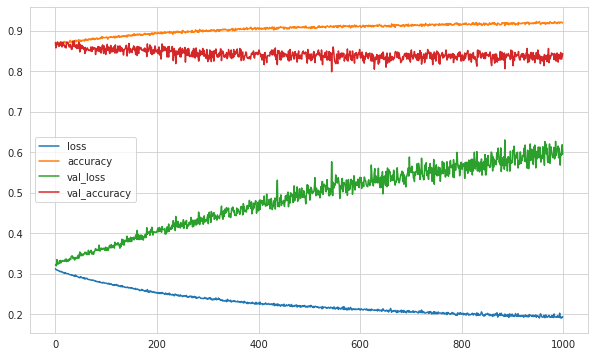

In [56]:
loss_df.plot();

In [57]:
model.evaluate(X_test, y_test, verbose=0)

[0.6236419081687927, 0.8255000114440918]

In [58]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.6236419081687927
accuracy :  0.8255000114440918


In [59]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1465  128]
 [ 221  186]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1593
           1       0.59      0.46      0.52       407

    accuracy                           0.83      2000
   macro avg       0.73      0.69      0.70      2000
weighted avg       0.81      0.83      0.82      2000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [77]:
from sklearn.utils import class_weight

In [79]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)

In [80]:
class_weights

array([0.62794349, 2.45398773])

In [84]:
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

### Create The Model

In [85]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1, class_weight=class_weights)

Epoch 1/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.2768 - accuracy: 0.8836 - val_loss: 0.6137 - val_accuracy: 0.8138
Epoch 2/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.2691 - accuracy: 0.8842 - val_loss: 0.7160 - val_accuracy: 0.7700
Epoch 3/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.2618 - accuracy: 0.8886 - val_loss: 0.6985 - val_accuracy: 0.7825
Epoch 4/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.2613 - accuracy: 0.8865 - val_loss: 0.6429 - val_accuracy: 0.7987
Epoch 5/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.2561 - accuracy: 0.8889 - val_loss: 0.6478 - val_accuracy: 0.7975
Epoch 6/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.2603 - accuracy: 0.8885 - val_loss: 0.6496 - val_accuracy: 0.7975
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.8861 - val_loss: 0.7087 - val_accuracy:

In [86]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.277,0.884,0.614,0.814
1,0.269,0.884,0.716,0.770
2,0.262,0.889,0.699,0.783
3,0.261,0.887,0.643,0.799
4,0.256,0.889,0.648,0.798


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

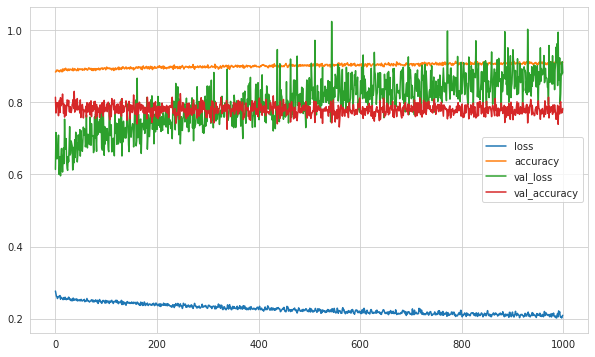

In [87]:
loss_df.plot();

In [88]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1321  272]
 [ 168  239]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1593
           1       0.47      0.59      0.52       407

    accuracy                           0.78      2000
   macro avg       0.68      0.71      0.69      2000
weighted avg       0.80      0.78      0.79      2000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [89]:
from tensorflow.keras.optimizers import Adam

In [90]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [91]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1, class_weight=class_weights)

Epoch 1/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.5585 - accuracy: 0.7387 - val_loss: 0.4345 - val_accuracy: 0.8012
Epoch 2/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4922 - accuracy: 0.7797 - val_loss: 0.4561 - val_accuracy: 0.7837
Epoch 3/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7849 - val_loss: 0.4320 - val_accuracy: 0.7975
Epoch 4/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4696 - accuracy: 0.7894 - val_loss: 0.3804 - val_accuracy: 0.8512
Epoch 5/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4639 - accuracy: 0.7976 - val_loss: 0.4354 - val_accuracy: 0.7925
Epoch 6/1000
225/225 [==============================] - 1s 4ms/step - loss: 0.4607 - accuracy: 0.7917 - val_loss: 0.4256 - val_accuracy: 0.7862
Epoch 7/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4567 - accuracy: 0.7924 - val_loss: 0.4235 - val_accuracy:

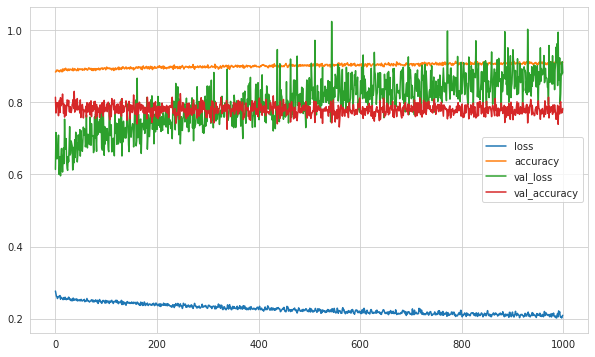

In [92]:
loss_df.plot();

In [93]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1241  352]
 [ 134  273]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1593
           1       0.44      0.67      0.53       407

    accuracy                           0.76      2000
   macro avg       0.67      0.72      0.68      2000
weighted avg       0.81      0.76      0.77      2000



### Add Dropout Layer

In [94]:
from tensorflow.keras.layers import Dropout

In [95]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [96]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1, class_weight=class_weights)

Epoch 1/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.7080 - accuracy: 0.5243 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 2/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.4872 - val_loss: 0.6779 - val_accuracy: 0.5638
Epoch 3/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.6775 - accuracy: 0.4740 - val_loss: 0.6492 - val_accuracy: 0.6363
Epoch 4/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.6595 - accuracy: 0.5374 - val_loss: 0.6268 - val_accuracy: 0.6525
Epoch 5/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.6524 - accuracy: 0.5685 - val_loss: 0.6191 - val_accuracy: 0.6737
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.5826 - val_loss: 0.5908 - val_accuracy: 0.7100
Epoch 7/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.6309 - accuracy: 0.6172 - val_loss: 0.5722 - val_accuracy:

In [97]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1255  338]
 [ 102  305]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.75      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



### Add Early Stop

In [98]:
from tensorflow.keras.callbacks import EarlyStopping

In [99]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

#### Monitor the "val_loss" as metric

In [100]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [101]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.6225 - accuracy: 0.6879 - val_loss: 0.5453 - val_accuracy: 0.7237
Epoch 2/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.5348 - accuracy: 0.7360 - val_loss: 0.5158 - val_accuracy: 0.7425
Epoch 3/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7586 - val_loss: 0.4704 - val_accuracy: 0.7713
Epoch 4/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4829 - accuracy: 0.7729 - val_loss: 0.4244 - val_accuracy: 0.8213
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7868 - val_loss: 0.4392 - val_accuracy: 0.7975
Epoch 6/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4642 - accuracy: 0.7885 - val_loss: 0.4518 - val_accuracy: 0.7800
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7894 - val_loss: 0.4057 - val_accuracy:

In [102]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1337  256]
 [ 117  290]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1593
           1       0.53      0.71      0.61       407

    accuracy                           0.81      2000
   macro avg       0.73      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000



#### Monitor the "val_recall" as metric

In [103]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [104]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.4412 - accuracy: 0.8039

225/225 [==============================] - 1s 3ms/step - loss: 0.4391 - accuracy: 0.8036 - val_loss: 0.4186 - val_accuracy: 0.7962
Epoch 2/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.4331 - accuracy: 0.8098

225/225 [==============================] - 1s 3ms/step - loss: 0.4378 - accuracy: 0.8078 - val_loss: 0.4503 - val_accuracy: 0.7837
Epoch 3/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.4367 - accuracy: 0.8048

225/225 [==============================] - 1s 5ms/step - loss: 0.4365 - accuracy: 0.8054 - val_loss: 0.4344 - val_accuracy: 0.7925
Epoch 4/1000
218/225 [============================>.] - ETA: 0s - loss: 0.4366 - accuracy: 0.8058

225/225 [==============================] - 1s 6ms/step - loss: 0.4347 - accuracy: 0.8050 - val_loss: 0.3994 - val_accuracy: 0.8150
Epoch 5/1000
223/225 [============================>.] - ETA: 0s - loss: 0.4331 - accuracy: 0.8080

225/225 [==============================] - 1s 4ms/step - loss: 0.4338 - accuracy: 0.8076 - val_loss: 0.4177 - val_accuracy: 0.8087
Epoch 6/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.4339 - accuracy: 0.8041

225/225 [==============================] - 1s 2ms/step - loss: 0.4318 - accuracy: 0.8062 - val_loss: 0.4291 - val_accuracy: 0.7962
Epoch 7/1000
218/225 [============================>.] - ETA: 0s - loss: 0.4294 - accuracy: 0.8063

225/225 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8065 - val_loss: 0.3967 - val_accuracy: 0.8075
Epoch 8/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.4334 - accuracy: 0.8088

225/225 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8104 - val_loss: 0.4156 - val_accuracy: 0.8112
Epoch 9/1000
219/225 [============================>.] - ETA: 0s - loss: 0.4284 - accuracy: 0.8055

225/225 [==============================] - 1s 2ms/step - loss: 0.4276 - accuracy: 0.8072 - val_loss: 0.3946 - val_accuracy: 0.8125
Epoch 10/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.4270 - accuracy: 0.8068

225/225 [==============================] - 1s 2ms/step - loss: 0.4273 - accuracy: 0.8069 - val_loss: 0.4247 - val_accuracy: 0.8025
Epoch 11/1000
222/225 [============================>.] - ETA: 0s - loss: 0.4256 - accuracy: 0.8091

225/225 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.8086 - val_loss: 0.4360 - val_accuracy: 0.8050
Epoch 12/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.4268 - accuracy: 0.8071

225/225 [==============================] - 1s 4ms/step - loss: 0.4257 - accuracy: 0.8090 - val_loss: 0.3866 - val_accuracy: 0.8163
Epoch 13/1000
222/225 [============================>.] - ETA: 0s - loss: 0.4232 - accuracy: 0.8063

225/225 [==============================] - 1s 4ms/step - loss: 0.4249 - accuracy: 0.8057 - val_loss: 0.4015 - val_accuracy: 0.8050
Epoch 14/1000
219/225 [============================>.] - ETA: 0s - loss: 0.4216 - accuracy: 0.8059

225/225 [==============================] - 1s 4ms/step - loss: 0.4216 - accuracy: 0.8064 - val_loss: 0.4329 - val_accuracy: 0.7962
Epoch 15/1000
218/225 [============================>.] - ETA: 0s - loss: 0.4231 - accuracy: 0.8116

225/225 [==============================] - 1s 4ms/step - loss: 0.4208 - accuracy: 0.8121 - val_loss: 0.3973 - val_accuracy: 0.8138
Epoch 16/1000
219/225 [============================>.] - ETA: 0s - loss: 0.4198 - accuracy: 0.8099

225/225 [==============================] - 1s 4ms/step - loss: 0.4195 - accuracy: 0.8099 - val_loss: 0.4155 - val_accuracy: 0.8025
Epoch 17/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.4180 - accuracy: 0.8120

225/225 [==============================] - 1s 3ms/step - loss: 0.4179 - accuracy: 0.8114 - val_loss: 0.4469 - val_accuracy: 0.7900
Epoch 18/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.4195 - accuracy: 0.8066

225/225 [==============================] - 1s 2ms/step - loss: 0.4170 - accuracy: 0.8065 - val_loss: 0.4223 - val_accuracy: 0.8037
Epoch 19/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.4099 - accuracy: 0.8116

225/225 [==============================] - 1s 2ms/step - loss: 0.4158 - accuracy: 0.8118 - val_loss: 0.4481 - val_accuracy: 0.7900
Epoch 20/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.4179 - accuracy: 0.8085

225/225 [==============================] - 1s 2ms/step - loss: 0.4168 - accuracy: 0.8115 - val_loss: 0.4348 - val_accuracy: 0.7950
Epoch 21/1000
220/225 [============================>.] - ETA: 0s - loss: 0.4140 - accuracy: 0.8118

225/225 [==============================] - 1s 2ms/step - loss: 0.4142 - accuracy: 0.8114 - val_loss: 0.4402 - val_accuracy: 0.7950
Epoch 22/1000
218/225 [============================>.] - ETA: 0s - loss: 0.4136 - accuracy: 0.8144

225/225 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8132 - val_loss: 0.4833 - val_accuracy: 0.7675
Epoch 23/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.4090 - accuracy: 0.8149

225/225 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8126 - val_loss: 0.4217 - val_accuracy: 0.8000
Epoch 24/1000
223/225 [============================>.] - ETA: 0s - loss: 0.4115 - accuracy: 0.8091

225/225 [==============================] - 1s 2ms/step - loss: 0.4116 - accuracy: 0.8082 - val_loss: 0.4146 - val_accuracy: 0.8087
Epoch 25/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.4123 - accuracy: 0.8113

225/225 [==============================] - 1s 2ms/step - loss: 0.4105 - accuracy: 0.8108 - val_loss: 0.4329 - val_accuracy: 0.7925
Epoch 26/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.4070 - accuracy: 0.8114

225/225 [==============================] - 1s 2ms/step - loss: 0.4099 - accuracy: 0.8108 - val_loss: 0.4237 - val_accuracy: 0.8025
Epoch 27/1000
199/225 [=========================>....] - ETA: 0s - loss: 0.4062 - accuracy: 0.8158

225/225 [==============================] - 1s 2ms/step - loss: 0.4084 - accuracy: 0.8163 - val_loss: 0.4131 - val_accuracy: 0.8012
Epoch 28/1000
225/225 [==============================] - ETA: 0s - loss: 0.4080 - accuracy: 0.8110

225/225 [==============================] - 1s 2ms/step - loss: 0.4080 - accuracy: 0.8110 - val_loss: 0.4453 - val_accuracy: 0.7887
Epoch 29/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.4042 - accuracy: 0.8154

225/225 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8144 - val_loss: 0.4419 - val_accuracy: 0.7962
Epoch 30/1000
201/225 [=========================>....] - ETA: 0s - loss: 0.4100 - accuracy: 0.8113

225/225 [==============================] - 1s 2ms/step - loss: 0.4057 - accuracy: 0.8138 - val_loss: 0.4274 - val_accuracy: 0.7937
Epoch 31/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.3995 - accuracy: 0.8192

225/225 [==============================] - 1s 2ms/step - loss: 0.4051 - accuracy: 0.8129 - val_loss: 0.4675 - val_accuracy: 0.7775
Epoch 32/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.4015 - accuracy: 0.8160

225/225 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8150 - val_loss: 0.4738 - val_accuracy: 0.7675
Epoch 33/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.4035 - accuracy: 0.8149

225/225 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8153 - val_loss: 0.4654 - val_accuracy: 0.7812
Epoch 34/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.4036 - accuracy: 0.8128

225/225 [==============================] - 1s 2ms/step - loss: 0.4037 - accuracy: 0.8139 - val_loss: 0.4413 - val_accuracy: 0.7837
Epoch 35/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.4030 - accuracy: 0.8126

225/225 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8128 - val_loss: 0.3894 - val_accuracy: 0.8100
Epoch 36/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.3965 - accuracy: 0.8178

225/225 [==============================] - 1s 2ms/step - loss: 0.4008 - accuracy: 0.8143 - val_loss: 0.4176 - val_accuracy: 0.8000
Epoch 37/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.3939 - accuracy: 0.8207

225/225 [==============================] - 1s 2ms/step - loss: 0.3985 - accuracy: 0.8179 - val_loss: 0.4540 - val_accuracy: 0.7812
Epoch 38/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.4032 - accuracy: 0.8134

225/225 [==============================] - 1s 2ms/step - loss: 0.3986 - accuracy: 0.8157 - val_loss: 0.3943 - val_accuracy: 0.8112
Epoch 39/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3980 - accuracy: 0.8181

225/225 [==============================] - 1s 2ms/step - loss: 0.3965 - accuracy: 0.8185 - val_loss: 0.4012 - val_accuracy: 0.8087
Epoch 40/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.3981 - accuracy: 0.8185

225/225 [==============================] - 1s 2ms/step - loss: 0.4009 - accuracy: 0.8154 - val_loss: 0.4743 - val_accuracy: 0.7788
Epoch 41/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.3989 - accuracy: 0.8130

225/225 [==============================] - 1s 2ms/step - loss: 0.3971 - accuracy: 0.8136 - val_loss: 0.4392 - val_accuracy: 0.7900
Epoch 42/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3959 - accuracy: 0.8160

225/225 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8149 - val_loss: 0.3981 - val_accuracy: 0.8087
Epoch 43/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.3976 - accuracy: 0.8159

225/225 [==============================] - 1s 2ms/step - loss: 0.3971 - accuracy: 0.8163 - val_loss: 0.4528 - val_accuracy: 0.7862
Epoch 44/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.3941 - accuracy: 0.8188

225/225 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8163 - val_loss: 0.4332 - val_accuracy: 0.7887
Epoch 45/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.3877 - accuracy: 0.8202

225/225 [==============================] - 1s 2ms/step - loss: 0.3941 - accuracy: 0.8156 - val_loss: 0.4472 - val_accuracy: 0.7825
Epoch 46/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3893 - accuracy: 0.8175

225/225 [==============================] - 1s 2ms/step - loss: 0.3925 - accuracy: 0.8164 - val_loss: 0.4192 - val_accuracy: 0.7950
Epoch 47/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3935 - accuracy: 0.8148

225/225 [==============================] - 1s 2ms/step - loss: 0.3930 - accuracy: 0.8154 - val_loss: 0.4047 - val_accuracy: 0.7975
Epoch 48/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3905 - accuracy: 0.8162

225/225 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8163 - val_loss: 0.4620 - val_accuracy: 0.7887
Epoch 49/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3890 - accuracy: 0.8157

225/225 [==============================] - 1s 2ms/step - loss: 0.3891 - accuracy: 0.8160 - val_loss: 0.4916 - val_accuracy: 0.7638
Epoch 50/1000
199/225 [=========================>....] - ETA: 0s - loss: 0.3901 - accuracy: 0.8150

225/225 [==============================] - 1s 2ms/step - loss: 0.3912 - accuracy: 0.8150 - val_loss: 0.4312 - val_accuracy: 0.7912
Epoch 51/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3907 - accuracy: 0.8178

225/225 [==============================] - 1s 3ms/step - loss: 0.3903 - accuracy: 0.8174 - val_loss: 0.4743 - val_accuracy: 0.7675
Epoch 52/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.3885 - accuracy: 0.8190

225/225 [==============================] - 1s 2ms/step - loss: 0.3915 - accuracy: 0.8149 - val_loss: 0.4520 - val_accuracy: 0.7837
Epoch 53/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3884 - accuracy: 0.8215

225/225 [==============================] - 1s 2ms/step - loss: 0.3892 - accuracy: 0.8213 - val_loss: 0.4334 - val_accuracy: 0.7788
Epoch 54/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3880 - accuracy: 0.8170

225/225 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8165 - val_loss: 0.4524 - val_accuracy: 0.7850
Epoch 55/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.3896 - accuracy: 0.8156

225/225 [==============================] - 1s 2ms/step - loss: 0.3884 - accuracy: 0.8149 - val_loss: 0.4207 - val_accuracy: 0.7937
Epoch 56/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3864 - accuracy: 0.8204

225/225 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8189 - val_loss: 0.4432 - val_accuracy: 0.7800
Epoch 57/1000
199/225 [=========================>....] - ETA: 0s - loss: 0.3832 - accuracy: 0.8258

225/225 [==============================] - 1s 2ms/step - loss: 0.3872 - accuracy: 0.8235 - val_loss: 0.4710 - val_accuracy: 0.7738
Epoch 58/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3862 - accuracy: 0.8173

225/225 [==============================] - 1s 2ms/step - loss: 0.3879 - accuracy: 0.8161 - val_loss: 0.4369 - val_accuracy: 0.7900
Epoch 59/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3832 - accuracy: 0.8168

225/225 [==============================] - 1s 3ms/step - loss: 0.3845 - accuracy: 0.8171 - val_loss: 0.4904 - val_accuracy: 0.7613
Epoch 60/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3822 - accuracy: 0.8163

225/225 [==============================] - 1s 2ms/step - loss: 0.3846 - accuracy: 0.8167 - val_loss: 0.4348 - val_accuracy: 0.7875
Epoch 61/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.3812 - accuracy: 0.8188

225/225 [==============================] - 1s 3ms/step - loss: 0.3838 - accuracy: 0.8172 - val_loss: 0.4910 - val_accuracy: 0.7663
Epoch 62/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3862 - accuracy: 0.8206

225/225 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8200 - val_loss: 0.4495 - val_accuracy: 0.7875
Epoch 63/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.3797 - accuracy: 0.8204

225/225 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8201 - val_loss: 0.4443 - val_accuracy: 0.7837
Epoch 64/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3821 - accuracy: 0.8185

225/225 [==============================] - 1s 2ms/step - loss: 0.3821 - accuracy: 0.8189 - val_loss: 0.4186 - val_accuracy: 0.7912
Epoch 65/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3763 - accuracy: 0.8211

225/225 [==============================] - 1s 2ms/step - loss: 0.3805 - accuracy: 0.8176 - val_loss: 0.4421 - val_accuracy: 0.7950
Epoch 66/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3792 - accuracy: 0.8216

225/225 [==============================] - 1s 2ms/step - loss: 0.3797 - accuracy: 0.8215 - val_loss: 0.4660 - val_accuracy: 0.7775
Epoch 67/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.3731 - accuracy: 0.8183

225/225 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8176 - val_loss: 0.4689 - val_accuracy: 0.7812
Epoch 68/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3755 - accuracy: 0.8242

225/225 [==============================] - 1s 3ms/step - loss: 0.3782 - accuracy: 0.8218 - val_loss: 0.4783 - val_accuracy: 0.7675
Epoch 69/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.3737 - accuracy: 0.8193

225/225 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.8192 - val_loss: 0.4684 - val_accuracy: 0.7788
Epoch 70/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3763 - accuracy: 0.8195

225/225 [==============================] - 1s 2ms/step - loss: 0.3776 - accuracy: 0.8186 - val_loss: 0.4833 - val_accuracy: 0.7750
Epoch 71/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3758 - accuracy: 0.8203

225/225 [==============================] - 1s 2ms/step - loss: 0.3771 - accuracy: 0.8204 - val_loss: 0.4220 - val_accuracy: 0.8000
Epoch 72/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3747 - accuracy: 0.8202

225/225 [==============================] - 1s 2ms/step - loss: 0.3756 - accuracy: 0.8194 - val_loss: 0.4525 - val_accuracy: 0.7800
Epoch 73/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3721 - accuracy: 0.8241

225/225 [==============================] - 1s 2ms/step - loss: 0.3740 - accuracy: 0.8236 - val_loss: 0.4510 - val_accuracy: 0.7825
Epoch 74/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3796 - accuracy: 0.8200

225/225 [==============================] - 1s 3ms/step - loss: 0.3774 - accuracy: 0.8215 - val_loss: 0.4222 - val_accuracy: 0.7937
Epoch 75/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3740 - accuracy: 0.8230

225/225 [==============================] - 1s 2ms/step - loss: 0.3741 - accuracy: 0.8229 - val_loss: 0.4272 - val_accuracy: 0.7937
Epoch 76/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.3718 - accuracy: 0.8240

225/225 [==============================] - 1s 2ms/step - loss: 0.3738 - accuracy: 0.8224 - val_loss: 0.4751 - val_accuracy: 0.7725
Epoch 77/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.3751 - accuracy: 0.8207

225/225 [==============================] - 1s 2ms/step - loss: 0.3733 - accuracy: 0.8208 - val_loss: 0.4304 - val_accuracy: 0.7950
Epoch 78/1000
200/225 [=========================>....] - ETA: 0s - loss: 0.3729 - accuracy: 0.8233

225/225 [==============================] - 1s 2ms/step - loss: 0.3729 - accuracy: 0.8218 - val_loss: 0.4194 - val_accuracy: 0.8062
Epoch 79/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.3749 - accuracy: 0.8253

225/225 [==============================] - 1s 2ms/step - loss: 0.3708 - accuracy: 0.8274 - val_loss: 0.4273 - val_accuracy: 0.7987
Epoch 80/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3707 - accuracy: 0.8259

225/225 [==============================] - 1s 2ms/step - loss: 0.3713 - accuracy: 0.8242 - val_loss: 0.5202 - val_accuracy: 0.7575
Epoch 81/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3736 - accuracy: 0.8203

225/225 [==============================] - 1s 3ms/step - loss: 0.3722 - accuracy: 0.8214 - val_loss: 0.4442 - val_accuracy: 0.7837
Epoch 82/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3719 - accuracy: 0.8245

225/225 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.8256 - val_loss: 0.4132 - val_accuracy: 0.7950
Epoch 83/1000
225/225 [==============================] - ETA: 0s - loss: 0.3683 - accuracy: 0.8226

225/225 [==============================] - 1s 2ms/step - loss: 0.3683 - accuracy: 0.8226 - val_loss: 0.4564 - val_accuracy: 0.7812
Epoch 84/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3713 - accuracy: 0.8190

225/225 [==============================] - 1s 2ms/step - loss: 0.3698 - accuracy: 0.8215 - val_loss: 0.4176 - val_accuracy: 0.7975
Epoch 85/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3696 - accuracy: 0.8213

225/225 [==============================] - 1s 3ms/step - loss: 0.3684 - accuracy: 0.8215 - val_loss: 0.4255 - val_accuracy: 0.7937
Epoch 86/1000
225/225 [==============================] - ETA: 0s - loss: 0.3672 - accuracy: 0.8229

225/225 [==============================] - 1s 4ms/step - loss: 0.3672 - accuracy: 0.8229 - val_loss: 0.4217 - val_accuracy: 0.8087
Epoch 87/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3681 - accuracy: 0.8252

225/225 [==============================] - 1s 2ms/step - loss: 0.3679 - accuracy: 0.8250 - val_loss: 0.4465 - val_accuracy: 0.8000
Epoch 88/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.3641 - accuracy: 0.8247

225/225 [==============================] - 1s 3ms/step - loss: 0.3672 - accuracy: 0.8239 - val_loss: 0.4592 - val_accuracy: 0.7825
Epoch 89/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.3647 - accuracy: 0.8290

225/225 [==============================] - 1s 2ms/step - loss: 0.3673 - accuracy: 0.8278 - val_loss: 0.4370 - val_accuracy: 0.7837
Epoch 90/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3661 - accuracy: 0.8240

225/225 [==============================] - 1s 3ms/step - loss: 0.3651 - accuracy: 0.8242 - val_loss: 0.4632 - val_accuracy: 0.7825
Epoch 91/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3624 - accuracy: 0.8256

225/225 [==============================] - 1s 5ms/step - loss: 0.3649 - accuracy: 0.8251 - val_loss: 0.4918 - val_accuracy: 0.7688
Epoch 92/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3646 - accuracy: 0.8208

225/225 [==============================] - 1s 3ms/step - loss: 0.3636 - accuracy: 0.8218 - val_loss: 0.4421 - val_accuracy: 0.7850
Epoch 93/1000
219/225 [============================>.] - ETA: 0s - loss: 0.3651 - accuracy: 0.8271

225/225 [==============================] - 1s 3ms/step - loss: 0.3625 - accuracy: 0.8281 - val_loss: 0.4061 - val_accuracy: 0.8200
Epoch 94/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3648 - accuracy: 0.8216

225/225 [==============================] - 1s 4ms/step - loss: 0.3648 - accuracy: 0.8215 - val_loss: 0.4713 - val_accuracy: 0.7763
Epoch 95/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3582 - accuracy: 0.8278

225/225 [==============================] - 1s 3ms/step - loss: 0.3621 - accuracy: 0.8268 - val_loss: 0.4767 - val_accuracy: 0.7788
Epoch 96/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3655 - accuracy: 0.8229

225/225 [==============================] - 1s 2ms/step - loss: 0.3645 - accuracy: 0.8215 - val_loss: 0.4728 - val_accuracy: 0.7850
Epoch 97/1000
199/225 [=========================>....] - ETA: 0s - loss: 0.3557 - accuracy: 0.8312

225/225 [==============================] - 1s 2ms/step - loss: 0.3579 - accuracy: 0.8297 - val_loss: 0.4260 - val_accuracy: 0.7975
Epoch 98/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.3587 - accuracy: 0.8285

225/225 [==============================] - 1s 2ms/step - loss: 0.3584 - accuracy: 0.8294 - val_loss: 0.4669 - val_accuracy: 0.7750
Epoch 99/1000
222/225 [============================>.] - ETA: 0s - loss: 0.3606 - accuracy: 0.8233

225/225 [==============================] - 1s 3ms/step - loss: 0.3608 - accuracy: 0.8228 - val_loss: 0.4110 - val_accuracy: 0.8075
Epoch 100/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3621 - accuracy: 0.8245

225/225 [==============================] - 1s 4ms/step - loss: 0.3614 - accuracy: 0.8250 - val_loss: 0.4973 - val_accuracy: 0.7675
Epoch 101/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3597 - accuracy: 0.8227

225/225 [==============================] - 1s 3ms/step - loss: 0.3601 - accuracy: 0.8225 - val_loss: 0.4488 - val_accuracy: 0.7887
Epoch 102/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.3572 - accuracy: 0.8270

225/225 [==============================] - 1s 3ms/step - loss: 0.3590 - accuracy: 0.8279 - val_loss: 0.4153 - val_accuracy: 0.8075
Epoch 103/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3573 - accuracy: 0.8295

225/225 [==============================] - 1s 2ms/step - loss: 0.3578 - accuracy: 0.8294 - val_loss: 0.4263 - val_accuracy: 0.7900
Epoch 104/1000
201/225 [=========================>....] - ETA: 0s - loss: 0.3567 - accuracy: 0.8276

225/225 [==============================] - 1s 2ms/step - loss: 0.3567 - accuracy: 0.8290 - val_loss: 0.4736 - val_accuracy: 0.7763
Epoch 105/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3588 - accuracy: 0.8249

225/225 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8268 - val_loss: 0.4255 - val_accuracy: 0.8012
Epoch 106/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3588 - accuracy: 0.8224

225/225 [==============================] - 1s 2ms/step - loss: 0.3583 - accuracy: 0.8232 - val_loss: 0.4573 - val_accuracy: 0.7788
Epoch 107/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3551 - accuracy: 0.8281

225/225 [==============================] - 1s 3ms/step - loss: 0.3533 - accuracy: 0.8307 - val_loss: 0.4478 - val_accuracy: 0.7937
Epoch 108/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3540 - accuracy: 0.8293

225/225 [==============================] - 1s 2ms/step - loss: 0.3552 - accuracy: 0.8290 - val_loss: 0.4785 - val_accuracy: 0.7800
Epoch 109/1000
225/225 [==============================] - ETA: 0s - loss: 0.3554 - accuracy: 0.8256

225/225 [==============================] - 1s 2ms/step - loss: 0.3554 - accuracy: 0.8256 - val_loss: 0.4423 - val_accuracy: 0.8025
Epoch 110/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3542 - accuracy: 0.8273

225/225 [==============================] - 1s 2ms/step - loss: 0.3545 - accuracy: 0.8271 - val_loss: 0.4415 - val_accuracy: 0.7875
Epoch 111/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3535 - accuracy: 0.8281

225/225 [==============================] - 1s 2ms/step - loss: 0.3548 - accuracy: 0.8268 - val_loss: 0.5013 - val_accuracy: 0.7613
Epoch 112/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3535 - accuracy: 0.8290

225/225 [==============================] - 1s 2ms/step - loss: 0.3547 - accuracy: 0.8281 - val_loss: 0.4769 - val_accuracy: 0.7713
Epoch 113/1000
201/225 [=========================>....] - ETA: 0s - loss: 0.3516 - accuracy: 0.8304

225/225 [==============================] - 1s 2ms/step - loss: 0.3529 - accuracy: 0.8293 - val_loss: 0.4757 - val_accuracy: 0.7850
Epoch 114/1000
225/225 [==============================] - ETA: 0s - loss: 0.3522 - accuracy: 0.8311

225/225 [==============================] - 1s 2ms/step - loss: 0.3522 - accuracy: 0.8311 - val_loss: 0.4515 - val_accuracy: 0.7812
Epoch 115/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.3557 - accuracy: 0.8264

225/225 [==============================] - 1s 3ms/step - loss: 0.3536 - accuracy: 0.8274 - val_loss: 0.4502 - val_accuracy: 0.7900
Epoch 116/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.3484 - accuracy: 0.8362

225/225 [==============================] - 1s 2ms/step - loss: 0.3493 - accuracy: 0.8360 - val_loss: 0.4851 - val_accuracy: 0.7713
Epoch 117/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.3511 - accuracy: 0.8290

225/225 [==============================] - 1s 2ms/step - loss: 0.3533 - accuracy: 0.8290 - val_loss: 0.4524 - val_accuracy: 0.7925
Epoch 118/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3508 - accuracy: 0.8287

225/225 [==============================] - 1s 2ms/step - loss: 0.3485 - accuracy: 0.8297 - val_loss: 0.4997 - val_accuracy: 0.7663
Epoch 119/1000
201/225 [=========================>....] - ETA: 0s - loss: 0.3460 - accuracy: 0.8322

225/225 [==============================] - 1s 2ms/step - loss: 0.3508 - accuracy: 0.8289 - val_loss: 0.4582 - val_accuracy: 0.7875
Epoch 120/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.3460 - accuracy: 0.8321

225/225 [==============================] - 1s 3ms/step - loss: 0.3508 - accuracy: 0.8319 - val_loss: 0.4717 - val_accuracy: 0.7825
Epoch 121/1000
225/225 [==============================] - ETA: 0s - loss: 0.3505 - accuracy: 0.8294

225/225 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8294 - val_loss: 0.4838 - val_accuracy: 0.7750
Epoch 122/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3494 - accuracy: 0.8273

225/225 [==============================] - 1s 2ms/step - loss: 0.3487 - accuracy: 0.8274 - val_loss: 0.4514 - val_accuracy: 0.7837
Epoch 123/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3465 - accuracy: 0.8354

225/225 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8347 - val_loss: 0.4755 - val_accuracy: 0.7788
Epoch 124/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.3481 - accuracy: 0.8300

225/225 [==============================] - 1s 2ms/step - loss: 0.3484 - accuracy: 0.8311 - val_loss: 0.4377 - val_accuracy: 0.7975
Epoch 125/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3477 - accuracy: 0.8306

225/225 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8310 - val_loss: 0.4565 - val_accuracy: 0.7900
Epoch 126/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3465 - accuracy: 0.8355

225/225 [==============================] - 1s 2ms/step - loss: 0.3464 - accuracy: 0.8354 - val_loss: 0.4815 - val_accuracy: 0.7788
Epoch 127/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3414 - accuracy: 0.8313

225/225 [==============================] - 1s 2ms/step - loss: 0.3450 - accuracy: 0.8311 - val_loss: 0.4220 - val_accuracy: 0.8012
Epoch 128/1000
200/225 [=========================>....] - ETA: 0s - loss: 0.3447 - accuracy: 0.8309

225/225 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8300 - val_loss: 0.4570 - val_accuracy: 0.7912
Epoch 129/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3444 - accuracy: 0.8334

225/225 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.8336 - val_loss: 0.4442 - val_accuracy: 0.8000
Epoch 130/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3440 - accuracy: 0.8345

225/225 [==============================] - 1s 2ms/step - loss: 0.3440 - accuracy: 0.8343 - val_loss: 0.4684 - val_accuracy: 0.7912
Epoch 131/1000
201/225 [=========================>....] - ETA: 0s - loss: 0.3488 - accuracy: 0.8326

225/225 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.8339 - val_loss: 0.4516 - val_accuracy: 0.7950
Epoch 132/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3451 - accuracy: 0.8342

225/225 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8332 - val_loss: 0.4272 - val_accuracy: 0.8087
Epoch 133/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.3431 - accuracy: 0.8365

225/225 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8349 - val_loss: 0.4732 - val_accuracy: 0.7875
Epoch 134/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.3457 - accuracy: 0.8329

225/225 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8339 - val_loss: 0.4516 - val_accuracy: 0.7925
Epoch 135/1000
201/225 [=========================>....] - ETA: 0s - loss: 0.3402 - accuracy: 0.8372

225/225 [==============================] - 1s 2ms/step - loss: 0.3429 - accuracy: 0.8361 - val_loss: 0.4765 - val_accuracy: 0.7788
Epoch 136/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3438 - accuracy: 0.8286

225/225 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8292 - val_loss: 0.4546 - val_accuracy: 0.7887
Epoch 137/1000
219/225 [============================>.] - ETA: 0s - loss: 0.3419 - accuracy: 0.8330

225/225 [==============================] - 1s 3ms/step - loss: 0.3413 - accuracy: 0.8324 - val_loss: 0.4715 - val_accuracy: 0.7862
Epoch 138/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3394 - accuracy: 0.8367

225/225 [==============================] - 1s 3ms/step - loss: 0.3404 - accuracy: 0.8354 - val_loss: 0.4615 - val_accuracy: 0.7975
Epoch 139/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.3460 - accuracy: 0.8344

225/225 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8354 - val_loss: 0.4870 - val_accuracy: 0.7663
Epoch 140/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3395 - accuracy: 0.8331

225/225 [==============================] - 1s 3ms/step - loss: 0.3394 - accuracy: 0.8332 - val_loss: 0.4210 - val_accuracy: 0.8200
Epoch 141/1000
201/225 [=========================>....] - ETA: 0s - loss: 0.3323 - accuracy: 0.8397

225/225 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8347 - val_loss: 0.4771 - val_accuracy: 0.7912
Epoch 142/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3411 - accuracy: 0.8349

225/225 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8342 - val_loss: 0.5237 - val_accuracy: 0.7575
Epoch 143/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3399 - accuracy: 0.8319

225/225 [==============================] - 1s 4ms/step - loss: 0.3389 - accuracy: 0.8328 - val_loss: 0.4573 - val_accuracy: 0.7925
Epoch 144/1000
225/225 [==============================] - ETA: 0s - loss: 0.3381 - accuracy: 0.8343

225/225 [==============================] - 1s 4ms/step - loss: 0.3381 - accuracy: 0.8343 - val_loss: 0.4797 - val_accuracy: 0.7800
Epoch 145/1000
219/225 [============================>.] - ETA: 0s - loss: 0.3348 - accuracy: 0.8360

225/225 [==============================] - 1s 4ms/step - loss: 0.3360 - accuracy: 0.8356 - val_loss: 0.4496 - val_accuracy: 0.7950
Epoch 146/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3392 - accuracy: 0.8339

225/225 [==============================] - 1s 4ms/step - loss: 0.3395 - accuracy: 0.8339 - val_loss: 0.4357 - val_accuracy: 0.8062
Epoch 147/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3367 - accuracy: 0.8399

225/225 [==============================] - 1s 4ms/step - loss: 0.3370 - accuracy: 0.8390 - val_loss: 0.4788 - val_accuracy: 0.7788
Epoch 148/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3371 - accuracy: 0.8375

225/225 [==============================] - 1s 3ms/step - loss: 0.3385 - accuracy: 0.8365 - val_loss: 0.4933 - val_accuracy: 0.7800
Epoch 149/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3370 - accuracy: 0.8377

225/225 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8388 - val_loss: 0.4818 - val_accuracy: 0.7862
Epoch 150/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3388 - accuracy: 0.8334

225/225 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8333 - val_loss: 0.5098 - val_accuracy: 0.7688
Epoch 151/1000
222/225 [============================>.] - ETA: 0s - loss: 0.3325 - accuracy: 0.8354

225/225 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8361 - val_loss: 0.4791 - val_accuracy: 0.7862
Epoch 152/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3373 - accuracy: 0.8355

225/225 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8351 - val_loss: 0.5073 - val_accuracy: 0.7688
Epoch 153/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3326 - accuracy: 0.8347

225/225 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8351 - val_loss: 0.4485 - val_accuracy: 0.8087
Epoch 154/1000
222/225 [============================>.] - ETA: 0s - loss: 0.3342 - accuracy: 0.8350

225/225 [==============================] - 1s 2ms/step - loss: 0.3341 - accuracy: 0.8350 - val_loss: 0.4758 - val_accuracy: 0.7937
Epoch 155/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3338 - accuracy: 0.8396

225/225 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.8401 - val_loss: 0.4367 - val_accuracy: 0.8087
Epoch 156/1000
222/225 [============================>.] - ETA: 0s - loss: 0.3355 - accuracy: 0.8380

225/225 [==============================] - 1s 2ms/step - loss: 0.3353 - accuracy: 0.8383 - val_loss: 0.4874 - val_accuracy: 0.7825
Epoch 157/1000
222/225 [============================>.] - ETA: 0s - loss: 0.3327 - accuracy: 0.8384

225/225 [==============================] - 1s 2ms/step - loss: 0.3330 - accuracy: 0.8385 - val_loss: 0.5202 - val_accuracy: 0.7650
Epoch 158/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3315 - accuracy: 0.8350

225/225 [==============================] - 1s 3ms/step - loss: 0.3338 - accuracy: 0.8331 - val_loss: 0.5300 - val_accuracy: 0.7675
Epoch 159/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.3335 - accuracy: 0.8402

225/225 [==============================] - 1s 2ms/step - loss: 0.3338 - accuracy: 0.8379 - val_loss: 0.5042 - val_accuracy: 0.7788
Epoch 160/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3324 - accuracy: 0.8376

225/225 [==============================] - 1s 2ms/step - loss: 0.3315 - accuracy: 0.8383 - val_loss: 0.4713 - val_accuracy: 0.7987
Epoch 161/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.3326 - accuracy: 0.8411

225/225 [==============================] - 1s 3ms/step - loss: 0.3325 - accuracy: 0.8410 - val_loss: 0.4976 - val_accuracy: 0.7775
Epoch 162/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.3313 - accuracy: 0.8382

225/225 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8399 - val_loss: 0.5258 - val_accuracy: 0.7663
Epoch 163/1000
222/225 [============================>.] - ETA: 0s - loss: 0.3326 - accuracy: 0.8357

225/225 [==============================] - 1s 2ms/step - loss: 0.3304 - accuracy: 0.8371 - val_loss: 0.4713 - val_accuracy: 0.8025
Epoch 164/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3331 - accuracy: 0.8392

225/225 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8399 - val_loss: 0.4436 - val_accuracy: 0.8100
Epoch 165/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.3286 - accuracy: 0.8414

225/225 [==============================] - 1s 3ms/step - loss: 0.3288 - accuracy: 0.8415 - val_loss: 0.5106 - val_accuracy: 0.7812
Epoch 166/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3282 - accuracy: 0.8400

225/225 [==============================] - 1s 2ms/step - loss: 0.3280 - accuracy: 0.8399 - val_loss: 0.4721 - val_accuracy: 0.7887
Epoch 167/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.3248 - accuracy: 0.8465

225/225 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.8446 - val_loss: 0.4605 - val_accuracy: 0.8012
Epoch 168/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.3223 - accuracy: 0.8444

225/225 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8424 - val_loss: 0.4615 - val_accuracy: 0.8000
Epoch 169/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3297 - accuracy: 0.8396

225/225 [==============================] - 1s 2ms/step - loss: 0.3273 - accuracy: 0.8411 - val_loss: 0.4604 - val_accuracy: 0.8050
Epoch 170/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.3253 - accuracy: 0.8428

225/225 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.8406 - val_loss: 0.4930 - val_accuracy: 0.7825
Epoch 171/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3254 - accuracy: 0.8416

225/225 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.8396 - val_loss: 0.4749 - val_accuracy: 0.7950
Epoch 172/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.3317 - accuracy: 0.8358

225/225 [==============================] - 1s 2ms/step - loss: 0.3275 - accuracy: 0.8382 - val_loss: 0.4735 - val_accuracy: 0.7975
Epoch 173/1000
222/225 [============================>.] - ETA: 0s - loss: 0.3239 - accuracy: 0.8439

225/225 [==============================] - 1s 2ms/step - loss: 0.3237 - accuracy: 0.8440 - val_loss: 0.4994 - val_accuracy: 0.7900
Epoch 174/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.3222 - accuracy: 0.8430

225/225 [==============================] - 1s 2ms/step - loss: 0.3251 - accuracy: 0.8394 - val_loss: 0.4830 - val_accuracy: 0.7962
Epoch 175/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.3244 - accuracy: 0.8362

225/225 [==============================] - 1s 2ms/step - loss: 0.3232 - accuracy: 0.8383 - val_loss: 0.5031 - val_accuracy: 0.7887
Epoch 176/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3263 - accuracy: 0.8374

225/225 [==============================] - 1s 3ms/step - loss: 0.3264 - accuracy: 0.8375 - val_loss: 0.5250 - val_accuracy: 0.7650
Epoch 177/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3251 - accuracy: 0.8387

225/225 [==============================] - 1s 2ms/step - loss: 0.3248 - accuracy: 0.8383 - val_loss: 0.4848 - val_accuracy: 0.7975
Epoch 178/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3223 - accuracy: 0.8388

225/225 [==============================] - 1s 2ms/step - loss: 0.3227 - accuracy: 0.8389 - val_loss: 0.4819 - val_accuracy: 0.7800
Epoch 179/1000
201/225 [=========================>....] - ETA: 0s - loss: 0.3266 - accuracy: 0.8374

225/225 [==============================] - 1s 2ms/step - loss: 0.3250 - accuracy: 0.8381 - val_loss: 0.5023 - val_accuracy: 0.7837
Epoch 180/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3200 - accuracy: 0.8428

225/225 [==============================] - 1s 2ms/step - loss: 0.3214 - accuracy: 0.8432 - val_loss: 0.4740 - val_accuracy: 0.7975
Epoch 181/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3233 - accuracy: 0.8400

225/225 [==============================] - 1s 2ms/step - loss: 0.3234 - accuracy: 0.8396 - val_loss: 0.5610 - val_accuracy: 0.7575
Epoch 182/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.3253 - accuracy: 0.8397

225/225 [==============================] - 1s 3ms/step - loss: 0.3265 - accuracy: 0.8381 - val_loss: 0.4368 - val_accuracy: 0.8112
Epoch 183/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3199 - accuracy: 0.8432

225/225 [==============================] - 1s 2ms/step - loss: 0.3211 - accuracy: 0.8415 - val_loss: 0.5255 - val_accuracy: 0.7837
Epoch 184/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3159 - accuracy: 0.8444

225/225 [==============================] - 1s 3ms/step - loss: 0.3183 - accuracy: 0.8446 - val_loss: 0.5591 - val_accuracy: 0.7538
Epoch 185/1000
201/225 [=========================>....] - ETA: 0s - loss: 0.3228 - accuracy: 0.8396

225/225 [==============================] - 1s 2ms/step - loss: 0.3239 - accuracy: 0.8385 - val_loss: 0.5203 - val_accuracy: 0.7825
Epoch 186/1000
198/225 [=========================>....] - ETA: 0s - loss: 0.3192 - accuracy: 0.8475

225/225 [==============================] - 1s 2ms/step - loss: 0.3191 - accuracy: 0.8446 - val_loss: 0.4632 - val_accuracy: 0.8062
Epoch 187/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.3180 - accuracy: 0.8448

225/225 [==============================] - 1s 2ms/step - loss: 0.3209 - accuracy: 0.8413 - val_loss: 0.4876 - val_accuracy: 0.7900
Epoch 188/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.3189 - accuracy: 0.8453

225/225 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.8465 - val_loss: 0.5274 - val_accuracy: 0.7775
Epoch 189/1000
199/225 [=========================>....] - ETA: 0s - loss: 0.3240 - accuracy: 0.8397

225/225 [==============================] - 1s 2ms/step - loss: 0.3205 - accuracy: 0.8419 - val_loss: 0.4975 - val_accuracy: 0.7937
Epoch 190/1000
225/225 [==============================] - ETA: 0s - loss: 0.3179 - accuracy: 0.8413

225/225 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.8413 - val_loss: 0.4787 - val_accuracy: 0.7950
Epoch 191/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3128 - accuracy: 0.8471

225/225 [==============================] - 1s 2ms/step - loss: 0.3184 - accuracy: 0.8440 - val_loss: 0.6052 - val_accuracy: 0.7312
Epoch 192/1000
222/225 [============================>.] - ETA: 0s - loss: 0.3155 - accuracy: 0.8446

225/225 [==============================] - 1s 2ms/step - loss: 0.3167 - accuracy: 0.8447 - val_loss: 0.5239 - val_accuracy: 0.7763
Epoch 193/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3185 - accuracy: 0.8446

225/225 [==============================] - 1s 2ms/step - loss: 0.3172 - accuracy: 0.8453 - val_loss: 0.5216 - val_accuracy: 0.7862
Epoch 194/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3173 - accuracy: 0.8449

225/225 [==============================] - 1s 2ms/step - loss: 0.3170 - accuracy: 0.8447 - val_loss: 0.5130 - val_accuracy: 0.7812
Epoch 195/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3168 - accuracy: 0.8465

225/225 [==============================] - 1s 2ms/step - loss: 0.3148 - accuracy: 0.8469 - val_loss: 0.4730 - val_accuracy: 0.8037
Epoch 196/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3172 - accuracy: 0.8464

225/225 [==============================] - 1s 2ms/step - loss: 0.3168 - accuracy: 0.8465 - val_loss: 0.5311 - val_accuracy: 0.7738
Epoch 197/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3153 - accuracy: 0.8432

225/225 [==============================] - 1s 2ms/step - loss: 0.3166 - accuracy: 0.8418 - val_loss: 0.4937 - val_accuracy: 0.8012
Epoch 198/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3205 - accuracy: 0.8455

225/225 [==============================] - 1s 2ms/step - loss: 0.3184 - accuracy: 0.8454 - val_loss: 0.4914 - val_accuracy: 0.8025
Epoch 199/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3140 - accuracy: 0.8466

225/225 [==============================] - 1s 2ms/step - loss: 0.3143 - accuracy: 0.8467 - val_loss: 0.5031 - val_accuracy: 0.7862
Epoch 200/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3115 - accuracy: 0.8456

225/225 [==============================] - 1s 2ms/step - loss: 0.3162 - accuracy: 0.8447 - val_loss: 0.5380 - val_accuracy: 0.7675
Epoch 201/1000
219/225 [============================>.] - ETA: 0s - loss: 0.3111 - accuracy: 0.8439

225/225 [==============================] - 1s 2ms/step - loss: 0.3148 - accuracy: 0.8422 - val_loss: 0.5038 - val_accuracy: 0.7825
Epoch 202/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.3143 - accuracy: 0.8435

225/225 [==============================] - 1s 2ms/step - loss: 0.3140 - accuracy: 0.8443 - val_loss: 0.5093 - val_accuracy: 0.7862
Epoch 203/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3134 - accuracy: 0.8445

225/225 [==============================] - 1s 2ms/step - loss: 0.3136 - accuracy: 0.8439 - val_loss: 0.5559 - val_accuracy: 0.7663
Epoch 204/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3117 - accuracy: 0.8449

225/225 [==============================] - 1s 2ms/step - loss: 0.3120 - accuracy: 0.8461 - val_loss: 0.5280 - val_accuracy: 0.7788
Epoch 205/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3107 - accuracy: 0.8466

225/225 [==============================] - 1s 3ms/step - loss: 0.3124 - accuracy: 0.8464 - val_loss: 0.5115 - val_accuracy: 0.7837
Epoch 206/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.3149 - accuracy: 0.8432

225/225 [==============================] - 1s 2ms/step - loss: 0.3129 - accuracy: 0.8443 - val_loss: 0.5381 - val_accuracy: 0.7725
Epoch 207/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3154 - accuracy: 0.8459

225/225 [==============================] - 1s 2ms/step - loss: 0.3150 - accuracy: 0.8464 - val_loss: 0.5008 - val_accuracy: 0.7975
Epoch 208/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3116 - accuracy: 0.8483

225/225 [==============================] - 1s 2ms/step - loss: 0.3100 - accuracy: 0.8494 - val_loss: 0.5271 - val_accuracy: 0.7875
Epoch 209/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.3125 - accuracy: 0.8440

225/225 [==============================] - 1s 3ms/step - loss: 0.3118 - accuracy: 0.8454 - val_loss: 0.5524 - val_accuracy: 0.7688
Epoch 210/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3154 - accuracy: 0.8402

225/225 [==============================] - 1s 2ms/step - loss: 0.3139 - accuracy: 0.8421 - val_loss: 0.5090 - val_accuracy: 0.7850
Epoch 211/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.3134 - accuracy: 0.8446

225/225 [==============================] - 1s 3ms/step - loss: 0.3128 - accuracy: 0.8453 - val_loss: 0.4787 - val_accuracy: 0.8100
Epoch 212/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3100 - accuracy: 0.8451

225/225 [==============================] - 1s 3ms/step - loss: 0.3097 - accuracy: 0.8453 - val_loss: 0.4897 - val_accuracy: 0.7912
Epoch 213/1000
199/225 [=========================>....] - ETA: 0s - loss: 0.3084 - accuracy: 0.8496

225/225 [==============================] - 1s 3ms/step - loss: 0.3122 - accuracy: 0.8475 - val_loss: 0.5026 - val_accuracy: 0.7825
Epoch 214/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3087 - accuracy: 0.8445

225/225 [==============================] - 1s 2ms/step - loss: 0.3087 - accuracy: 0.8454 - val_loss: 0.4693 - val_accuracy: 0.8125
Epoch 215/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3083 - accuracy: 0.8504

225/225 [==============================] - 1s 3ms/step - loss: 0.3084 - accuracy: 0.8494 - val_loss: 0.5182 - val_accuracy: 0.7887
Epoch 216/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3113 - accuracy: 0.8462

225/225 [==============================] - 1s 3ms/step - loss: 0.3115 - accuracy: 0.8462 - val_loss: 0.4944 - val_accuracy: 0.7887
Epoch 217/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3105 - accuracy: 0.8487

225/225 [==============================] - 1s 2ms/step - loss: 0.3102 - accuracy: 0.8493 - val_loss: 0.4801 - val_accuracy: 0.8012
Epoch 218/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.3083 - accuracy: 0.8493

225/225 [==============================] - 1s 2ms/step - loss: 0.3087 - accuracy: 0.8497 - val_loss: 0.5201 - val_accuracy: 0.7788
Epoch 219/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3095 - accuracy: 0.8497

225/225 [==============================] - 1s 2ms/step - loss: 0.3105 - accuracy: 0.8482 - val_loss: 0.5946 - val_accuracy: 0.7450
Epoch 220/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3123 - accuracy: 0.8459

225/225 [==============================] - 1s 3ms/step - loss: 0.3105 - accuracy: 0.8458 - val_loss: 0.5486 - val_accuracy: 0.7713
Epoch 221/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3077 - accuracy: 0.8469

225/225 [==============================] - 1s 2ms/step - loss: 0.3093 - accuracy: 0.8456 - val_loss: 0.5600 - val_accuracy: 0.7688
Epoch 222/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3071 - accuracy: 0.8521

225/225 [==============================] - 1s 2ms/step - loss: 0.3070 - accuracy: 0.8524 - val_loss: 0.4877 - val_accuracy: 0.7987
Epoch 223/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3127 - accuracy: 0.8459

225/225 [==============================] - 1s 2ms/step - loss: 0.3084 - accuracy: 0.8486 - val_loss: 0.4768 - val_accuracy: 0.8075
Epoch 224/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3075 - accuracy: 0.8508

225/225 [==============================] - 1s 2ms/step - loss: 0.3085 - accuracy: 0.8506 - val_loss: 0.5468 - val_accuracy: 0.7663
Epoch 225/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.3086 - accuracy: 0.8473

225/225 [==============================] - 1s 3ms/step - loss: 0.3085 - accuracy: 0.8476 - val_loss: 0.4985 - val_accuracy: 0.7912
Epoch 226/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3076 - accuracy: 0.8467

225/225 [==============================] - 1s 3ms/step - loss: 0.3078 - accuracy: 0.8460 - val_loss: 0.5495 - val_accuracy: 0.7688
Epoch 227/1000
225/225 [==============================] - ETA: 0s - loss: 0.3091 - accuracy: 0.8511

225/225 [==============================] - 1s 2ms/step - loss: 0.3091 - accuracy: 0.8511 - val_loss: 0.5162 - val_accuracy: 0.7775
Epoch 228/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.3034 - accuracy: 0.8523

225/225 [==============================] - 1s 2ms/step - loss: 0.3055 - accuracy: 0.8510 - val_loss: 0.5441 - val_accuracy: 0.7713
Epoch 229/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3095 - accuracy: 0.8463

225/225 [==============================] - 1s 3ms/step - loss: 0.3072 - accuracy: 0.8471 - val_loss: 0.4908 - val_accuracy: 0.7937
Epoch 230/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.3048 - accuracy: 0.8499

225/225 [==============================] - 1s 2ms/step - loss: 0.3049 - accuracy: 0.8493 - val_loss: 0.4727 - val_accuracy: 0.8100
Epoch 231/1000
219/225 [============================>.] - ETA: 0s - loss: 0.3067 - accuracy: 0.8477

225/225 [==============================] - 1s 3ms/step - loss: 0.3061 - accuracy: 0.8487 - val_loss: 0.4858 - val_accuracy: 0.7987
Epoch 232/1000
219/225 [============================>.] - ETA: 0s - loss: 0.3032 - accuracy: 0.8537

225/225 [==============================] - 1s 2ms/step - loss: 0.3048 - accuracy: 0.8528 - val_loss: 0.5228 - val_accuracy: 0.7850
Epoch 233/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3047 - accuracy: 0.8515

225/225 [==============================] - 1s 2ms/step - loss: 0.3059 - accuracy: 0.8511 - val_loss: 0.5685 - val_accuracy: 0.7700
Epoch 234/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3031 - accuracy: 0.8527

225/225 [==============================] - 1s 2ms/step - loss: 0.3031 - accuracy: 0.8528 - val_loss: 0.5573 - val_accuracy: 0.7688
Epoch 235/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3032 - accuracy: 0.8506

225/225 [==============================] - 1s 3ms/step - loss: 0.3038 - accuracy: 0.8500 - val_loss: 0.5251 - val_accuracy: 0.7825
Epoch 236/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3053 - accuracy: 0.8500

225/225 [==============================] - 1s 2ms/step - loss: 0.3053 - accuracy: 0.8492 - val_loss: 0.5550 - val_accuracy: 0.7738
Epoch 237/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3037 - accuracy: 0.8491

225/225 [==============================] - 1s 2ms/step - loss: 0.3040 - accuracy: 0.8494 - val_loss: 0.4988 - val_accuracy: 0.8037
Epoch 238/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3033 - accuracy: 0.8513

225/225 [==============================] - 1s 2ms/step - loss: 0.3034 - accuracy: 0.8507 - val_loss: 0.6385 - val_accuracy: 0.7437
Epoch 239/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3020 - accuracy: 0.8513

225/225 [==============================] - 1s 3ms/step - loss: 0.3038 - accuracy: 0.8515 - val_loss: 0.5784 - val_accuracy: 0.7613
Epoch 240/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3043 - accuracy: 0.8514

225/225 [==============================] - 1s 3ms/step - loss: 0.3032 - accuracy: 0.8508 - val_loss: 0.5330 - val_accuracy: 0.7800
Epoch 241/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3030 - accuracy: 0.8490

225/225 [==============================] - 1s 3ms/step - loss: 0.3047 - accuracy: 0.8487 - val_loss: 0.5042 - val_accuracy: 0.8012
Epoch 242/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3033 - accuracy: 0.8528

225/225 [==============================] - 1s 3ms/step - loss: 0.3022 - accuracy: 0.8536 - val_loss: 0.5679 - val_accuracy: 0.7738
Epoch 243/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3001 - accuracy: 0.8522

225/225 [==============================] - 1s 3ms/step - loss: 0.3031 - accuracy: 0.8500 - val_loss: 0.5611 - val_accuracy: 0.7788
Epoch 244/1000
225/225 [==============================] - ETA: 0s - loss: 0.2998 - accuracy: 0.8521

225/225 [==============================] - 1s 3ms/step - loss: 0.2998 - accuracy: 0.8521 - val_loss: 0.5158 - val_accuracy: 0.7850
Epoch 245/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3028 - accuracy: 0.8521

225/225 [==============================] - 1s 3ms/step - loss: 0.3034 - accuracy: 0.8512 - val_loss: 0.5378 - val_accuracy: 0.7775
Epoch 246/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2962 - accuracy: 0.8552

225/225 [==============================] - 1s 3ms/step - loss: 0.2999 - accuracy: 0.8526 - val_loss: 0.5667 - val_accuracy: 0.7650
Epoch 247/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3044 - accuracy: 0.8466

225/225 [==============================] - 1s 2ms/step - loss: 0.3048 - accuracy: 0.8456 - val_loss: 0.5157 - val_accuracy: 0.7962
Epoch 248/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3009 - accuracy: 0.8517

225/225 [==============================] - 1s 2ms/step - loss: 0.3011 - accuracy: 0.8515 - val_loss: 0.5427 - val_accuracy: 0.7763
Epoch 249/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3016 - accuracy: 0.8514

225/225 [==============================] - 1s 2ms/step - loss: 0.3015 - accuracy: 0.8512 - val_loss: 0.5441 - val_accuracy: 0.7688
Epoch 250/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2997 - accuracy: 0.8521

225/225 [==============================] - 1s 2ms/step - loss: 0.2992 - accuracy: 0.8524 - val_loss: 0.5303 - val_accuracy: 0.7788
Epoch 251/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2962 - accuracy: 0.8552

225/225 [==============================] - 1s 2ms/step - loss: 0.2958 - accuracy: 0.8557 - val_loss: 0.5372 - val_accuracy: 0.7812
Epoch 252/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2982 - accuracy: 0.8533

225/225 [==============================] - 1s 2ms/step - loss: 0.2978 - accuracy: 0.8535 - val_loss: 0.5002 - val_accuracy: 0.8000
Epoch 253/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2976 - accuracy: 0.8553

225/225 [==============================] - 1s 2ms/step - loss: 0.3003 - accuracy: 0.8529 - val_loss: 0.5196 - val_accuracy: 0.7975
Epoch 254/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2940 - accuracy: 0.8574

225/225 [==============================] - 1s 2ms/step - loss: 0.2977 - accuracy: 0.8564 - val_loss: 0.5124 - val_accuracy: 0.7975
Epoch 255/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2962 - accuracy: 0.8529

225/225 [==============================] - 1s 3ms/step - loss: 0.2960 - accuracy: 0.8529 - val_loss: 0.5688 - val_accuracy: 0.7800
Epoch 256/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2963 - accuracy: 0.8498

225/225 [==============================] - 1s 3ms/step - loss: 0.2990 - accuracy: 0.8489 - val_loss: 0.5096 - val_accuracy: 0.7900
Epoch 257/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2944 - accuracy: 0.8531

225/225 [==============================] - 1s 3ms/step - loss: 0.2989 - accuracy: 0.8537 - val_loss: 0.5890 - val_accuracy: 0.7600
Epoch 258/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2993 - accuracy: 0.8552

225/225 [==============================] - 1s 2ms/step - loss: 0.2980 - accuracy: 0.8550 - val_loss: 0.5469 - val_accuracy: 0.7887
Epoch 259/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.2989 - accuracy: 0.8515

225/225 [==============================] - 1s 2ms/step - loss: 0.2967 - accuracy: 0.8522 - val_loss: 0.5763 - val_accuracy: 0.7688
Epoch 260/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2969 - accuracy: 0.8535

225/225 [==============================] - 1s 2ms/step - loss: 0.2983 - accuracy: 0.8515 - val_loss: 0.5268 - val_accuracy: 0.7950
Epoch 261/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2949 - accuracy: 0.8551

225/225 [==============================] - 1s 2ms/step - loss: 0.2965 - accuracy: 0.8543 - val_loss: 0.4956 - val_accuracy: 0.8100
Epoch 262/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2952 - accuracy: 0.8541

225/225 [==============================] - 1s 3ms/step - loss: 0.2948 - accuracy: 0.8526 - val_loss: 0.5447 - val_accuracy: 0.7837
Epoch 263/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2964 - accuracy: 0.8492

225/225 [==============================] - 1s 3ms/step - loss: 0.2968 - accuracy: 0.8497 - val_loss: 0.5074 - val_accuracy: 0.8087
Epoch 264/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2987 - accuracy: 0.8501

225/225 [==============================] - 1s 2ms/step - loss: 0.2974 - accuracy: 0.8512 - val_loss: 0.5299 - val_accuracy: 0.7763
Epoch 265/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2939 - accuracy: 0.8545

225/225 [==============================] - 1s 3ms/step - loss: 0.2950 - accuracy: 0.8546 - val_loss: 0.5599 - val_accuracy: 0.7788
Epoch 266/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2949 - accuracy: 0.8527

225/225 [==============================] - 1s 3ms/step - loss: 0.2941 - accuracy: 0.8531 - val_loss: 0.5752 - val_accuracy: 0.7825
Epoch 267/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2969 - accuracy: 0.8529

225/225 [==============================] - 1s 3ms/step - loss: 0.2953 - accuracy: 0.8537 - val_loss: 0.5394 - val_accuracy: 0.7850
Epoch 268/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2942 - accuracy: 0.8552

225/225 [==============================] - 1s 2ms/step - loss: 0.2937 - accuracy: 0.8556 - val_loss: 0.5672 - val_accuracy: 0.7688
Epoch 269/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2947 - accuracy: 0.8533

225/225 [==============================] - 1s 3ms/step - loss: 0.2940 - accuracy: 0.8532 - val_loss: 0.5888 - val_accuracy: 0.7738
Epoch 270/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2932 - accuracy: 0.8535

225/225 [==============================] - 1s 2ms/step - loss: 0.2929 - accuracy: 0.8529 - val_loss: 0.5284 - val_accuracy: 0.7837
Epoch 271/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2961 - accuracy: 0.8548

225/225 [==============================] - 1s 3ms/step - loss: 0.2965 - accuracy: 0.8549 - val_loss: 0.5356 - val_accuracy: 0.7937
Epoch 272/1000
225/225 [==============================] - ETA: 0s - loss: 0.2909 - accuracy: 0.8579

225/225 [==============================] - 1s 4ms/step - loss: 0.2909 - accuracy: 0.8579 - val_loss: 0.5262 - val_accuracy: 0.8050
Epoch 273/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2932 - accuracy: 0.8552

225/225 [==============================] - 1s 4ms/step - loss: 0.2934 - accuracy: 0.8546 - val_loss: 0.5019 - val_accuracy: 0.8100
Epoch 274/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2935 - accuracy: 0.8539

225/225 [==============================] - 2s 8ms/step - loss: 0.2938 - accuracy: 0.8539 - val_loss: 0.5613 - val_accuracy: 0.7825
Epoch 275/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2942 - accuracy: 0.8536

225/225 [==============================] - 1s 6ms/step - loss: 0.2948 - accuracy: 0.8529 - val_loss: 0.5222 - val_accuracy: 0.7812
Epoch 276/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2920 - accuracy: 0.8574

225/225 [==============================] - 1s 5ms/step - loss: 0.2931 - accuracy: 0.8574 - val_loss: 0.5749 - val_accuracy: 0.7775
Epoch 277/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2937 - accuracy: 0.8549

225/225 [==============================] - 1s 5ms/step - loss: 0.2926 - accuracy: 0.8556 - val_loss: 0.4916 - val_accuracy: 0.8025
Epoch 278/1000
201/225 [=========================>....] - ETA: 0s - loss: 0.2986 - accuracy: 0.8498

225/225 [==============================] - 1s 2ms/step - loss: 0.2938 - accuracy: 0.8539 - val_loss: 0.5163 - val_accuracy: 0.7962
Epoch 279/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2907 - accuracy: 0.8583

225/225 [==============================] - 1s 3ms/step - loss: 0.2917 - accuracy: 0.8562 - val_loss: 0.5307 - val_accuracy: 0.7975
Epoch 280/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2946 - accuracy: 0.8533

225/225 [==============================] - 1s 3ms/step - loss: 0.2925 - accuracy: 0.8550 - val_loss: 0.5482 - val_accuracy: 0.7800
Epoch 281/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2885 - accuracy: 0.8595

225/225 [==============================] - 1s 2ms/step - loss: 0.2907 - accuracy: 0.8583 - val_loss: 0.5710 - val_accuracy: 0.7837
Epoch 282/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2923 - accuracy: 0.8553

225/225 [==============================] - 1s 2ms/step - loss: 0.2932 - accuracy: 0.8542 - val_loss: 0.6009 - val_accuracy: 0.7638
Epoch 283/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2906 - accuracy: 0.8565

225/225 [==============================] - 1s 3ms/step - loss: 0.2901 - accuracy: 0.8578 - val_loss: 0.5852 - val_accuracy: 0.7750
Epoch 284/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2915 - accuracy: 0.8560

225/225 [==============================] - 1s 2ms/step - loss: 0.2916 - accuracy: 0.8550 - val_loss: 0.5972 - val_accuracy: 0.7713
Epoch 285/1000
225/225 [==============================] - ETA: 0s - loss: 0.2909 - accuracy: 0.8565

225/225 [==============================] - 1s 3ms/step - loss: 0.2909 - accuracy: 0.8565 - val_loss: 0.5165 - val_accuracy: 0.7987
Epoch 286/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2945 - accuracy: 0.8549

225/225 [==============================] - 1s 2ms/step - loss: 0.2932 - accuracy: 0.8553 - val_loss: 0.5483 - val_accuracy: 0.7875
Epoch 287/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2903 - accuracy: 0.8545

225/225 [==============================] - 1s 2ms/step - loss: 0.2885 - accuracy: 0.8549 - val_loss: 0.5447 - val_accuracy: 0.7912
Epoch 288/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2929 - accuracy: 0.8556

225/225 [==============================] - 1s 2ms/step - loss: 0.2896 - accuracy: 0.8576 - val_loss: 0.5122 - val_accuracy: 0.8050
Epoch 289/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2887 - accuracy: 0.8614

225/225 [==============================] - 1s 3ms/step - loss: 0.2881 - accuracy: 0.8615 - val_loss: 0.5918 - val_accuracy: 0.7775
Epoch 290/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2900 - accuracy: 0.8574

225/225 [==============================] - 1s 2ms/step - loss: 0.2894 - accuracy: 0.8569 - val_loss: 0.5311 - val_accuracy: 0.7875
Epoch 291/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2902 - accuracy: 0.8564

225/225 [==============================] - 1s 3ms/step - loss: 0.2887 - accuracy: 0.8575 - val_loss: 0.5215 - val_accuracy: 0.7987
Epoch 292/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2914 - accuracy: 0.8535

225/225 [==============================] - 1s 3ms/step - loss: 0.2909 - accuracy: 0.8537 - val_loss: 0.5050 - val_accuracy: 0.8075
Epoch 293/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2848 - accuracy: 0.8590

225/225 [==============================] - 1s 3ms/step - loss: 0.2881 - accuracy: 0.8575 - val_loss: 0.5695 - val_accuracy: 0.7825
Epoch 294/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2872 - accuracy: 0.8572

225/225 [==============================] - 1s 2ms/step - loss: 0.2890 - accuracy: 0.8560 - val_loss: 0.5499 - val_accuracy: 0.7862
Epoch 295/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2886 - accuracy: 0.8583

225/225 [==============================] - 1s 2ms/step - loss: 0.2892 - accuracy: 0.8586 - val_loss: 0.5637 - val_accuracy: 0.7775
Epoch 296/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2879 - accuracy: 0.8562

225/225 [==============================] - 1s 2ms/step - loss: 0.2869 - accuracy: 0.8572 - val_loss: 0.5872 - val_accuracy: 0.7738
Epoch 297/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2837 - accuracy: 0.8616

225/225 [==============================] - 1s 2ms/step - loss: 0.2858 - accuracy: 0.8593 - val_loss: 0.5579 - val_accuracy: 0.7837
Epoch 298/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2835 - accuracy: 0.8586

225/225 [==============================] - 1s 3ms/step - loss: 0.2851 - accuracy: 0.8589 - val_loss: 0.5859 - val_accuracy: 0.7725
Epoch 299/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2877 - accuracy: 0.8569

225/225 [==============================] - 1s 3ms/step - loss: 0.2870 - accuracy: 0.8574 - val_loss: 0.5270 - val_accuracy: 0.7987
Epoch 300/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2877 - accuracy: 0.8579

225/225 [==============================] - 1s 2ms/step - loss: 0.2869 - accuracy: 0.8592 - val_loss: 0.5601 - val_accuracy: 0.7912
Epoch 301/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2856 - accuracy: 0.8585

225/225 [==============================] - 1s 3ms/step - loss: 0.2869 - accuracy: 0.8574 - val_loss: 0.6059 - val_accuracy: 0.7663
Epoch 302/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2906 - accuracy: 0.8539

225/225 [==============================] - 1s 3ms/step - loss: 0.2883 - accuracy: 0.8572 - val_loss: 0.5704 - val_accuracy: 0.7912
Epoch 303/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2924 - accuracy: 0.8568

225/225 [==============================] - 1s 3ms/step - loss: 0.2898 - accuracy: 0.8564 - val_loss: 0.5495 - val_accuracy: 0.7987
Epoch 304/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2903 - accuracy: 0.8560

225/225 [==============================] - 1s 3ms/step - loss: 0.2891 - accuracy: 0.8569 - val_loss: 0.5840 - val_accuracy: 0.7800
Epoch 305/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2875 - accuracy: 0.8585

225/225 [==============================] - 1s 2ms/step - loss: 0.2871 - accuracy: 0.8585 - val_loss: 0.5680 - val_accuracy: 0.7825
Epoch 306/1000
201/225 [=========================>....] - ETA: 0s - loss: 0.2849 - accuracy: 0.8587

225/225 [==============================] - 1s 2ms/step - loss: 0.2869 - accuracy: 0.8565 - val_loss: 0.6170 - val_accuracy: 0.7688
Epoch 307/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2864 - accuracy: 0.8586

225/225 [==============================] - 1s 3ms/step - loss: 0.2869 - accuracy: 0.8571 - val_loss: 0.5306 - val_accuracy: 0.8012
Epoch 308/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2792 - accuracy: 0.8640

225/225 [==============================] - 1s 2ms/step - loss: 0.2844 - accuracy: 0.8608 - val_loss: 0.6223 - val_accuracy: 0.7763
Epoch 309/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2842 - accuracy: 0.8573

225/225 [==============================] - 1s 3ms/step - loss: 0.2853 - accuracy: 0.8564 - val_loss: 0.5644 - val_accuracy: 0.7975
Epoch 310/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2836 - accuracy: 0.8580

225/225 [==============================] - 1s 2ms/step - loss: 0.2846 - accuracy: 0.8572 - val_loss: 0.5210 - val_accuracy: 0.8075
Epoch 311/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2804 - accuracy: 0.8612

225/225 [==============================] - 1s 3ms/step - loss: 0.2821 - accuracy: 0.8608 - val_loss: 0.5503 - val_accuracy: 0.8012
Epoch 312/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2867 - accuracy: 0.8592

225/225 [==============================] - 1s 2ms/step - loss: 0.2883 - accuracy: 0.8569 - val_loss: 0.5527 - val_accuracy: 0.7850
Epoch 313/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2851 - accuracy: 0.8623

225/225 [==============================] - 1s 3ms/step - loss: 0.2834 - accuracy: 0.8631 - val_loss: 0.6060 - val_accuracy: 0.7700
Epoch 314/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2847 - accuracy: 0.8601

225/225 [==============================] - 1s 2ms/step - loss: 0.2853 - accuracy: 0.8593 - val_loss: 0.5723 - val_accuracy: 0.7825
Epoch 315/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2837 - accuracy: 0.8601

225/225 [==============================] - 1s 2ms/step - loss: 0.2867 - accuracy: 0.8583 - val_loss: 0.5646 - val_accuracy: 0.7962
Epoch 316/1000
225/225 [==============================] - ETA: 0s - loss: 0.2859 - accuracy: 0.8568

225/225 [==============================] - 1s 3ms/step - loss: 0.2859 - accuracy: 0.8568 - val_loss: 0.5653 - val_accuracy: 0.7937
Epoch 317/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2803 - accuracy: 0.8673

225/225 [==============================] - 1s 3ms/step - loss: 0.2872 - accuracy: 0.8615 - val_loss: 0.5733 - val_accuracy: 0.7925
Epoch 318/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2827 - accuracy: 0.8604

225/225 [==============================] - 1s 2ms/step - loss: 0.2827 - accuracy: 0.8600 - val_loss: 0.5753 - val_accuracy: 0.7912
Epoch 319/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2845 - accuracy: 0.8606

225/225 [==============================] - 1s 2ms/step - loss: 0.2841 - accuracy: 0.8618 - val_loss: 0.5562 - val_accuracy: 0.8000
Epoch 320/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2781 - accuracy: 0.8630

225/225 [==============================] - 1s 2ms/step - loss: 0.2812 - accuracy: 0.8618 - val_loss: 0.5836 - val_accuracy: 0.7850
Epoch 321/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2882 - accuracy: 0.8570

225/225 [==============================] - 1s 2ms/step - loss: 0.2870 - accuracy: 0.8582 - val_loss: 0.5901 - val_accuracy: 0.7937
Epoch 322/1000
225/225 [==============================] - ETA: 0s - loss: 0.2853 - accuracy: 0.8582

225/225 [==============================] - 1s 3ms/step - loss: 0.2853 - accuracy: 0.8582 - val_loss: 0.6641 - val_accuracy: 0.7625
Epoch 323/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2858 - accuracy: 0.8565

225/225 [==============================] - 1s 2ms/step - loss: 0.2828 - accuracy: 0.8592 - val_loss: 0.5600 - val_accuracy: 0.7887
Epoch 324/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2807 - accuracy: 0.8602

225/225 [==============================] - 1s 3ms/step - loss: 0.2806 - accuracy: 0.8603 - val_loss: 0.6135 - val_accuracy: 0.7800
Epoch 325/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2800 - accuracy: 0.8634

225/225 [==============================] - 1s 2ms/step - loss: 0.2828 - accuracy: 0.8618 - val_loss: 0.5857 - val_accuracy: 0.7825
Epoch 326/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2763 - accuracy: 0.8634

225/225 [==============================] - 1s 3ms/step - loss: 0.2791 - accuracy: 0.8625 - val_loss: 0.5827 - val_accuracy: 0.7875
Epoch 327/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2822 - accuracy: 0.8621

225/225 [==============================] - 1s 3ms/step - loss: 0.2798 - accuracy: 0.8617 - val_loss: 0.5563 - val_accuracy: 0.7900
Epoch 328/1000
225/225 [==============================] - ETA: 0s - loss: 0.2788 - accuracy: 0.8607

225/225 [==============================] - 1s 3ms/step - loss: 0.2788 - accuracy: 0.8607 - val_loss: 0.6239 - val_accuracy: 0.7763
Epoch 329/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2783 - accuracy: 0.8611

225/225 [==============================] - 1s 3ms/step - loss: 0.2794 - accuracy: 0.8608 - val_loss: 0.6108 - val_accuracy: 0.7812
Epoch 330/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2799 - accuracy: 0.8629

225/225 [==============================] - 1s 3ms/step - loss: 0.2811 - accuracy: 0.8626 - val_loss: 0.6064 - val_accuracy: 0.7825
Epoch 331/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2815 - accuracy: 0.8607

225/225 [==============================] - 1s 3ms/step - loss: 0.2810 - accuracy: 0.8611 - val_loss: 0.5981 - val_accuracy: 0.7750
Epoch 332/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.2800 - accuracy: 0.8623

225/225 [==============================] - 1s 3ms/step - loss: 0.2816 - accuracy: 0.8624 - val_loss: 0.5694 - val_accuracy: 0.7900
Epoch 333/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2776 - accuracy: 0.8631

225/225 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.8625 - val_loss: 0.6328 - val_accuracy: 0.7663
Epoch 334/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2783 - accuracy: 0.8630

225/225 [==============================] - 1s 3ms/step - loss: 0.2791 - accuracy: 0.8624 - val_loss: 0.5847 - val_accuracy: 0.7837
Epoch 335/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2783 - accuracy: 0.8607

225/225 [==============================] - 1s 2ms/step - loss: 0.2755 - accuracy: 0.8625 - val_loss: 0.5713 - val_accuracy: 0.7925
Epoch 336/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2833 - accuracy: 0.8583

225/225 [==============================] - 1s 2ms/step - loss: 0.2806 - accuracy: 0.8603 - val_loss: 0.5935 - val_accuracy: 0.7788
Epoch 337/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2780 - accuracy: 0.8629

225/225 [==============================] - 1s 2ms/step - loss: 0.2790 - accuracy: 0.8618 - val_loss: 0.5653 - val_accuracy: 0.7962
Epoch 338/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2788 - accuracy: 0.8605

225/225 [==============================] - 1s 2ms/step - loss: 0.2745 - accuracy: 0.8631 - val_loss: 0.5571 - val_accuracy: 0.8012
Epoch 339/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2739 - accuracy: 0.8618

225/225 [==============================] - 1s 3ms/step - loss: 0.2776 - accuracy: 0.8617 - val_loss: 0.6755 - val_accuracy: 0.7400
Epoch 340/1000
225/225 [==============================] - ETA: 0s - loss: 0.2804 - accuracy: 0.8611

225/225 [==============================] - 1s 3ms/step - loss: 0.2804 - accuracy: 0.8611 - val_loss: 0.5852 - val_accuracy: 0.7812
Epoch 341/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2819 - accuracy: 0.8594

225/225 [==============================] - 1s 2ms/step - loss: 0.2800 - accuracy: 0.8601 - val_loss: 0.5519 - val_accuracy: 0.7925
Epoch 342/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2762 - accuracy: 0.8624

225/225 [==============================] - 1s 3ms/step - loss: 0.2767 - accuracy: 0.8619 - val_loss: 0.5451 - val_accuracy: 0.8025
Epoch 343/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2786 - accuracy: 0.8609

225/225 [==============================] - 1s 3ms/step - loss: 0.2793 - accuracy: 0.8603 - val_loss: 0.6146 - val_accuracy: 0.7837
Epoch 344/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2803 - accuracy: 0.8636

225/225 [==============================] - 1s 3ms/step - loss: 0.2795 - accuracy: 0.8640 - val_loss: 0.5605 - val_accuracy: 0.8100
Epoch 345/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2783 - accuracy: 0.8636

225/225 [==============================] - 1s 2ms/step - loss: 0.2779 - accuracy: 0.8628 - val_loss: 0.6200 - val_accuracy: 0.7725
Epoch 346/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2752 - accuracy: 0.8621

225/225 [==============================] - 1s 2ms/step - loss: 0.2766 - accuracy: 0.8624 - val_loss: 0.6235 - val_accuracy: 0.7788
Epoch 347/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2744 - accuracy: 0.8631

225/225 [==============================] - 1s 3ms/step - loss: 0.2752 - accuracy: 0.8629 - val_loss: 0.5920 - val_accuracy: 0.7875
Epoch 348/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2758 - accuracy: 0.8633

225/225 [==============================] - 1s 2ms/step - loss: 0.2760 - accuracy: 0.8628 - val_loss: 0.6752 - val_accuracy: 0.7575
Epoch 349/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2776 - accuracy: 0.8638

225/225 [==============================] - 1s 3ms/step - loss: 0.2772 - accuracy: 0.8624 - val_loss: 0.6242 - val_accuracy: 0.7825
Epoch 350/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2766 - accuracy: 0.8655

225/225 [==============================] - 1s 3ms/step - loss: 0.2800 - accuracy: 0.8646 - val_loss: 0.6058 - val_accuracy: 0.7825
Epoch 351/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2807 - accuracy: 0.8594

225/225 [==============================] - 1s 2ms/step - loss: 0.2824 - accuracy: 0.8590 - val_loss: 0.5772 - val_accuracy: 0.7887
Epoch 352/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2732 - accuracy: 0.8658

225/225 [==============================] - 1s 2ms/step - loss: 0.2774 - accuracy: 0.8625 - val_loss: 0.6168 - val_accuracy: 0.7875
Epoch 353/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2779 - accuracy: 0.8673

225/225 [==============================] - 1s 2ms/step - loss: 0.2755 - accuracy: 0.8681 - val_loss: 0.6277 - val_accuracy: 0.7800
Epoch 354/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2784 - accuracy: 0.8633

225/225 [==============================] - 1s 3ms/step - loss: 0.2775 - accuracy: 0.8636 - val_loss: 0.5834 - val_accuracy: 0.7912
Epoch 355/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2741 - accuracy: 0.8668

225/225 [==============================] - 1s 2ms/step - loss: 0.2748 - accuracy: 0.8651 - val_loss: 0.5775 - val_accuracy: 0.7925
Epoch 356/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2815 - accuracy: 0.8618

225/225 [==============================] - 1s 3ms/step - loss: 0.2796 - accuracy: 0.8628 - val_loss: 0.5585 - val_accuracy: 0.8012
Epoch 357/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2741 - accuracy: 0.8629

225/225 [==============================] - 1s 2ms/step - loss: 0.2744 - accuracy: 0.8640 - val_loss: 0.5927 - val_accuracy: 0.7812
Epoch 358/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2751 - accuracy: 0.8588

225/225 [==============================] - 1s 3ms/step - loss: 0.2745 - accuracy: 0.8594 - val_loss: 0.6110 - val_accuracy: 0.7887
Epoch 359/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2804 - accuracy: 0.8605

225/225 [==============================] - 1s 2ms/step - loss: 0.2785 - accuracy: 0.8607 - val_loss: 0.5819 - val_accuracy: 0.7887
Epoch 360/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2725 - accuracy: 0.8666

225/225 [==============================] - 1s 3ms/step - loss: 0.2737 - accuracy: 0.8668 - val_loss: 0.6007 - val_accuracy: 0.7825
Epoch 361/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2759 - accuracy: 0.8672

225/225 [==============================] - 1s 3ms/step - loss: 0.2751 - accuracy: 0.8667 - val_loss: 0.6059 - val_accuracy: 0.7788
Epoch 362/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2729 - accuracy: 0.8636

225/225 [==============================] - 1s 2ms/step - loss: 0.2738 - accuracy: 0.8651 - val_loss: 0.6149 - val_accuracy: 0.7812
Epoch 363/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2759 - accuracy: 0.8673

225/225 [==============================] - 1s 3ms/step - loss: 0.2758 - accuracy: 0.8667 - val_loss: 0.6531 - val_accuracy: 0.7700
Epoch 364/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2756 - accuracy: 0.8643

225/225 [==============================] - 1s 3ms/step - loss: 0.2768 - accuracy: 0.8640 - val_loss: 0.5533 - val_accuracy: 0.7962
Epoch 365/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2715 - accuracy: 0.8663

225/225 [==============================] - 1s 3ms/step - loss: 0.2717 - accuracy: 0.8658 - val_loss: 0.6399 - val_accuracy: 0.7688
Epoch 366/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2713 - accuracy: 0.8704

225/225 [==============================] - 1s 2ms/step - loss: 0.2733 - accuracy: 0.8689 - val_loss: 0.5611 - val_accuracy: 0.8012
Epoch 367/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2748 - accuracy: 0.8646

225/225 [==============================] - 1s 3ms/step - loss: 0.2747 - accuracy: 0.8651 - val_loss: 0.6294 - val_accuracy: 0.7788
Epoch 368/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2746 - accuracy: 0.8638

225/225 [==============================] - 1s 3ms/step - loss: 0.2738 - accuracy: 0.8643 - val_loss: 0.5940 - val_accuracy: 0.7937
Epoch 369/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2730 - accuracy: 0.8678

225/225 [==============================] - 1s 2ms/step - loss: 0.2723 - accuracy: 0.8675 - val_loss: 0.6068 - val_accuracy: 0.7750
Epoch 370/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.8637

225/225 [==============================] - 1s 3ms/step - loss: 0.2736 - accuracy: 0.8639 - val_loss: 0.5983 - val_accuracy: 0.8000
Epoch 371/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2738 - accuracy: 0.8685

225/225 [==============================] - 1s 2ms/step - loss: 0.2754 - accuracy: 0.8676 - val_loss: 0.6662 - val_accuracy: 0.7600
Epoch 372/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2709 - accuracy: 0.8660

225/225 [==============================] - 1s 3ms/step - loss: 0.2716 - accuracy: 0.8650 - val_loss: 0.6713 - val_accuracy: 0.7638
Epoch 373/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2759 - accuracy: 0.8640

225/225 [==============================] - 1s 3ms/step - loss: 0.2773 - accuracy: 0.8632 - val_loss: 0.6123 - val_accuracy: 0.7763
Epoch 374/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2697 - accuracy: 0.8664

225/225 [==============================] - 1s 2ms/step - loss: 0.2718 - accuracy: 0.8643 - val_loss: 0.6137 - val_accuracy: 0.7887
Epoch 375/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2770 - accuracy: 0.8648

225/225 [==============================] - 1s 3ms/step - loss: 0.2746 - accuracy: 0.8658 - val_loss: 0.6023 - val_accuracy: 0.7850
Epoch 376/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2724 - accuracy: 0.8652

225/225 [==============================] - 1s 2ms/step - loss: 0.2724 - accuracy: 0.8661 - val_loss: 0.5666 - val_accuracy: 0.7925
Epoch 377/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2715 - accuracy: 0.8654

225/225 [==============================] - 1s 3ms/step - loss: 0.2723 - accuracy: 0.8658 - val_loss: 0.6224 - val_accuracy: 0.7837
Epoch 378/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2706 - accuracy: 0.8656

225/225 [==============================] - 1s 3ms/step - loss: 0.2706 - accuracy: 0.8660 - val_loss: 0.6153 - val_accuracy: 0.7738
Epoch 379/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2734 - accuracy: 0.8693

225/225 [==============================] - 1s 2ms/step - loss: 0.2737 - accuracy: 0.8689 - val_loss: 0.6191 - val_accuracy: 0.7775
Epoch 380/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2716 - accuracy: 0.8685

225/225 [==============================] - 1s 3ms/step - loss: 0.2738 - accuracy: 0.8660 - val_loss: 0.6347 - val_accuracy: 0.7763
Epoch 381/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2699 - accuracy: 0.8676

225/225 [==============================] - 1s 2ms/step - loss: 0.2719 - accuracy: 0.8671 - val_loss: 0.6503 - val_accuracy: 0.7725
Epoch 382/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2768 - accuracy: 0.8628

225/225 [==============================] - 1s 3ms/step - loss: 0.2765 - accuracy: 0.8622 - val_loss: 0.6284 - val_accuracy: 0.7788
Epoch 383/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2681 - accuracy: 0.8682

225/225 [==============================] - 1s 3ms/step - loss: 0.2705 - accuracy: 0.8683 - val_loss: 0.6429 - val_accuracy: 0.7788
Epoch 384/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2694 - accuracy: 0.8689

225/225 [==============================] - 1s 2ms/step - loss: 0.2694 - accuracy: 0.8689 - val_loss: 0.6256 - val_accuracy: 0.7775
Epoch 385/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2679 - accuracy: 0.8685

225/225 [==============================] - 1s 2ms/step - loss: 0.2719 - accuracy: 0.8669 - val_loss: 0.6555 - val_accuracy: 0.7713
Epoch 386/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2714 - accuracy: 0.8634

225/225 [==============================] - 1s 2ms/step - loss: 0.2726 - accuracy: 0.8631 - val_loss: 0.6375 - val_accuracy: 0.7788
Epoch 387/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2708 - accuracy: 0.8653

225/225 [==============================] - 1s 3ms/step - loss: 0.2732 - accuracy: 0.8640 - val_loss: 0.6145 - val_accuracy: 0.7800
Epoch 388/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2713 - accuracy: 0.8696

225/225 [==============================] - 1s 3ms/step - loss: 0.2729 - accuracy: 0.8675 - val_loss: 0.6150 - val_accuracy: 0.7788
Epoch 389/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2744 - accuracy: 0.8675

225/225 [==============================] - 1s 2ms/step - loss: 0.2720 - accuracy: 0.8685 - val_loss: 0.6364 - val_accuracy: 0.7738
Epoch 390/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2646 - accuracy: 0.8694

225/225 [==============================] - 1s 2ms/step - loss: 0.2684 - accuracy: 0.8654 - val_loss: 0.5970 - val_accuracy: 0.7875
Epoch 391/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2695 - accuracy: 0.8681

225/225 [==============================] - 1s 3ms/step - loss: 0.2688 - accuracy: 0.8682 - val_loss: 0.6058 - val_accuracy: 0.7912
Epoch 392/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2709 - accuracy: 0.8664

225/225 [==============================] - 1s 2ms/step - loss: 0.2711 - accuracy: 0.8672 - val_loss: 0.6232 - val_accuracy: 0.7812
Epoch 393/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.2703 - accuracy: 0.8637

225/225 [==============================] - 1s 3ms/step - loss: 0.2713 - accuracy: 0.8647 - val_loss: 0.6259 - val_accuracy: 0.7812
Epoch 394/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2684 - accuracy: 0.8700

225/225 [==============================] - 1s 3ms/step - loss: 0.2679 - accuracy: 0.8701 - val_loss: 0.6104 - val_accuracy: 0.7887
Epoch 395/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2653 - accuracy: 0.8709

225/225 [==============================] - 1s 3ms/step - loss: 0.2688 - accuracy: 0.8699 - val_loss: 0.6470 - val_accuracy: 0.7750
Epoch 396/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2705 - accuracy: 0.8658

225/225 [==============================] - 1s 4ms/step - loss: 0.2715 - accuracy: 0.8650 - val_loss: 0.6055 - val_accuracy: 0.7912
Epoch 397/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2686 - accuracy: 0.8667

225/225 [==============================] - 1s 3ms/step - loss: 0.2701 - accuracy: 0.8664 - val_loss: 0.6113 - val_accuracy: 0.7875
Epoch 398/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2685 - accuracy: 0.8682

225/225 [==============================] - 1s 4ms/step - loss: 0.2691 - accuracy: 0.8672 - val_loss: 0.6191 - val_accuracy: 0.7837
Epoch 399/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2687 - accuracy: 0.8680

225/225 [==============================] - 1s 4ms/step - loss: 0.2687 - accuracy: 0.8676 - val_loss: 0.6357 - val_accuracy: 0.7750
Epoch 400/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2703 - accuracy: 0.8657

225/225 [==============================] - 1s 4ms/step - loss: 0.2702 - accuracy: 0.8651 - val_loss: 0.6354 - val_accuracy: 0.7850
Epoch 401/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2614 - accuracy: 0.8717

225/225 [==============================] - 1s 3ms/step - loss: 0.2653 - accuracy: 0.8683 - val_loss: 0.6020 - val_accuracy: 0.7912
Epoch 402/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2645 - accuracy: 0.8739

225/225 [==============================] - 1s 2ms/step - loss: 0.2699 - accuracy: 0.8704 - val_loss: 0.6013 - val_accuracy: 0.7962
Epoch 403/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.8681

225/225 [==============================] - 1s 3ms/step - loss: 0.2687 - accuracy: 0.8679 - val_loss: 0.6146 - val_accuracy: 0.7862
Epoch 404/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2689 - accuracy: 0.8681

225/225 [==============================] - 1s 3ms/step - loss: 0.2704 - accuracy: 0.8676 - val_loss: 0.6384 - val_accuracy: 0.7950
Epoch 405/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2695 - accuracy: 0.8682

225/225 [==============================] - 1s 3ms/step - loss: 0.2703 - accuracy: 0.8653 - val_loss: 0.6391 - val_accuracy: 0.7912
Epoch 406/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2707 - accuracy: 0.8688

225/225 [==============================] - 1s 3ms/step - loss: 0.2711 - accuracy: 0.8687 - val_loss: 0.6675 - val_accuracy: 0.7688
Epoch 407/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2680 - accuracy: 0.8668

225/225 [==============================] - 1s 3ms/step - loss: 0.2666 - accuracy: 0.8672 - val_loss: 0.5930 - val_accuracy: 0.7962
Epoch 408/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2620 - accuracy: 0.8688

225/225 [==============================] - 1s 3ms/step - loss: 0.2668 - accuracy: 0.8682 - val_loss: 0.6505 - val_accuracy: 0.7775
Epoch 409/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2647 - accuracy: 0.8687

225/225 [==============================] - 1s 2ms/step - loss: 0.2645 - accuracy: 0.8681 - val_loss: 0.6634 - val_accuracy: 0.7788
Epoch 410/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2684 - accuracy: 0.8698

225/225 [==============================] - 1s 3ms/step - loss: 0.2680 - accuracy: 0.8697 - val_loss: 0.6442 - val_accuracy: 0.7837
Epoch 411/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2648 - accuracy: 0.8682

225/225 [==============================] - 1s 3ms/step - loss: 0.2647 - accuracy: 0.8674 - val_loss: 0.6212 - val_accuracy: 0.7912
Epoch 412/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2673 - accuracy: 0.8679

225/225 [==============================] - 1s 2ms/step - loss: 0.2673 - accuracy: 0.8687 - val_loss: 0.6724 - val_accuracy: 0.7763
Epoch 413/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2680 - accuracy: 0.8653

225/225 [==============================] - 1s 3ms/step - loss: 0.2648 - accuracy: 0.8669 - val_loss: 0.6211 - val_accuracy: 0.7950
Epoch 414/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2691 - accuracy: 0.8683

225/225 [==============================] - 1s 3ms/step - loss: 0.2671 - accuracy: 0.8701 - val_loss: 0.6084 - val_accuracy: 0.7937
Epoch 415/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2669 - accuracy: 0.8683

225/225 [==============================] - 1s 2ms/step - loss: 0.2668 - accuracy: 0.8682 - val_loss: 0.6095 - val_accuracy: 0.7862
Epoch 416/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2645 - accuracy: 0.8704

225/225 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.8686 - val_loss: 0.6278 - val_accuracy: 0.7987
Epoch 417/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2704 - accuracy: 0.8660

225/225 [==============================] - 1s 3ms/step - loss: 0.2694 - accuracy: 0.8664 - val_loss: 0.6260 - val_accuracy: 0.7875
Epoch 418/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2645 - accuracy: 0.8697

225/225 [==============================] - 1s 3ms/step - loss: 0.2638 - accuracy: 0.8701 - val_loss: 0.6259 - val_accuracy: 0.7900
Epoch 419/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2698 - accuracy: 0.8689

225/225 [==============================] - 1s 2ms/step - loss: 0.2700 - accuracy: 0.8686 - val_loss: 0.6157 - val_accuracy: 0.7875
Epoch 420/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2666 - accuracy: 0.8700

225/225 [==============================] - 1s 3ms/step - loss: 0.2658 - accuracy: 0.8701 - val_loss: 0.6375 - val_accuracy: 0.7725
Epoch 421/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2642 - accuracy: 0.8695

225/225 [==============================] - 1s 2ms/step - loss: 0.2654 - accuracy: 0.8700 - val_loss: 0.6734 - val_accuracy: 0.7588
Epoch 422/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2645 - accuracy: 0.8710

225/225 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.8715 - val_loss: 0.6398 - val_accuracy: 0.7812
Epoch 423/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2615 - accuracy: 0.8742

225/225 [==============================] - 1s 3ms/step - loss: 0.2633 - accuracy: 0.8742 - val_loss: 0.6724 - val_accuracy: 0.7600
Epoch 424/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2640 - accuracy: 0.8723

225/225 [==============================] - 1s 3ms/step - loss: 0.2641 - accuracy: 0.8710 - val_loss: 0.6516 - val_accuracy: 0.7750
Epoch 425/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2630 - accuracy: 0.8717

225/225 [==============================] - 1s 2ms/step - loss: 0.2633 - accuracy: 0.8712 - val_loss: 0.6373 - val_accuracy: 0.7713
Epoch 426/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2636 - accuracy: 0.8707

225/225 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.8700 - val_loss: 0.6419 - val_accuracy: 0.7775
Epoch 427/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2709 - accuracy: 0.8689

225/225 [==============================] - 1s 2ms/step - loss: 0.2697 - accuracy: 0.8689 - val_loss: 0.6155 - val_accuracy: 0.7738
Epoch 428/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2591 - accuracy: 0.8764

225/225 [==============================] - 1s 3ms/step - loss: 0.2625 - accuracy: 0.8732 - val_loss: 0.6344 - val_accuracy: 0.7812
Epoch 429/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2721 - accuracy: 0.8681

225/225 [==============================] - 1s 3ms/step - loss: 0.2711 - accuracy: 0.8686 - val_loss: 0.6966 - val_accuracy: 0.7613
Epoch 430/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.2678 - accuracy: 0.8718

225/225 [==============================] - 1s 2ms/step - loss: 0.2692 - accuracy: 0.8692 - val_loss: 0.6303 - val_accuracy: 0.7925
Epoch 431/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2664 - accuracy: 0.8703

225/225 [==============================] - 1s 2ms/step - loss: 0.2673 - accuracy: 0.8689 - val_loss: 0.6364 - val_accuracy: 0.7763
Epoch 432/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2623 - accuracy: 0.8699

225/225 [==============================] - 1s 3ms/step - loss: 0.2622 - accuracy: 0.8706 - val_loss: 0.6193 - val_accuracy: 0.7887
Epoch 433/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2637 - accuracy: 0.8692

225/225 [==============================] - 1s 3ms/step - loss: 0.2650 - accuracy: 0.8682 - val_loss: 0.6244 - val_accuracy: 0.7862
Epoch 434/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2582 - accuracy: 0.8716

225/225 [==============================] - 1s 3ms/step - loss: 0.2577 - accuracy: 0.8717 - val_loss: 0.6081 - val_accuracy: 0.7987
Epoch 435/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2623 - accuracy: 0.8721

225/225 [==============================] - 1s 2ms/step - loss: 0.2636 - accuracy: 0.8721 - val_loss: 0.6969 - val_accuracy: 0.7650
Epoch 436/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2609 - accuracy: 0.8700

225/225 [==============================] - 1s 3ms/step - loss: 0.2617 - accuracy: 0.8703 - val_loss: 0.6132 - val_accuracy: 0.7887
Epoch 437/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2599 - accuracy: 0.8744

225/225 [==============================] - 1s 3ms/step - loss: 0.2641 - accuracy: 0.8737 - val_loss: 0.7122 - val_accuracy: 0.7600
Epoch 438/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2646 - accuracy: 0.8719

225/225 [==============================] - 1s 3ms/step - loss: 0.2627 - accuracy: 0.8718 - val_loss: 0.6836 - val_accuracy: 0.7625
Epoch 439/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2649 - accuracy: 0.8704

225/225 [==============================] - 1s 2ms/step - loss: 0.2640 - accuracy: 0.8701 - val_loss: 0.6204 - val_accuracy: 0.8025
Epoch 440/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2662 - accuracy: 0.8724

225/225 [==============================] - 1s 2ms/step - loss: 0.2632 - accuracy: 0.8736 - val_loss: 0.6286 - val_accuracy: 0.7850
Epoch 441/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2633 - accuracy: 0.8729

225/225 [==============================] - 1s 2ms/step - loss: 0.2619 - accuracy: 0.8732 - val_loss: 0.6594 - val_accuracy: 0.7850
Epoch 442/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2629 - accuracy: 0.8732

225/225 [==============================] - 1s 2ms/step - loss: 0.2648 - accuracy: 0.8717 - val_loss: 0.6115 - val_accuracy: 0.7975
Epoch 443/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2624 - accuracy: 0.8736

225/225 [==============================] - 1s 3ms/step - loss: 0.2630 - accuracy: 0.8729 - val_loss: 0.6423 - val_accuracy: 0.7763
Epoch 444/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2583 - accuracy: 0.8738

225/225 [==============================] - 1s 3ms/step - loss: 0.2587 - accuracy: 0.8733 - val_loss: 0.6753 - val_accuracy: 0.7800
Epoch 445/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2616 - accuracy: 0.8674

225/225 [==============================] - 1s 3ms/step - loss: 0.2618 - accuracy: 0.8681 - val_loss: 0.6887 - val_accuracy: 0.7763
Epoch 446/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2599 - accuracy: 0.8721

225/225 [==============================] - 1s 3ms/step - loss: 0.2623 - accuracy: 0.8706 - val_loss: 0.6441 - val_accuracy: 0.7700
Epoch 447/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2616 - accuracy: 0.8686

225/225 [==============================] - 1s 3ms/step - loss: 0.2603 - accuracy: 0.8697 - val_loss: 0.6083 - val_accuracy: 0.8000
Epoch 448/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2646 - accuracy: 0.8695

225/225 [==============================] - 1s 2ms/step - loss: 0.2645 - accuracy: 0.8694 - val_loss: 0.6194 - val_accuracy: 0.7875
Epoch 449/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2576 - accuracy: 0.8749

225/225 [==============================] - 1s 3ms/step - loss: 0.2589 - accuracy: 0.8743 - val_loss: 0.6730 - val_accuracy: 0.7925
Epoch 450/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2558 - accuracy: 0.8770

225/225 [==============================] - 1s 3ms/step - loss: 0.2552 - accuracy: 0.8775 - val_loss: 0.6243 - val_accuracy: 0.7887
Epoch 451/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2626 - accuracy: 0.8731

225/225 [==============================] - 1s 3ms/step - loss: 0.2630 - accuracy: 0.8739 - val_loss: 0.6458 - val_accuracy: 0.7862
Epoch 452/1000
225/225 [==============================] - ETA: 0s - loss: 0.2590 - accuracy: 0.8742

225/225 [==============================] - 1s 3ms/step - loss: 0.2590 - accuracy: 0.8742 - val_loss: 0.6388 - val_accuracy: 0.7900
Epoch 453/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2620 - accuracy: 0.8684

225/225 [==============================] - 1s 3ms/step - loss: 0.2611 - accuracy: 0.8700 - val_loss: 0.6606 - val_accuracy: 0.7825
Epoch 454/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2621 - accuracy: 0.8687

225/225 [==============================] - 1s 3ms/step - loss: 0.2618 - accuracy: 0.8690 - val_loss: 0.6436 - val_accuracy: 0.7887
Epoch 455/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2611 - accuracy: 0.8737

225/225 [==============================] - 1s 3ms/step - loss: 0.2599 - accuracy: 0.8744 - val_loss: 0.6463 - val_accuracy: 0.7738
Epoch 456/1000
225/225 [==============================] - ETA: 0s - loss: 0.2631 - accuracy: 0.8699

225/225 [==============================] - 1s 3ms/step - loss: 0.2631 - accuracy: 0.8699 - val_loss: 0.7429 - val_accuracy: 0.7650
Epoch 457/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2602 - accuracy: 0.8768

225/225 [==============================] - 1s 3ms/step - loss: 0.2610 - accuracy: 0.8756 - val_loss: 0.6470 - val_accuracy: 0.7812
Epoch 458/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2557 - accuracy: 0.8777

225/225 [==============================] - 1s 3ms/step - loss: 0.2573 - accuracy: 0.8772 - val_loss: 0.7109 - val_accuracy: 0.7688
Epoch 459/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2580 - accuracy: 0.8744

225/225 [==============================] - 1s 3ms/step - loss: 0.2588 - accuracy: 0.8749 - val_loss: 0.6736 - val_accuracy: 0.7725
Epoch 460/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2587 - accuracy: 0.8724

225/225 [==============================] - 1s 3ms/step - loss: 0.2600 - accuracy: 0.8726 - val_loss: 0.6509 - val_accuracy: 0.7925
Epoch 461/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2592 - accuracy: 0.8763

225/225 [==============================] - 1s 3ms/step - loss: 0.2587 - accuracy: 0.8765 - val_loss: 0.6244 - val_accuracy: 0.7837
Epoch 462/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2591 - accuracy: 0.8749

225/225 [==============================] - 1s 3ms/step - loss: 0.2574 - accuracy: 0.8768 - val_loss: 0.6401 - val_accuracy: 0.7950
Epoch 463/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2552 - accuracy: 0.8746

225/225 [==============================] - 1s 3ms/step - loss: 0.2555 - accuracy: 0.8742 - val_loss: 0.6224 - val_accuracy: 0.8012
Epoch 464/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2595 - accuracy: 0.8732

225/225 [==============================] - 1s 3ms/step - loss: 0.2599 - accuracy: 0.8736 - val_loss: 0.6886 - val_accuracy: 0.7663
Epoch 465/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.2537 - accuracy: 0.8747

225/225 [==============================] - 1s 2ms/step - loss: 0.2581 - accuracy: 0.8729 - val_loss: 0.6814 - val_accuracy: 0.7800
Epoch 466/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2597 - accuracy: 0.8722

225/225 [==============================] - 1s 3ms/step - loss: 0.2589 - accuracy: 0.8731 - val_loss: 0.6391 - val_accuracy: 0.8025
Epoch 467/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2522 - accuracy: 0.8776

225/225 [==============================] - 1s 3ms/step - loss: 0.2545 - accuracy: 0.8767 - val_loss: 0.6436 - val_accuracy: 0.7900
Epoch 468/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2591 - accuracy: 0.8736

225/225 [==============================] - 1s 3ms/step - loss: 0.2588 - accuracy: 0.8735 - val_loss: 0.6370 - val_accuracy: 0.7937
Epoch 469/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2574 - accuracy: 0.8757

225/225 [==============================] - 1s 3ms/step - loss: 0.2579 - accuracy: 0.8757 - val_loss: 0.6951 - val_accuracy: 0.7688
Epoch 470/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2511 - accuracy: 0.8795

225/225 [==============================] - 1s 3ms/step - loss: 0.2558 - accuracy: 0.8758 - val_loss: 0.6584 - val_accuracy: 0.7862
Epoch 471/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2566 - accuracy: 0.8744

225/225 [==============================] - 1s 3ms/step - loss: 0.2563 - accuracy: 0.8744 - val_loss: 0.7264 - val_accuracy: 0.7650
Epoch 472/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2526 - accuracy: 0.8778

225/225 [==============================] - 1s 3ms/step - loss: 0.2543 - accuracy: 0.8772 - val_loss: 0.6739 - val_accuracy: 0.7850
Epoch 473/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2517 - accuracy: 0.8774

225/225 [==============================] - 1s 2ms/step - loss: 0.2554 - accuracy: 0.8758 - val_loss: 0.6735 - val_accuracy: 0.7862
Epoch 474/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2547 - accuracy: 0.8750

225/225 [==============================] - 1s 3ms/step - loss: 0.2528 - accuracy: 0.8763 - val_loss: 0.6348 - val_accuracy: 0.7962
Epoch 475/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2638 - accuracy: 0.8719

225/225 [==============================] - 1s 2ms/step - loss: 0.2606 - accuracy: 0.8732 - val_loss: 0.6674 - val_accuracy: 0.7812
Epoch 476/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2581 - accuracy: 0.8735

225/225 [==============================] - 1s 3ms/step - loss: 0.2580 - accuracy: 0.8733 - val_loss: 0.6480 - val_accuracy: 0.7875
Epoch 477/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2558 - accuracy: 0.8741

225/225 [==============================] - 1s 3ms/step - loss: 0.2558 - accuracy: 0.8747 - val_loss: 0.6953 - val_accuracy: 0.7638
Epoch 478/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2556 - accuracy: 0.8734

225/225 [==============================] - 1s 3ms/step - loss: 0.2552 - accuracy: 0.8726 - val_loss: 0.6485 - val_accuracy: 0.7837
Epoch 479/1000
225/225 [==============================] - ETA: 0s - loss: 0.2518 - accuracy: 0.8758

225/225 [==============================] - 1s 3ms/step - loss: 0.2518 - accuracy: 0.8758 - val_loss: 0.6484 - val_accuracy: 0.7875
Epoch 480/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2516 - accuracy: 0.8765

225/225 [==============================] - 1s 3ms/step - loss: 0.2511 - accuracy: 0.8761 - val_loss: 0.6684 - val_accuracy: 0.7775
Epoch 481/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2547 - accuracy: 0.8788

225/225 [==============================] - 1s 2ms/step - loss: 0.2563 - accuracy: 0.8778 - val_loss: 0.6707 - val_accuracy: 0.7713
Epoch 482/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2589 - accuracy: 0.8716

225/225 [==============================] - 1s 3ms/step - loss: 0.2567 - accuracy: 0.8732 - val_loss: 0.6481 - val_accuracy: 0.7962
Epoch 483/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2609 - accuracy: 0.8739

225/225 [==============================] - 1s 3ms/step - loss: 0.2601 - accuracy: 0.8736 - val_loss: 0.7249 - val_accuracy: 0.7675
Epoch 484/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2632 - accuracy: 0.8712

225/225 [==============================] - 1s 3ms/step - loss: 0.2598 - accuracy: 0.8729 - val_loss: 0.6523 - val_accuracy: 0.7887
Epoch 485/1000
225/225 [==============================] - ETA: 0s - loss: 0.2560 - accuracy: 0.8774

225/225 [==============================] - 1s 3ms/step - loss: 0.2560 - accuracy: 0.8774 - val_loss: 0.6657 - val_accuracy: 0.7837
Epoch 486/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2547 - accuracy: 0.8743

225/225 [==============================] - 1s 3ms/step - loss: 0.2567 - accuracy: 0.8732 - val_loss: 0.7091 - val_accuracy: 0.7738
Epoch 487/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2545 - accuracy: 0.8750

225/225 [==============================] - 1s 3ms/step - loss: 0.2548 - accuracy: 0.8750 - val_loss: 0.6968 - val_accuracy: 0.7700
Epoch 488/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2557 - accuracy: 0.8780

225/225 [==============================] - 1s 3ms/step - loss: 0.2563 - accuracy: 0.8772 - val_loss: 0.6959 - val_accuracy: 0.7688
Epoch 489/1000
225/225 [==============================] - ETA: 0s - loss: 0.2557 - accuracy: 0.8736

225/225 [==============================] - 1s 3ms/step - loss: 0.2557 - accuracy: 0.8736 - val_loss: 0.6190 - val_accuracy: 0.7987
Epoch 490/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2525 - accuracy: 0.8765

225/225 [==============================] - 1s 3ms/step - loss: 0.2536 - accuracy: 0.8764 - val_loss: 0.6502 - val_accuracy: 0.7912
Epoch 491/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2546 - accuracy: 0.8774

225/225 [==============================] - 1s 3ms/step - loss: 0.2571 - accuracy: 0.8757 - val_loss: 0.6653 - val_accuracy: 0.7887
Epoch 492/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2583 - accuracy: 0.8725

225/225 [==============================] - 1s 3ms/step - loss: 0.2581 - accuracy: 0.8722 - val_loss: 0.6781 - val_accuracy: 0.7800
Epoch 493/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2537 - accuracy: 0.8781

225/225 [==============================] - 1s 3ms/step - loss: 0.2538 - accuracy: 0.8781 - val_loss: 0.6900 - val_accuracy: 0.7812
Epoch 494/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2534 - accuracy: 0.8777

225/225 [==============================] - 1s 3ms/step - loss: 0.2503 - accuracy: 0.8789 - val_loss: 0.6712 - val_accuracy: 0.7900
Epoch 495/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2541 - accuracy: 0.8780

225/225 [==============================] - 1s 3ms/step - loss: 0.2532 - accuracy: 0.8793 - val_loss: 0.6674 - val_accuracy: 0.7775
Epoch 496/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2554 - accuracy: 0.8799

225/225 [==============================] - 1s 2ms/step - loss: 0.2534 - accuracy: 0.8807 - val_loss: 0.6985 - val_accuracy: 0.7750
Epoch 497/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2503 - accuracy: 0.8773

225/225 [==============================] - 1s 3ms/step - loss: 0.2506 - accuracy: 0.8765 - val_loss: 0.7226 - val_accuracy: 0.7750
Epoch 498/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2543 - accuracy: 0.8749

225/225 [==============================] - 1s 3ms/step - loss: 0.2534 - accuracy: 0.8750 - val_loss: 0.6604 - val_accuracy: 0.7912
Epoch 499/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2487 - accuracy: 0.8803

225/225 [==============================] - 1s 3ms/step - loss: 0.2520 - accuracy: 0.8779 - val_loss: 0.6855 - val_accuracy: 0.7638
Epoch 500/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2554 - accuracy: 0.8756

225/225 [==============================] - 1s 3ms/step - loss: 0.2548 - accuracy: 0.8763 - val_loss: 0.6866 - val_accuracy: 0.7763
Epoch 501/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2549 - accuracy: 0.8762

225/225 [==============================] - 1s 2ms/step - loss: 0.2551 - accuracy: 0.8761 - val_loss: 0.6670 - val_accuracy: 0.7688
Epoch 502/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2539 - accuracy: 0.8774

225/225 [==============================] - 1s 3ms/step - loss: 0.2534 - accuracy: 0.8776 - val_loss: 0.6612 - val_accuracy: 0.7812
Epoch 503/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2495 - accuracy: 0.8802

225/225 [==============================] - 1s 2ms/step - loss: 0.2506 - accuracy: 0.8797 - val_loss: 0.6725 - val_accuracy: 0.7812
Epoch 504/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2572 - accuracy: 0.8733

225/225 [==============================] - 1s 3ms/step - loss: 0.2565 - accuracy: 0.8737 - val_loss: 0.6926 - val_accuracy: 0.7775
Epoch 505/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2573 - accuracy: 0.8714

225/225 [==============================] - 1s 3ms/step - loss: 0.2558 - accuracy: 0.8731 - val_loss: 0.7148 - val_accuracy: 0.7812
Epoch 506/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2526 - accuracy: 0.8757

225/225 [==============================] - 1s 2ms/step - loss: 0.2537 - accuracy: 0.8757 - val_loss: 0.6977 - val_accuracy: 0.7713
Epoch 507/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2503 - accuracy: 0.8773

225/225 [==============================] - 1s 3ms/step - loss: 0.2500 - accuracy: 0.8774 - val_loss: 0.7026 - val_accuracy: 0.7812
Epoch 508/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2534 - accuracy: 0.8751

225/225 [==============================] - 1s 3ms/step - loss: 0.2541 - accuracy: 0.8751 - val_loss: 0.7030 - val_accuracy: 0.7750
Epoch 509/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2472 - accuracy: 0.8788

225/225 [==============================] - 1s 3ms/step - loss: 0.2484 - accuracy: 0.8797 - val_loss: 0.7246 - val_accuracy: 0.7675
Epoch 510/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2542 - accuracy: 0.8777

225/225 [==============================] - 1s 3ms/step - loss: 0.2543 - accuracy: 0.8775 - val_loss: 0.6639 - val_accuracy: 0.7925
Epoch 511/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2563 - accuracy: 0.8779

225/225 [==============================] - 1s 3ms/step - loss: 0.2551 - accuracy: 0.8783 - val_loss: 0.6959 - val_accuracy: 0.7850
Epoch 512/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2490 - accuracy: 0.8797

225/225 [==============================] - 1s 3ms/step - loss: 0.2495 - accuracy: 0.8801 - val_loss: 0.7237 - val_accuracy: 0.7750
Epoch 513/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2511 - accuracy: 0.8792

225/225 [==============================] - 1s 3ms/step - loss: 0.2514 - accuracy: 0.8782 - val_loss: 0.7110 - val_accuracy: 0.7738
Epoch 514/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2489 - accuracy: 0.8792

225/225 [==============================] - 1s 4ms/step - loss: 0.2495 - accuracy: 0.8785 - val_loss: 0.6882 - val_accuracy: 0.7788
Epoch 515/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2498 - accuracy: 0.8807

225/225 [==============================] - 1s 5ms/step - loss: 0.2504 - accuracy: 0.8806 - val_loss: 0.6992 - val_accuracy: 0.7763
Epoch 516/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2515 - accuracy: 0.8789

225/225 [==============================] - 1s 4ms/step - loss: 0.2508 - accuracy: 0.8790 - val_loss: 0.7295 - val_accuracy: 0.7650
Epoch 517/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2447 - accuracy: 0.8800

225/225 [==============================] - 1s 4ms/step - loss: 0.2480 - accuracy: 0.8796 - val_loss: 0.6723 - val_accuracy: 0.7837
Epoch 518/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2513 - accuracy: 0.8771

225/225 [==============================] - 1s 4ms/step - loss: 0.2512 - accuracy: 0.8774 - val_loss: 0.6819 - val_accuracy: 0.7812
Epoch 519/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2513 - accuracy: 0.8805

225/225 [==============================] - 1s 4ms/step - loss: 0.2513 - accuracy: 0.8807 - val_loss: 0.7262 - val_accuracy: 0.7775
Epoch 520/1000
225/225 [==============================] - ETA: 0s - loss: 0.2499 - accuracy: 0.8807

225/225 [==============================] - 1s 3ms/step - loss: 0.2499 - accuracy: 0.8807 - val_loss: 0.6879 - val_accuracy: 0.7725
Epoch 521/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2539 - accuracy: 0.8753

225/225 [==============================] - 1s 3ms/step - loss: 0.2543 - accuracy: 0.8749 - val_loss: 0.6976 - val_accuracy: 0.7912
Epoch 522/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2511 - accuracy: 0.8782

225/225 [==============================] - 1s 3ms/step - loss: 0.2510 - accuracy: 0.8782 - val_loss: 0.7055 - val_accuracy: 0.7925
Epoch 523/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2493 - accuracy: 0.8828

225/225 [==============================] - 1s 3ms/step - loss: 0.2501 - accuracy: 0.8815 - val_loss: 0.7117 - val_accuracy: 0.7763
Epoch 524/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2498 - accuracy: 0.8783

225/225 [==============================] - 1s 2ms/step - loss: 0.2517 - accuracy: 0.8786 - val_loss: 0.7266 - val_accuracy: 0.7763
Epoch 525/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2500 - accuracy: 0.8797

225/225 [==============================] - 1s 3ms/step - loss: 0.2526 - accuracy: 0.8772 - val_loss: 0.6740 - val_accuracy: 0.7837
Epoch 526/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.8809

225/225 [==============================] - 1s 3ms/step - loss: 0.2475 - accuracy: 0.8813 - val_loss: 0.6918 - val_accuracy: 0.7788
Epoch 527/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2488 - accuracy: 0.8812

225/225 [==============================] - 1s 3ms/step - loss: 0.2530 - accuracy: 0.8806 - val_loss: 0.7337 - val_accuracy: 0.7713
Epoch 528/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2469 - accuracy: 0.8783

225/225 [==============================] - 1s 3ms/step - loss: 0.2471 - accuracy: 0.8772 - val_loss: 0.7179 - val_accuracy: 0.7725
Epoch 529/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2513 - accuracy: 0.8764

225/225 [==============================] - 1s 3ms/step - loss: 0.2513 - accuracy: 0.8761 - val_loss: 0.7321 - val_accuracy: 0.7837
Epoch 530/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2482 - accuracy: 0.8764

225/225 [==============================] - 1s 3ms/step - loss: 0.2483 - accuracy: 0.8779 - val_loss: 0.6841 - val_accuracy: 0.7912
Epoch 531/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2475 - accuracy: 0.8780

225/225 [==============================] - 1s 2ms/step - loss: 0.2507 - accuracy: 0.8768 - val_loss: 0.7005 - val_accuracy: 0.7887
Epoch 532/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2455 - accuracy: 0.8819

225/225 [==============================] - 1s 3ms/step - loss: 0.2460 - accuracy: 0.8817 - val_loss: 0.6923 - val_accuracy: 0.7788
Epoch 533/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2585 - accuracy: 0.8753

225/225 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.8754 - val_loss: 0.7394 - val_accuracy: 0.7875
Epoch 534/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2478 - accuracy: 0.8819

225/225 [==============================] - 1s 3ms/step - loss: 0.2496 - accuracy: 0.8813 - val_loss: 0.7079 - val_accuracy: 0.7850
Epoch 535/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2460 - accuracy: 0.8796

225/225 [==============================] - 1s 3ms/step - loss: 0.2467 - accuracy: 0.8793 - val_loss: 0.7027 - val_accuracy: 0.7825
Epoch 536/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2447 - accuracy: 0.8808

225/225 [==============================] - 1s 3ms/step - loss: 0.2462 - accuracy: 0.8800 - val_loss: 0.7318 - val_accuracy: 0.7700
Epoch 537/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2459 - accuracy: 0.8760

225/225 [==============================] - 1s 3ms/step - loss: 0.2481 - accuracy: 0.8749 - val_loss: 0.7166 - val_accuracy: 0.7862
Epoch 538/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2536 - accuracy: 0.8792

225/225 [==============================] - 1s 3ms/step - loss: 0.2521 - accuracy: 0.8797 - val_loss: 0.7103 - val_accuracy: 0.7800
Epoch 539/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2487 - accuracy: 0.8774

225/225 [==============================] - 1s 3ms/step - loss: 0.2484 - accuracy: 0.8765 - val_loss: 0.7674 - val_accuracy: 0.7675
Epoch 540/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2498 - accuracy: 0.8807

225/225 [==============================] - 1s 3ms/step - loss: 0.2492 - accuracy: 0.8804 - val_loss: 0.6662 - val_accuracy: 0.7975
Epoch 541/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2440 - accuracy: 0.8806

225/225 [==============================] - 1s 3ms/step - loss: 0.2435 - accuracy: 0.8808 - val_loss: 0.7278 - val_accuracy: 0.7738
Epoch 542/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.8772

225/225 [==============================] - 1s 3ms/step - loss: 0.2495 - accuracy: 0.8778 - val_loss: 0.6617 - val_accuracy: 0.7925
Epoch 543/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2498 - accuracy: 0.8784

225/225 [==============================] - 1s 3ms/step - loss: 0.2499 - accuracy: 0.8772 - val_loss: 0.7098 - val_accuracy: 0.7900
Epoch 544/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2374 - accuracy: 0.8880

225/225 [==============================] - 1s 3ms/step - loss: 0.2451 - accuracy: 0.8844 - val_loss: 0.7690 - val_accuracy: 0.7625
Epoch 545/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2488 - accuracy: 0.8803

225/225 [==============================] - 1s 3ms/step - loss: 0.2518 - accuracy: 0.8788 - val_loss: 0.7244 - val_accuracy: 0.7675
Epoch 546/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2477 - accuracy: 0.8799

225/225 [==============================] - 1s 3ms/step - loss: 0.2469 - accuracy: 0.8808 - val_loss: 0.6897 - val_accuracy: 0.7775
Epoch 547/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2470 - accuracy: 0.8781

225/225 [==============================] - 1s 3ms/step - loss: 0.2467 - accuracy: 0.8785 - val_loss: 0.6905 - val_accuracy: 0.7925
Epoch 548/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2472 - accuracy: 0.8812

225/225 [==============================] - 1s 3ms/step - loss: 0.2482 - accuracy: 0.8807 - val_loss: 0.6731 - val_accuracy: 0.8087
Epoch 549/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2451 - accuracy: 0.8835

225/225 [==============================] - 1s 3ms/step - loss: 0.2452 - accuracy: 0.8833 - val_loss: 0.6939 - val_accuracy: 0.7850
Epoch 550/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2430 - accuracy: 0.8835

225/225 [==============================] - 1s 3ms/step - loss: 0.2442 - accuracy: 0.8825 - val_loss: 0.6855 - val_accuracy: 0.7925
Epoch 551/1000
225/225 [==============================] - ETA: 0s - loss: 0.2466 - accuracy: 0.8788

225/225 [==============================] - 1s 3ms/step - loss: 0.2466 - accuracy: 0.8788 - val_loss: 0.7356 - val_accuracy: 0.7675
Epoch 552/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2454 - accuracy: 0.8816

225/225 [==============================] - 1s 3ms/step - loss: 0.2469 - accuracy: 0.8806 - val_loss: 0.8001 - val_accuracy: 0.7575
Epoch 553/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2453 - accuracy: 0.8784

225/225 [==============================] - 1s 3ms/step - loss: 0.2489 - accuracy: 0.8767 - val_loss: 0.7298 - val_accuracy: 0.7688
Epoch 554/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2501 - accuracy: 0.8761

225/225 [==============================] - 1s 3ms/step - loss: 0.2511 - accuracy: 0.8771 - val_loss: 0.7171 - val_accuracy: 0.7650
Epoch 555/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2457 - accuracy: 0.8832

225/225 [==============================] - 1s 3ms/step - loss: 0.2453 - accuracy: 0.8833 - val_loss: 0.7069 - val_accuracy: 0.7837
Epoch 556/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2445 - accuracy: 0.8808

225/225 [==============================] - 1s 3ms/step - loss: 0.2447 - accuracy: 0.8807 - val_loss: 0.7649 - val_accuracy: 0.7725
Epoch 557/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2512 - accuracy: 0.8767

225/225 [==============================] - 1s 3ms/step - loss: 0.2509 - accuracy: 0.8765 - val_loss: 0.7199 - val_accuracy: 0.7825
Epoch 558/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2438 - accuracy: 0.8796

225/225 [==============================] - 1s 3ms/step - loss: 0.2438 - accuracy: 0.8800 - val_loss: 0.6843 - val_accuracy: 0.7925
Epoch 559/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2411 - accuracy: 0.8812

225/225 [==============================] - 1s 3ms/step - loss: 0.2411 - accuracy: 0.8811 - val_loss: 0.7228 - val_accuracy: 0.7912
Epoch 560/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2420 - accuracy: 0.8867

225/225 [==============================] - 1s 3ms/step - loss: 0.2431 - accuracy: 0.8857 - val_loss: 0.7730 - val_accuracy: 0.7725
Epoch 561/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2432 - accuracy: 0.8809

225/225 [==============================] - 1s 3ms/step - loss: 0.2436 - accuracy: 0.8813 - val_loss: 0.7405 - val_accuracy: 0.7738
Epoch 562/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2476 - accuracy: 0.8802

225/225 [==============================] - 1s 3ms/step - loss: 0.2477 - accuracy: 0.8799 - val_loss: 0.6809 - val_accuracy: 0.7812
Epoch 563/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2415 - accuracy: 0.8835

225/225 [==============================] - 1s 3ms/step - loss: 0.2448 - accuracy: 0.8811 - val_loss: 0.6877 - val_accuracy: 0.7900
Epoch 564/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2442 - accuracy: 0.8831

225/225 [==============================] - 1s 3ms/step - loss: 0.2439 - accuracy: 0.8828 - val_loss: 0.6905 - val_accuracy: 0.7825
Epoch 565/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2469 - accuracy: 0.8819

225/225 [==============================] - 1s 3ms/step - loss: 0.2458 - accuracy: 0.8825 - val_loss: 0.7262 - val_accuracy: 0.7862
Epoch 566/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2441 - accuracy: 0.8813

225/225 [==============================] - 1s 3ms/step - loss: 0.2441 - accuracy: 0.8807 - val_loss: 0.6965 - val_accuracy: 0.7800
Epoch 567/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2426 - accuracy: 0.8825

225/225 [==============================] - 1s 2ms/step - loss: 0.2431 - accuracy: 0.8828 - val_loss: 0.7078 - val_accuracy: 0.7875
Epoch 568/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2461 - accuracy: 0.8790

225/225 [==============================] - 1s 3ms/step - loss: 0.2455 - accuracy: 0.8796 - val_loss: 0.7146 - val_accuracy: 0.7912
Epoch 569/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2428 - accuracy: 0.8808

225/225 [==============================] - 1s 3ms/step - loss: 0.2476 - accuracy: 0.8799 - val_loss: 0.7429 - val_accuracy: 0.7738
Epoch 570/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2478 - accuracy: 0.8781

225/225 [==============================] - 1s 3ms/step - loss: 0.2491 - accuracy: 0.8779 - val_loss: 0.7820 - val_accuracy: 0.7525
Epoch 571/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2448 - accuracy: 0.8801

225/225 [==============================] - 1s 3ms/step - loss: 0.2443 - accuracy: 0.8803 - val_loss: 0.7324 - val_accuracy: 0.7750
Epoch 572/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2470 - accuracy: 0.8810

225/225 [==============================] - 1s 3ms/step - loss: 0.2475 - accuracy: 0.8814 - val_loss: 0.7169 - val_accuracy: 0.7763
Epoch 573/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2388 - accuracy: 0.8851

225/225 [==============================] - 1s 3ms/step - loss: 0.2394 - accuracy: 0.8842 - val_loss: 0.7813 - val_accuracy: 0.7638
Epoch 574/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2431 - accuracy: 0.8815

225/225 [==============================] - 1s 3ms/step - loss: 0.2424 - accuracy: 0.8821 - val_loss: 0.7252 - val_accuracy: 0.7875
Epoch 575/1000
225/225 [==============================] - ETA: 0s - loss: 0.2402 - accuracy: 0.8826

225/225 [==============================] - 1s 3ms/step - loss: 0.2402 - accuracy: 0.8826 - val_loss: 0.7247 - val_accuracy: 0.7812
Epoch 576/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2455 - accuracy: 0.8821

225/225 [==============================] - 1s 3ms/step - loss: 0.2449 - accuracy: 0.8818 - val_loss: 0.7073 - val_accuracy: 0.7862
Epoch 577/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2482 - accuracy: 0.8832

225/225 [==============================] - 1s 3ms/step - loss: 0.2471 - accuracy: 0.8835 - val_loss: 0.7085 - val_accuracy: 0.7925
Epoch 578/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2487 - accuracy: 0.8788

225/225 [==============================] - 1s 3ms/step - loss: 0.2503 - accuracy: 0.8789 - val_loss: 0.7820 - val_accuracy: 0.7738
Epoch 579/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2376 - accuracy: 0.8827

225/225 [==============================] - 1s 3ms/step - loss: 0.2403 - accuracy: 0.8810 - val_loss: 0.7177 - val_accuracy: 0.7862
Epoch 580/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2397 - accuracy: 0.8833

225/225 [==============================] - 1s 3ms/step - loss: 0.2403 - accuracy: 0.8833 - val_loss: 0.7326 - val_accuracy: 0.7950
Epoch 581/1000
225/225 [==============================] - ETA: 0s - loss: 0.2484 - accuracy: 0.8775

225/225 [==============================] - 1s 3ms/step - loss: 0.2484 - accuracy: 0.8775 - val_loss: 0.7356 - val_accuracy: 0.7713
Epoch 582/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2447 - accuracy: 0.8835

225/225 [==============================] - 1s 3ms/step - loss: 0.2447 - accuracy: 0.8838 - val_loss: 0.7164 - val_accuracy: 0.7837
Epoch 583/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2418 - accuracy: 0.8849

225/225 [==============================] - 1s 3ms/step - loss: 0.2390 - accuracy: 0.8858 - val_loss: 0.7417 - val_accuracy: 0.7850
Epoch 584/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2436 - accuracy: 0.8835

225/225 [==============================] - 1s 3ms/step - loss: 0.2416 - accuracy: 0.8843 - val_loss: 0.7574 - val_accuracy: 0.7725
Epoch 585/1000
225/225 [==============================] - ETA: 0s - loss: 0.2435 - accuracy: 0.8824

225/225 [==============================] - 1s 3ms/step - loss: 0.2435 - accuracy: 0.8824 - val_loss: 0.7157 - val_accuracy: 0.7875
Epoch 586/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2436 - accuracy: 0.8848

225/225 [==============================] - 1s 3ms/step - loss: 0.2431 - accuracy: 0.8854 - val_loss: 0.7338 - val_accuracy: 0.7750
Epoch 587/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2409 - accuracy: 0.8849

225/225 [==============================] - 1s 3ms/step - loss: 0.2411 - accuracy: 0.8843 - val_loss: 0.7170 - val_accuracy: 0.7862
Epoch 588/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2440 - accuracy: 0.8838

225/225 [==============================] - 1s 3ms/step - loss: 0.2430 - accuracy: 0.8847 - val_loss: 0.7101 - val_accuracy: 0.7912
Epoch 589/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2432 - accuracy: 0.8815

225/225 [==============================] - 1s 3ms/step - loss: 0.2438 - accuracy: 0.8801 - val_loss: 0.7759 - val_accuracy: 0.7725
Epoch 590/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2460 - accuracy: 0.8843

225/225 [==============================] - 1s 3ms/step - loss: 0.2465 - accuracy: 0.8851 - val_loss: 0.7568 - val_accuracy: 0.7750
Epoch 591/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2431 - accuracy: 0.8849

225/225 [==============================] - 1s 3ms/step - loss: 0.2407 - accuracy: 0.8856 - val_loss: 0.7123 - val_accuracy: 0.7887
Epoch 592/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2477 - accuracy: 0.8791

225/225 [==============================] - 1s 3ms/step - loss: 0.2449 - accuracy: 0.8808 - val_loss: 0.7260 - val_accuracy: 0.7887
Epoch 593/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2415 - accuracy: 0.8804

225/225 [==============================] - 1s 3ms/step - loss: 0.2420 - accuracy: 0.8813 - val_loss: 0.7736 - val_accuracy: 0.7812
Epoch 594/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2414 - accuracy: 0.8820

225/225 [==============================] - 1s 3ms/step - loss: 0.2432 - accuracy: 0.8811 - val_loss: 0.7449 - val_accuracy: 0.7825
Epoch 595/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2383 - accuracy: 0.8848

225/225 [==============================] - 1s 3ms/step - loss: 0.2417 - accuracy: 0.8829 - val_loss: 0.6977 - val_accuracy: 0.7937
Epoch 596/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2417 - accuracy: 0.8836

225/225 [==============================] - 1s 3ms/step - loss: 0.2423 - accuracy: 0.8838 - val_loss: 0.7732 - val_accuracy: 0.7800
Epoch 597/1000
225/225 [==============================] - ETA: 0s - loss: 0.2413 - accuracy: 0.8842

225/225 [==============================] - 1s 3ms/step - loss: 0.2413 - accuracy: 0.8842 - val_loss: 0.7621 - val_accuracy: 0.7750
Epoch 598/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2411 - accuracy: 0.8818

225/225 [==============================] - 1s 3ms/step - loss: 0.2409 - accuracy: 0.8828 - val_loss: 0.7171 - val_accuracy: 0.7788
Epoch 599/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2434 - accuracy: 0.8803

225/225 [==============================] - 1s 3ms/step - loss: 0.2445 - accuracy: 0.8806 - val_loss: 0.7125 - val_accuracy: 0.7900
Epoch 600/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2384 - accuracy: 0.8831

225/225 [==============================] - 1s 3ms/step - loss: 0.2381 - accuracy: 0.8829 - val_loss: 0.7271 - val_accuracy: 0.7900
Epoch 601/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2410 - accuracy: 0.8827

225/225 [==============================] - 1s 3ms/step - loss: 0.2408 - accuracy: 0.8825 - val_loss: 0.7247 - val_accuracy: 0.7900
Epoch 602/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2408 - accuracy: 0.8842

225/225 [==============================] - 1s 3ms/step - loss: 0.2439 - accuracy: 0.8826 - val_loss: 0.7959 - val_accuracy: 0.7750
Epoch 603/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2399 - accuracy: 0.8837

225/225 [==============================] - 1s 2ms/step - loss: 0.2403 - accuracy: 0.8831 - val_loss: 0.7142 - val_accuracy: 0.7925
Epoch 604/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2377 - accuracy: 0.8839

225/225 [==============================] - 1s 3ms/step - loss: 0.2390 - accuracy: 0.8839 - val_loss: 0.7353 - val_accuracy: 0.7925
Epoch 605/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2386 - accuracy: 0.8841

225/225 [==============================] - 1s 3ms/step - loss: 0.2368 - accuracy: 0.8853 - val_loss: 0.7479 - val_accuracy: 0.7763
Epoch 606/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2412 - accuracy: 0.8840

225/225 [==============================] - 1s 3ms/step - loss: 0.2387 - accuracy: 0.8856 - val_loss: 0.7207 - val_accuracy: 0.7887
Epoch 607/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2406 - accuracy: 0.8819

225/225 [==============================] - 1s 3ms/step - loss: 0.2418 - accuracy: 0.8811 - val_loss: 0.7625 - val_accuracy: 0.7825
Epoch 608/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2396 - accuracy: 0.8844

225/225 [==============================] - 1s 3ms/step - loss: 0.2391 - accuracy: 0.8849 - val_loss: 0.7382 - val_accuracy: 0.7900
Epoch 609/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2388 - accuracy: 0.8860

225/225 [==============================] - 1s 3ms/step - loss: 0.2396 - accuracy: 0.8857 - val_loss: 0.8077 - val_accuracy: 0.7750
Epoch 610/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2507 - accuracy: 0.8790

225/225 [==============================] - 1s 3ms/step - loss: 0.2513 - accuracy: 0.8788 - val_loss: 0.7519 - val_accuracy: 0.7738
Epoch 611/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2515 - accuracy: 0.8810

225/225 [==============================] - 1s 3ms/step - loss: 0.2508 - accuracy: 0.8811 - val_loss: 0.7566 - val_accuracy: 0.7713
Epoch 612/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2426 - accuracy: 0.8828

225/225 [==============================] - 1s 3ms/step - loss: 0.2426 - accuracy: 0.8826 - val_loss: 0.7828 - val_accuracy: 0.7725
Epoch 613/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.8820

225/225 [==============================] - 1s 3ms/step - loss: 0.2382 - accuracy: 0.8824 - val_loss: 0.7405 - val_accuracy: 0.7837
Epoch 614/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2346 - accuracy: 0.8859

225/225 [==============================] - 1s 3ms/step - loss: 0.2344 - accuracy: 0.8861 - val_loss: 0.7371 - val_accuracy: 0.7750
Epoch 615/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2377 - accuracy: 0.8844

225/225 [==============================] - 1s 3ms/step - loss: 0.2366 - accuracy: 0.8854 - val_loss: 0.7415 - val_accuracy: 0.7900
Epoch 616/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2418 - accuracy: 0.8797

225/225 [==============================] - 1s 3ms/step - loss: 0.2399 - accuracy: 0.8814 - val_loss: 0.7451 - val_accuracy: 0.7950
Epoch 617/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2381 - accuracy: 0.8842

225/225 [==============================] - 1s 3ms/step - loss: 0.2379 - accuracy: 0.8840 - val_loss: 0.7364 - val_accuracy: 0.7775
Epoch 618/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2429 - accuracy: 0.8802

225/225 [==============================] - 1s 3ms/step - loss: 0.2425 - accuracy: 0.8806 - val_loss: 0.7546 - val_accuracy: 0.7825
Epoch 619/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2393 - accuracy: 0.8838

225/225 [==============================] - 1s 3ms/step - loss: 0.2393 - accuracy: 0.8835 - val_loss: 0.7633 - val_accuracy: 0.7862
Epoch 620/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2386 - accuracy: 0.8860

225/225 [==============================] - 1s 3ms/step - loss: 0.2387 - accuracy: 0.8860 - val_loss: 0.7360 - val_accuracy: 0.7912
Epoch 621/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2386 - accuracy: 0.8856

225/225 [==============================] - 1s 3ms/step - loss: 0.2387 - accuracy: 0.8858 - val_loss: 0.7484 - val_accuracy: 0.7875
Epoch 622/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2360 - accuracy: 0.8831

225/225 [==============================] - 1s 3ms/step - loss: 0.2369 - accuracy: 0.8822 - val_loss: 0.7657 - val_accuracy: 0.7800
Epoch 623/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2368 - accuracy: 0.8916

225/225 [==============================] - 1s 3ms/step - loss: 0.2362 - accuracy: 0.8917 - val_loss: 0.7390 - val_accuracy: 0.7825
Epoch 624/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2373 - accuracy: 0.8859

225/225 [==============================] - 1s 3ms/step - loss: 0.2364 - accuracy: 0.8857 - val_loss: 0.7530 - val_accuracy: 0.7912
Epoch 625/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2365 - accuracy: 0.8848

225/225 [==============================] - 1s 3ms/step - loss: 0.2377 - accuracy: 0.8846 - val_loss: 0.7165 - val_accuracy: 0.7962
Epoch 626/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2382 - accuracy: 0.8852

225/225 [==============================] - 1s 3ms/step - loss: 0.2389 - accuracy: 0.8853 - val_loss: 0.7785 - val_accuracy: 0.7738
Epoch 627/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2394 - accuracy: 0.8872

225/225 [==============================] - 1s 3ms/step - loss: 0.2394 - accuracy: 0.8863 - val_loss: 0.7696 - val_accuracy: 0.7837
Epoch 628/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2350 - accuracy: 0.8864

225/225 [==============================] - 1s 3ms/step - loss: 0.2367 - accuracy: 0.8864 - val_loss: 0.7666 - val_accuracy: 0.7962
Epoch 629/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2409 - accuracy: 0.8828

225/225 [==============================] - 1s 3ms/step - loss: 0.2424 - accuracy: 0.8836 - val_loss: 0.8893 - val_accuracy: 0.7425
Epoch 630/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2381 - accuracy: 0.8836

225/225 [==============================] - 1s 3ms/step - loss: 0.2377 - accuracy: 0.8840 - val_loss: 0.7718 - val_accuracy: 0.7825
Epoch 631/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2390 - accuracy: 0.8840

225/225 [==============================] - 1s 3ms/step - loss: 0.2398 - accuracy: 0.8831 - val_loss: 0.7425 - val_accuracy: 0.7837
Epoch 632/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2363 - accuracy: 0.8858

225/225 [==============================] - 1s 3ms/step - loss: 0.2403 - accuracy: 0.8843 - val_loss: 0.7578 - val_accuracy: 0.7850
Epoch 633/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2393 - accuracy: 0.8833

225/225 [==============================] - 1s 3ms/step - loss: 0.2398 - accuracy: 0.8829 - val_loss: 0.7828 - val_accuracy: 0.7825
Epoch 634/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2384 - accuracy: 0.8821

225/225 [==============================] - 1s 3ms/step - loss: 0.2382 - accuracy: 0.8824 - val_loss: 0.7428 - val_accuracy: 0.7900
Epoch 635/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2368 - accuracy: 0.8854

225/225 [==============================] - 1s 3ms/step - loss: 0.2373 - accuracy: 0.8861 - val_loss: 0.7694 - val_accuracy: 0.7800
Epoch 636/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2379 - accuracy: 0.8847

225/225 [==============================] - 1s 4ms/step - loss: 0.2377 - accuracy: 0.8847 - val_loss: 0.7556 - val_accuracy: 0.7800
Epoch 637/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2391 - accuracy: 0.8859

225/225 [==============================] - 1s 4ms/step - loss: 0.2407 - accuracy: 0.8854 - val_loss: 0.7314 - val_accuracy: 0.7912
Epoch 638/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2419 - accuracy: 0.8801

225/225 [==============================] - 1s 4ms/step - loss: 0.2424 - accuracy: 0.8803 - val_loss: 0.7185 - val_accuracy: 0.7887
Epoch 639/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2348 - accuracy: 0.8848

225/225 [==============================] - 1s 4ms/step - loss: 0.2340 - accuracy: 0.8853 - val_loss: 0.7689 - val_accuracy: 0.7900
Epoch 640/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2441 - accuracy: 0.8827

225/225 [==============================] - 1s 4ms/step - loss: 0.2445 - accuracy: 0.8826 - val_loss: 0.7492 - val_accuracy: 0.7788
Epoch 641/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2357 - accuracy: 0.8840

225/225 [==============================] - 1s 4ms/step - loss: 0.2376 - accuracy: 0.8839 - val_loss: 0.7536 - val_accuracy: 0.7900
Epoch 642/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2333 - accuracy: 0.8872

225/225 [==============================] - 1s 4ms/step - loss: 0.2353 - accuracy: 0.8846 - val_loss: 0.7719 - val_accuracy: 0.7825
Epoch 643/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2312 - accuracy: 0.8894

225/225 [==============================] - 1s 3ms/step - loss: 0.2316 - accuracy: 0.8893 - val_loss: 0.7951 - val_accuracy: 0.7800
Epoch 644/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2339 - accuracy: 0.8888

225/225 [==============================] - 1s 3ms/step - loss: 0.2330 - accuracy: 0.8892 - val_loss: 0.7752 - val_accuracy: 0.7713
Epoch 645/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2365 - accuracy: 0.8842

225/225 [==============================] - 1s 3ms/step - loss: 0.2397 - accuracy: 0.8824 - val_loss: 0.7398 - val_accuracy: 0.7850
Epoch 646/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2398 - accuracy: 0.8816

225/225 [==============================] - 1s 3ms/step - loss: 0.2388 - accuracy: 0.8822 - val_loss: 0.7411 - val_accuracy: 0.7937
Epoch 647/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2361 - accuracy: 0.8881

225/225 [==============================] - 1s 3ms/step - loss: 0.2359 - accuracy: 0.8876 - val_loss: 0.7266 - val_accuracy: 0.8000
Epoch 648/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2375 - accuracy: 0.8853

225/225 [==============================] - 1s 3ms/step - loss: 0.2373 - accuracy: 0.8851 - val_loss: 0.7900 - val_accuracy: 0.7925
Epoch 649/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2356 - accuracy: 0.8866

225/225 [==============================] - 1s 3ms/step - loss: 0.2359 - accuracy: 0.8863 - val_loss: 0.8210 - val_accuracy: 0.7638
Epoch 650/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2367 - accuracy: 0.8841

225/225 [==============================] - 1s 3ms/step - loss: 0.2357 - accuracy: 0.8857 - val_loss: 0.7509 - val_accuracy: 0.7763
Epoch 651/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2352 - accuracy: 0.8864

225/225 [==============================] - 1s 3ms/step - loss: 0.2356 - accuracy: 0.8865 - val_loss: 0.7601 - val_accuracy: 0.7800
Epoch 652/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2302 - accuracy: 0.8892

225/225 [==============================] - 1s 3ms/step - loss: 0.2309 - accuracy: 0.8892 - val_loss: 0.7891 - val_accuracy: 0.7812
Epoch 653/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2368 - accuracy: 0.8846

225/225 [==============================] - 1s 3ms/step - loss: 0.2390 - accuracy: 0.8835 - val_loss: 0.7505 - val_accuracy: 0.7837
Epoch 654/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2290 - accuracy: 0.8875

225/225 [==============================] - 1s 3ms/step - loss: 0.2311 - accuracy: 0.8874 - val_loss: 0.7332 - val_accuracy: 0.7887
Epoch 655/1000
225/225 [==============================] - ETA: 0s - loss: 0.2344 - accuracy: 0.8881

225/225 [==============================] - 1s 3ms/step - loss: 0.2344 - accuracy: 0.8881 - val_loss: 0.8061 - val_accuracy: 0.7738
Epoch 656/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2403 - accuracy: 0.8875

225/225 [==============================] - 1s 3ms/step - loss: 0.2411 - accuracy: 0.8850 - val_loss: 0.7503 - val_accuracy: 0.7900
Epoch 657/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2355 - accuracy: 0.8840

225/225 [==============================] - 1s 3ms/step - loss: 0.2363 - accuracy: 0.8851 - val_loss: 0.8456 - val_accuracy: 0.7700
Epoch 658/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2403 - accuracy: 0.8853

225/225 [==============================] - 1s 3ms/step - loss: 0.2397 - accuracy: 0.8844 - val_loss: 0.7989 - val_accuracy: 0.7763
Epoch 659/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2326 - accuracy: 0.8865

225/225 [==============================] - 1s 3ms/step - loss: 0.2375 - accuracy: 0.8833 - val_loss: 0.8241 - val_accuracy: 0.7625
Epoch 660/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2396 - accuracy: 0.8864

225/225 [==============================] - 1s 3ms/step - loss: 0.2390 - accuracy: 0.8868 - val_loss: 0.7733 - val_accuracy: 0.7925
Epoch 661/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2380 - accuracy: 0.8846

225/225 [==============================] - 1s 3ms/step - loss: 0.2361 - accuracy: 0.8846 - val_loss: 0.7511 - val_accuracy: 0.7900
Epoch 662/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2359 - accuracy: 0.8860

225/225 [==============================] - 1s 3ms/step - loss: 0.2361 - accuracy: 0.8860 - val_loss: 0.7947 - val_accuracy: 0.7800
Epoch 663/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2403 - accuracy: 0.8835

225/225 [==============================] - 1s 3ms/step - loss: 0.2361 - accuracy: 0.8858 - val_loss: 0.7929 - val_accuracy: 0.7825
Epoch 664/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2326 - accuracy: 0.8868

225/225 [==============================] - 1s 3ms/step - loss: 0.2319 - accuracy: 0.8871 - val_loss: 0.7913 - val_accuracy: 0.7788
Epoch 665/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2352 - accuracy: 0.8868

225/225 [==============================] - 1s 3ms/step - loss: 0.2359 - accuracy: 0.8860 - val_loss: 0.7671 - val_accuracy: 0.7850
Epoch 666/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2368 - accuracy: 0.8831

225/225 [==============================] - 1s 3ms/step - loss: 0.2366 - accuracy: 0.8831 - val_loss: 0.7759 - val_accuracy: 0.7763
Epoch 667/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2328 - accuracy: 0.8885

225/225 [==============================] - 1s 3ms/step - loss: 0.2324 - accuracy: 0.8885 - val_loss: 0.7687 - val_accuracy: 0.7763
Epoch 668/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2316 - accuracy: 0.8886

225/225 [==============================] - 1s 3ms/step - loss: 0.2309 - accuracy: 0.8886 - val_loss: 0.7534 - val_accuracy: 0.7912
Epoch 669/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2362 - accuracy: 0.8887

225/225 [==============================] - 1s 3ms/step - loss: 0.2349 - accuracy: 0.8889 - val_loss: 0.8142 - val_accuracy: 0.7638
Epoch 670/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2400 - accuracy: 0.8853

225/225 [==============================] - 1s 3ms/step - loss: 0.2388 - accuracy: 0.8850 - val_loss: 0.7525 - val_accuracy: 0.7937
Epoch 671/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2445 - accuracy: 0.8806

225/225 [==============================] - 1s 3ms/step - loss: 0.2440 - accuracy: 0.8803 - val_loss: 0.7486 - val_accuracy: 0.7850
Epoch 672/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2410 - accuracy: 0.8882

225/225 [==============================] - 1s 3ms/step - loss: 0.2400 - accuracy: 0.8881 - val_loss: 0.7637 - val_accuracy: 0.7825
Epoch 673/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2296 - accuracy: 0.8864

225/225 [==============================] - 1s 3ms/step - loss: 0.2307 - accuracy: 0.8868 - val_loss: 0.7742 - val_accuracy: 0.7862
Epoch 674/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2368 - accuracy: 0.8853

225/225 [==============================] - 1s 3ms/step - loss: 0.2370 - accuracy: 0.8853 - val_loss: 0.8271 - val_accuracy: 0.7650
Epoch 675/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2331 - accuracy: 0.8885

225/225 [==============================] - 1s 3ms/step - loss: 0.2366 - accuracy: 0.8865 - val_loss: 0.7513 - val_accuracy: 0.7875
Epoch 676/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2340 - accuracy: 0.8848

225/225 [==============================] - 1s 3ms/step - loss: 0.2335 - accuracy: 0.8842 - val_loss: 0.7673 - val_accuracy: 0.7887
Epoch 677/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2307 - accuracy: 0.8858

225/225 [==============================] - 1s 3ms/step - loss: 0.2298 - accuracy: 0.8867 - val_loss: 0.7591 - val_accuracy: 0.7987
Epoch 678/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2351 - accuracy: 0.8859

225/225 [==============================] - 1s 3ms/step - loss: 0.2339 - accuracy: 0.8867 - val_loss: 0.7708 - val_accuracy: 0.7800
Epoch 679/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2389 - accuracy: 0.8839

225/225 [==============================] - 1s 3ms/step - loss: 0.2380 - accuracy: 0.8843 - val_loss: 0.7304 - val_accuracy: 0.8075
Epoch 680/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2278 - accuracy: 0.8903

225/225 [==============================] - 1s 3ms/step - loss: 0.2278 - accuracy: 0.8904 - val_loss: 0.7465 - val_accuracy: 0.7825
Epoch 681/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2330 - accuracy: 0.8894

225/225 [==============================] - 1s 3ms/step - loss: 0.2357 - accuracy: 0.8878 - val_loss: 0.8232 - val_accuracy: 0.7775
Epoch 682/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2333 - accuracy: 0.8848

225/225 [==============================] - 1s 3ms/step - loss: 0.2345 - accuracy: 0.8840 - val_loss: 0.8057 - val_accuracy: 0.7650
Epoch 683/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2267 - accuracy: 0.8873

225/225 [==============================] - 1s 3ms/step - loss: 0.2265 - accuracy: 0.8878 - val_loss: 0.7926 - val_accuracy: 0.7812
Epoch 684/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2402 - accuracy: 0.8835

225/225 [==============================] - 1s 3ms/step - loss: 0.2379 - accuracy: 0.8840 - val_loss: 0.7721 - val_accuracy: 0.7862
Epoch 685/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2337 - accuracy: 0.8888

225/225 [==============================] - 1s 3ms/step - loss: 0.2353 - accuracy: 0.8879 - val_loss: 0.8030 - val_accuracy: 0.7837
Epoch 686/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2348 - accuracy: 0.8861

225/225 [==============================] - 1s 3ms/step - loss: 0.2348 - accuracy: 0.8863 - val_loss: 0.8035 - val_accuracy: 0.7775
Epoch 687/1000
225/225 [==============================] - ETA: 0s - loss: 0.2304 - accuracy: 0.8874

225/225 [==============================] - 1s 3ms/step - loss: 0.2304 - accuracy: 0.8874 - val_loss: 0.7329 - val_accuracy: 0.7887
Epoch 688/1000
225/225 [==============================] - ETA: 0s - loss: 0.2369 - accuracy: 0.8857

225/225 [==============================] - 1s 3ms/step - loss: 0.2369 - accuracy: 0.8857 - val_loss: 0.7544 - val_accuracy: 0.7837
Epoch 689/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2374 - accuracy: 0.8883

225/225 [==============================] - 1s 3ms/step - loss: 0.2371 - accuracy: 0.8882 - val_loss: 0.7756 - val_accuracy: 0.7775
Epoch 690/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2314 - accuracy: 0.8890

225/225 [==============================] - 1s 3ms/step - loss: 0.2314 - accuracy: 0.8883 - val_loss: 0.7506 - val_accuracy: 0.8012
Epoch 691/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2435 - accuracy: 0.8843

225/225 [==============================] - 1s 3ms/step - loss: 0.2405 - accuracy: 0.8856 - val_loss: 0.7899 - val_accuracy: 0.7725
Epoch 692/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2348 - accuracy: 0.8848

225/225 [==============================] - 1s 3ms/step - loss: 0.2344 - accuracy: 0.8849 - val_loss: 0.7667 - val_accuracy: 0.7812
Epoch 693/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2332 - accuracy: 0.8867

225/225 [==============================] - 1s 3ms/step - loss: 0.2338 - accuracy: 0.8865 - val_loss: 0.8030 - val_accuracy: 0.7887
Epoch 694/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2339 - accuracy: 0.8857

225/225 [==============================] - 1s 3ms/step - loss: 0.2333 - accuracy: 0.8858 - val_loss: 0.7576 - val_accuracy: 0.7925
Epoch 695/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2351 - accuracy: 0.8884

225/225 [==============================] - 1s 3ms/step - loss: 0.2343 - accuracy: 0.8889 - val_loss: 0.7738 - val_accuracy: 0.7937
Epoch 696/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2369 - accuracy: 0.8846

225/225 [==============================] - 1s 3ms/step - loss: 0.2375 - accuracy: 0.8847 - val_loss: 0.8401 - val_accuracy: 0.7625
Epoch 697/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2297 - accuracy: 0.8874

225/225 [==============================] - 1s 3ms/step - loss: 0.2311 - accuracy: 0.8868 - val_loss: 0.7255 - val_accuracy: 0.7837
Epoch 698/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2327 - accuracy: 0.8906

225/225 [==============================] - 1s 3ms/step - loss: 0.2343 - accuracy: 0.8901 - val_loss: 0.7663 - val_accuracy: 0.7850
Epoch 699/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2391 - accuracy: 0.8856

225/225 [==============================] - 1s 3ms/step - loss: 0.2392 - accuracy: 0.8856 - val_loss: 0.7844 - val_accuracy: 0.7738
Epoch 700/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2288 - accuracy: 0.8889

225/225 [==============================] - 1s 3ms/step - loss: 0.2316 - accuracy: 0.8882 - val_loss: 0.8382 - val_accuracy: 0.7688
Epoch 701/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2343 - accuracy: 0.8863

225/225 [==============================] - 1s 3ms/step - loss: 0.2332 - accuracy: 0.8868 - val_loss: 0.7777 - val_accuracy: 0.7850
Epoch 702/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2268 - accuracy: 0.8916

225/225 [==============================] - 1s 3ms/step - loss: 0.2285 - accuracy: 0.8903 - val_loss: 0.7753 - val_accuracy: 0.7725
Epoch 703/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2346 - accuracy: 0.8845

225/225 [==============================] - 1s 3ms/step - loss: 0.2350 - accuracy: 0.8847 - val_loss: 0.7611 - val_accuracy: 0.7800
Epoch 704/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2285 - accuracy: 0.8868

225/225 [==============================] - 1s 3ms/step - loss: 0.2315 - accuracy: 0.8850 - val_loss: 0.7975 - val_accuracy: 0.7725
Epoch 705/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2310 - accuracy: 0.8874

225/225 [==============================] - 1s 3ms/step - loss: 0.2322 - accuracy: 0.8876 - val_loss: 0.8082 - val_accuracy: 0.7700
Epoch 706/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2309 - accuracy: 0.8882

225/225 [==============================] - 1s 3ms/step - loss: 0.2338 - accuracy: 0.8864 - val_loss: 0.8000 - val_accuracy: 0.7750
Epoch 707/1000
225/225 [==============================] - ETA: 0s - loss: 0.2341 - accuracy: 0.8836

225/225 [==============================] - 1s 3ms/step - loss: 0.2341 - accuracy: 0.8836 - val_loss: 0.7675 - val_accuracy: 0.7850
Epoch 708/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2281 - accuracy: 0.8906

225/225 [==============================] - 1s 3ms/step - loss: 0.2290 - accuracy: 0.8900 - val_loss: 0.8049 - val_accuracy: 0.7763
Epoch 709/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2286 - accuracy: 0.8894

225/225 [==============================] - 1s 3ms/step - loss: 0.2287 - accuracy: 0.8889 - val_loss: 0.8072 - val_accuracy: 0.7850
Epoch 710/1000
225/225 [==============================] - ETA: 0s - loss: 0.2345 - accuracy: 0.8854

225/225 [==============================] - 1s 3ms/step - loss: 0.2345 - accuracy: 0.8854 - val_loss: 0.8121 - val_accuracy: 0.7725
Epoch 711/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2260 - accuracy: 0.8909

225/225 [==============================] - 1s 3ms/step - loss: 0.2266 - accuracy: 0.8906 - val_loss: 0.7689 - val_accuracy: 0.7887
Epoch 712/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2303 - accuracy: 0.8894

225/225 [==============================] - 1s 3ms/step - loss: 0.2320 - accuracy: 0.8885 - val_loss: 0.8436 - val_accuracy: 0.7713
Epoch 713/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2292 - accuracy: 0.8882

225/225 [==============================] - 1s 3ms/step - loss: 0.2302 - accuracy: 0.8878 - val_loss: 0.7890 - val_accuracy: 0.7800
Epoch 714/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2337 - accuracy: 0.8882

225/225 [==============================] - 1s 3ms/step - loss: 0.2345 - accuracy: 0.8885 - val_loss: 0.8351 - val_accuracy: 0.7613
Epoch 715/1000
225/225 [==============================] - ETA: 0s - loss: 0.2384 - accuracy: 0.8849

225/225 [==============================] - 1s 3ms/step - loss: 0.2384 - accuracy: 0.8849 - val_loss: 0.7843 - val_accuracy: 0.7812
Epoch 716/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2315 - accuracy: 0.8860

225/225 [==============================] - 1s 3ms/step - loss: 0.2360 - accuracy: 0.8854 - val_loss: 0.8035 - val_accuracy: 0.7738
Epoch 717/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2364 - accuracy: 0.8884

225/225 [==============================] - 1s 3ms/step - loss: 0.2327 - accuracy: 0.8883 - val_loss: 0.7783 - val_accuracy: 0.7825
Epoch 718/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2356 - accuracy: 0.8864

225/225 [==============================] - 1s 3ms/step - loss: 0.2364 - accuracy: 0.8861 - val_loss: 0.7816 - val_accuracy: 0.7750
Epoch 719/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2351 - accuracy: 0.8846

225/225 [==============================] - 1s 3ms/step - loss: 0.2332 - accuracy: 0.8854 - val_loss: 0.7632 - val_accuracy: 0.7925
Epoch 720/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2294 - accuracy: 0.8914

225/225 [==============================] - 1s 3ms/step - loss: 0.2311 - accuracy: 0.8894 - val_loss: 0.8281 - val_accuracy: 0.7688
Epoch 721/1000
225/225 [==============================] - ETA: 0s - loss: 0.2315 - accuracy: 0.8883

225/225 [==============================] - 1s 3ms/step - loss: 0.2315 - accuracy: 0.8883 - val_loss: 0.7998 - val_accuracy: 0.7875
Epoch 722/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2356 - accuracy: 0.8868

225/225 [==============================] - 1s 3ms/step - loss: 0.2371 - accuracy: 0.8872 - val_loss: 0.8921 - val_accuracy: 0.7600
Epoch 723/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2336 - accuracy: 0.8896

225/225 [==============================] - 1s 3ms/step - loss: 0.2330 - accuracy: 0.8896 - val_loss: 0.8704 - val_accuracy: 0.7613
Epoch 724/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2325 - accuracy: 0.8900

225/225 [==============================] - 1s 3ms/step - loss: 0.2341 - accuracy: 0.8889 - val_loss: 0.8093 - val_accuracy: 0.7788
Epoch 725/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2297 - accuracy: 0.8899

225/225 [==============================] - 1s 3ms/step - loss: 0.2290 - accuracy: 0.8904 - val_loss: 0.7926 - val_accuracy: 0.7763
Epoch 726/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2361 - accuracy: 0.8828

225/225 [==============================] - 1s 3ms/step - loss: 0.2359 - accuracy: 0.8826 - val_loss: 0.7724 - val_accuracy: 0.7862
Epoch 727/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2306 - accuracy: 0.8906

225/225 [==============================] - 1s 3ms/step - loss: 0.2293 - accuracy: 0.8913 - val_loss: 0.7836 - val_accuracy: 0.8012
Epoch 728/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2275 - accuracy: 0.8934

225/225 [==============================] - 1s 3ms/step - loss: 0.2297 - accuracy: 0.8922 - val_loss: 0.8097 - val_accuracy: 0.7788
Epoch 729/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2262 - accuracy: 0.8910

225/225 [==============================] - 1s 3ms/step - loss: 0.2281 - accuracy: 0.8907 - val_loss: 0.7591 - val_accuracy: 0.7962
Epoch 730/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2383 - accuracy: 0.8847

225/225 [==============================] - 1s 3ms/step - loss: 0.2377 - accuracy: 0.8854 - val_loss: 0.7835 - val_accuracy: 0.7837
Epoch 731/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2354 - accuracy: 0.8848

225/225 [==============================] - 1s 3ms/step - loss: 0.2352 - accuracy: 0.8847 - val_loss: 0.7673 - val_accuracy: 0.7837
Epoch 732/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2369 - accuracy: 0.8858

225/225 [==============================] - 1s 3ms/step - loss: 0.2364 - accuracy: 0.8858 - val_loss: 0.8147 - val_accuracy: 0.7738
Epoch 733/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2333 - accuracy: 0.8882

225/225 [==============================] - 1s 3ms/step - loss: 0.2341 - accuracy: 0.8878 - val_loss: 0.7461 - val_accuracy: 0.7987
Epoch 734/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2294 - accuracy: 0.8885

225/225 [==============================] - 1s 3ms/step - loss: 0.2280 - accuracy: 0.8899 - val_loss: 0.7931 - val_accuracy: 0.7900
Epoch 735/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2254 - accuracy: 0.8935

225/225 [==============================] - 1s 3ms/step - loss: 0.2260 - accuracy: 0.8929 - val_loss: 0.7568 - val_accuracy: 0.7800
Epoch 736/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2326 - accuracy: 0.8871

225/225 [==============================] - 1s 3ms/step - loss: 0.2302 - accuracy: 0.8882 - val_loss: 0.8178 - val_accuracy: 0.7812
Epoch 737/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2271 - accuracy: 0.8898

225/225 [==============================] - 1s 3ms/step - loss: 0.2287 - accuracy: 0.8886 - val_loss: 0.8855 - val_accuracy: 0.7500
Epoch 738/1000
225/225 [==============================] - ETA: 0s - loss: 0.2361 - accuracy: 0.8861

225/225 [==============================] - 1s 3ms/step - loss: 0.2361 - accuracy: 0.8861 - val_loss: 0.8654 - val_accuracy: 0.7763
Epoch 739/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2390 - accuracy: 0.8845

225/225 [==============================] - 1s 3ms/step - loss: 0.2394 - accuracy: 0.8854 - val_loss: 0.8155 - val_accuracy: 0.7663
Epoch 740/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2320 - accuracy: 0.8875

225/225 [==============================] - 1s 3ms/step - loss: 0.2307 - accuracy: 0.8878 - val_loss: 0.8279 - val_accuracy: 0.7750
Epoch 741/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2284 - accuracy: 0.8890

225/225 [==============================] - 1s 3ms/step - loss: 0.2263 - accuracy: 0.8901 - val_loss: 0.8170 - val_accuracy: 0.7725
Epoch 742/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2298 - accuracy: 0.8904

225/225 [==============================] - 1s 3ms/step - loss: 0.2285 - accuracy: 0.8910 - val_loss: 0.8419 - val_accuracy: 0.7862
Epoch 743/1000
225/225 [==============================] - ETA: 0s - loss: 0.2311 - accuracy: 0.8907

225/225 [==============================] - 1s 3ms/step - loss: 0.2311 - accuracy: 0.8907 - val_loss: 0.8082 - val_accuracy: 0.7825
Epoch 744/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2316 - accuracy: 0.8875

225/225 [==============================] - 1s 4ms/step - loss: 0.2311 - accuracy: 0.8879 - val_loss: 0.8517 - val_accuracy: 0.7738
Epoch 745/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2314 - accuracy: 0.8881

225/225 [==============================] - 1s 4ms/step - loss: 0.2315 - accuracy: 0.8883 - val_loss: 0.7948 - val_accuracy: 0.7900
Epoch 746/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2255 - accuracy: 0.8931

225/225 [==============================] - 1s 4ms/step - loss: 0.2268 - accuracy: 0.8933 - val_loss: 0.8447 - val_accuracy: 0.7775
Epoch 747/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2356 - accuracy: 0.8882

225/225 [==============================] - 1s 4ms/step - loss: 0.2348 - accuracy: 0.8886 - val_loss: 0.7800 - val_accuracy: 0.7850
Epoch 748/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2283 - accuracy: 0.8906

225/225 [==============================] - 1s 4ms/step - loss: 0.2313 - accuracy: 0.8896 - val_loss: 0.8155 - val_accuracy: 0.7812
Epoch 749/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2314 - accuracy: 0.8849

225/225 [==============================] - 1s 4ms/step - loss: 0.2306 - accuracy: 0.8861 - val_loss: 0.7842 - val_accuracy: 0.7775
Epoch 750/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2314 - accuracy: 0.8888

225/225 [==============================] - 1s 4ms/step - loss: 0.2319 - accuracy: 0.8888 - val_loss: 0.8261 - val_accuracy: 0.7875
Epoch 751/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2271 - accuracy: 0.8876

225/225 [==============================] - 1s 4ms/step - loss: 0.2265 - accuracy: 0.8882 - val_loss: 0.8295 - val_accuracy: 0.7812
Epoch 752/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2286 - accuracy: 0.8913

225/225 [==============================] - 1s 3ms/step - loss: 0.2321 - accuracy: 0.8890 - val_loss: 0.7743 - val_accuracy: 0.7850
Epoch 753/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2280 - accuracy: 0.8913

225/225 [==============================] - 1s 3ms/step - loss: 0.2283 - accuracy: 0.8907 - val_loss: 0.8302 - val_accuracy: 0.7862
Epoch 754/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2283 - accuracy: 0.8885

225/225 [==============================] - 1s 3ms/step - loss: 0.2289 - accuracy: 0.8882 - val_loss: 0.7834 - val_accuracy: 0.7875
Epoch 755/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2283 - accuracy: 0.8882

225/225 [==============================] - 1s 3ms/step - loss: 0.2307 - accuracy: 0.8886 - val_loss: 0.7857 - val_accuracy: 0.7763
Epoch 756/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2275 - accuracy: 0.8876

225/225 [==============================] - 1s 3ms/step - loss: 0.2305 - accuracy: 0.8869 - val_loss: 0.8306 - val_accuracy: 0.7800
Epoch 757/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2281 - accuracy: 0.8912

225/225 [==============================] - 1s 3ms/step - loss: 0.2328 - accuracy: 0.8875 - val_loss: 0.7838 - val_accuracy: 0.7850
Epoch 758/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2301 - accuracy: 0.8874

225/225 [==============================] - 1s 3ms/step - loss: 0.2289 - accuracy: 0.8892 - val_loss: 0.8652 - val_accuracy: 0.7688
Epoch 759/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2302 - accuracy: 0.8879

225/225 [==============================] - 1s 3ms/step - loss: 0.2302 - accuracy: 0.8868 - val_loss: 0.8092 - val_accuracy: 0.7937
Epoch 760/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2301 - accuracy: 0.8886

225/225 [==============================] - 1s 3ms/step - loss: 0.2313 - accuracy: 0.8883 - val_loss: 0.8095 - val_accuracy: 0.7862
Epoch 761/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2333 - accuracy: 0.8880

225/225 [==============================] - 1s 3ms/step - loss: 0.2317 - accuracy: 0.8885 - val_loss: 0.8336 - val_accuracy: 0.7837
Epoch 762/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2334 - accuracy: 0.8881

225/225 [==============================] - 1s 3ms/step - loss: 0.2331 - accuracy: 0.8882 - val_loss: 0.8351 - val_accuracy: 0.7763
Epoch 763/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2241 - accuracy: 0.8938

225/225 [==============================] - 1s 3ms/step - loss: 0.2265 - accuracy: 0.8913 - val_loss: 0.8028 - val_accuracy: 0.7812
Epoch 764/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2311 - accuracy: 0.8865

225/225 [==============================] - 1s 3ms/step - loss: 0.2332 - accuracy: 0.8853 - val_loss: 0.8396 - val_accuracy: 0.7775
Epoch 765/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2328 - accuracy: 0.8887

225/225 [==============================] - 1s 3ms/step - loss: 0.2321 - accuracy: 0.8890 - val_loss: 0.8334 - val_accuracy: 0.7675
Epoch 766/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2343 - accuracy: 0.8886

225/225 [==============================] - 1s 3ms/step - loss: 0.2299 - accuracy: 0.8899 - val_loss: 0.8292 - val_accuracy: 0.7825
Epoch 767/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2266 - accuracy: 0.8905

225/225 [==============================] - 1s 3ms/step - loss: 0.2305 - accuracy: 0.8893 - val_loss: 0.7992 - val_accuracy: 0.7837
Epoch 768/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2286 - accuracy: 0.8895

225/225 [==============================] - 1s 3ms/step - loss: 0.2318 - accuracy: 0.8875 - val_loss: 0.8221 - val_accuracy: 0.7738
Epoch 769/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2274 - accuracy: 0.8911

225/225 [==============================] - 1s 3ms/step - loss: 0.2273 - accuracy: 0.8908 - val_loss: 0.8491 - val_accuracy: 0.7700
Epoch 770/1000
225/225 [==============================] - ETA: 0s - loss: 0.2266 - accuracy: 0.8943

225/225 [==============================] - 1s 3ms/step - loss: 0.2266 - accuracy: 0.8943 - val_loss: 0.8156 - val_accuracy: 0.7887
Epoch 771/1000
225/225 [==============================] - ETA: 0s - loss: 0.2291 - accuracy: 0.8886

225/225 [==============================] - 1s 3ms/step - loss: 0.2291 - accuracy: 0.8886 - val_loss: 0.8151 - val_accuracy: 0.7937
Epoch 772/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2278 - accuracy: 0.8902

225/225 [==============================] - 1s 3ms/step - loss: 0.2288 - accuracy: 0.8908 - val_loss: 0.8067 - val_accuracy: 0.7875
Epoch 773/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2328 - accuracy: 0.8846

225/225 [==============================] - 1s 3ms/step - loss: 0.2298 - accuracy: 0.8886 - val_loss: 0.8320 - val_accuracy: 0.7700
Epoch 774/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2294 - accuracy: 0.8867

225/225 [==============================] - 1s 3ms/step - loss: 0.2293 - accuracy: 0.8872 - val_loss: 0.8047 - val_accuracy: 0.7900
Epoch 775/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2390 - accuracy: 0.8868

225/225 [==============================] - 1s 3ms/step - loss: 0.2380 - accuracy: 0.8872 - val_loss: 0.8438 - val_accuracy: 0.7775
Epoch 776/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2328 - accuracy: 0.8854

225/225 [==============================] - 1s 3ms/step - loss: 0.2303 - accuracy: 0.8872 - val_loss: 0.7760 - val_accuracy: 0.7887
Epoch 777/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2251 - accuracy: 0.8911

225/225 [==============================] - 1s 3ms/step - loss: 0.2257 - accuracy: 0.8906 - val_loss: 0.8098 - val_accuracy: 0.7875
Epoch 778/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2262 - accuracy: 0.8902

225/225 [==============================] - 1s 3ms/step - loss: 0.2277 - accuracy: 0.8899 - val_loss: 0.8048 - val_accuracy: 0.7775
Epoch 779/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2257 - accuracy: 0.8891

225/225 [==============================] - 1s 3ms/step - loss: 0.2300 - accuracy: 0.8876 - val_loss: 0.8603 - val_accuracy: 0.7650
Epoch 780/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2263 - accuracy: 0.8916

225/225 [==============================] - 1s 3ms/step - loss: 0.2273 - accuracy: 0.8904 - val_loss: 0.8221 - val_accuracy: 0.7800
Epoch 781/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2301 - accuracy: 0.8887

225/225 [==============================] - 1s 3ms/step - loss: 0.2278 - accuracy: 0.8907 - val_loss: 0.8016 - val_accuracy: 0.7862
Epoch 782/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2249 - accuracy: 0.8917

225/225 [==============================] - 1s 3ms/step - loss: 0.2289 - accuracy: 0.8907 - val_loss: 0.8395 - val_accuracy: 0.7788
Epoch 783/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2313 - accuracy: 0.8893

225/225 [==============================] - 1s 3ms/step - loss: 0.2317 - accuracy: 0.8886 - val_loss: 0.8049 - val_accuracy: 0.7975
Epoch 784/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2259 - accuracy: 0.8906

225/225 [==============================] - 1s 3ms/step - loss: 0.2241 - accuracy: 0.8901 - val_loss: 0.8284 - val_accuracy: 0.7763
Epoch 785/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2264 - accuracy: 0.8881

225/225 [==============================] - 1s 3ms/step - loss: 0.2283 - accuracy: 0.8874 - val_loss: 0.8082 - val_accuracy: 0.7812
Epoch 786/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2208 - accuracy: 0.8948

225/225 [==============================] - 1s 3ms/step - loss: 0.2229 - accuracy: 0.8931 - val_loss: 0.7759 - val_accuracy: 0.7788
Epoch 787/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2298 - accuracy: 0.8896

225/225 [==============================] - 1s 3ms/step - loss: 0.2280 - accuracy: 0.8889 - val_loss: 0.8429 - val_accuracy: 0.7763
Epoch 788/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2262 - accuracy: 0.8918

225/225 [==============================] - 1s 3ms/step - loss: 0.2258 - accuracy: 0.8911 - val_loss: 0.8386 - val_accuracy: 0.7850
Epoch 789/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2316 - accuracy: 0.8896

225/225 [==============================] - 1s 3ms/step - loss: 0.2318 - accuracy: 0.8900 - val_loss: 0.7980 - val_accuracy: 0.7937
Epoch 790/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2280 - accuracy: 0.8880

225/225 [==============================] - 1s 3ms/step - loss: 0.2268 - accuracy: 0.8882 - val_loss: 0.8064 - val_accuracy: 0.7875
Epoch 791/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2216 - accuracy: 0.8931

225/225 [==============================] - 1s 3ms/step - loss: 0.2209 - accuracy: 0.8926 - val_loss: 0.8421 - val_accuracy: 0.7788
Epoch 792/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2212 - accuracy: 0.8942

225/225 [==============================] - 1s 3ms/step - loss: 0.2212 - accuracy: 0.8939 - val_loss: 0.8327 - val_accuracy: 0.7750
Epoch 793/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2233 - accuracy: 0.8923

225/225 [==============================] - 1s 3ms/step - loss: 0.2228 - accuracy: 0.8918 - val_loss: 0.8419 - val_accuracy: 0.7663
Epoch 794/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2236 - accuracy: 0.8904

225/225 [==============================] - 1s 3ms/step - loss: 0.2277 - accuracy: 0.8893 - val_loss: 0.8096 - val_accuracy: 0.7900
Epoch 795/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2394 - accuracy: 0.8899

225/225 [==============================] - 1s 3ms/step - loss: 0.2385 - accuracy: 0.8899 - val_loss: 0.8312 - val_accuracy: 0.7837
Epoch 796/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2342 - accuracy: 0.8843

225/225 [==============================] - 1s 3ms/step - loss: 0.2329 - accuracy: 0.8849 - val_loss: 0.8517 - val_accuracy: 0.7788
Epoch 797/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2282 - accuracy: 0.8911

225/225 [==============================] - 1s 3ms/step - loss: 0.2261 - accuracy: 0.8918 - val_loss: 0.8175 - val_accuracy: 0.7862
Epoch 798/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2219 - accuracy: 0.8934

225/225 [==============================] - 1s 3ms/step - loss: 0.2245 - accuracy: 0.8926 - val_loss: 0.7637 - val_accuracy: 0.7987
Epoch 799/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2261 - accuracy: 0.8897

225/225 [==============================] - 1s 3ms/step - loss: 0.2265 - accuracy: 0.8893 - val_loss: 0.8054 - val_accuracy: 0.7850
Epoch 800/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2267 - accuracy: 0.8887

225/225 [==============================] - 1s 3ms/step - loss: 0.2262 - accuracy: 0.8885 - val_loss: 0.8344 - val_accuracy: 0.7725
Epoch 801/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2218 - accuracy: 0.8958

225/225 [==============================] - 1s 3ms/step - loss: 0.2229 - accuracy: 0.8931 - val_loss: 0.7935 - val_accuracy: 0.7875
Epoch 802/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2256 - accuracy: 0.8919

225/225 [==============================] - 1s 3ms/step - loss: 0.2240 - accuracy: 0.8932 - val_loss: 0.8036 - val_accuracy: 0.7825
Epoch 803/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2292 - accuracy: 0.8918

225/225 [==============================] - 1s 3ms/step - loss: 0.2290 - accuracy: 0.8919 - val_loss: 0.8793 - val_accuracy: 0.7650
Epoch 804/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2333 - accuracy: 0.8864

225/225 [==============================] - 1s 3ms/step - loss: 0.2320 - accuracy: 0.8878 - val_loss: 0.8629 - val_accuracy: 0.7738
Epoch 805/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2296 - accuracy: 0.8862

225/225 [==============================] - 1s 3ms/step - loss: 0.2307 - accuracy: 0.8863 - val_loss: 0.8802 - val_accuracy: 0.7650
Epoch 806/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2240 - accuracy: 0.8887

225/225 [==============================] - 1s 3ms/step - loss: 0.2238 - accuracy: 0.8896 - val_loss: 0.8533 - val_accuracy: 0.7763
Epoch 807/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2240 - accuracy: 0.8922

225/225 [==============================] - 1s 3ms/step - loss: 0.2231 - accuracy: 0.8924 - val_loss: 0.8164 - val_accuracy: 0.7862
Epoch 808/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2182 - accuracy: 0.8933

225/225 [==============================] - 1s 3ms/step - loss: 0.2226 - accuracy: 0.8899 - val_loss: 0.8434 - val_accuracy: 0.7725
Epoch 809/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2229 - accuracy: 0.8945

225/225 [==============================] - 1s 3ms/step - loss: 0.2263 - accuracy: 0.8933 - val_loss: 0.8572 - val_accuracy: 0.7625
Epoch 810/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2279 - accuracy: 0.8894

225/225 [==============================] - 1s 3ms/step - loss: 0.2287 - accuracy: 0.8896 - val_loss: 0.8402 - val_accuracy: 0.7837
Epoch 811/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2254 - accuracy: 0.8906

225/225 [==============================] - 1s 3ms/step - loss: 0.2257 - accuracy: 0.8904 - val_loss: 0.8393 - val_accuracy: 0.7675
Epoch 812/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2289 - accuracy: 0.8892

225/225 [==============================] - 1s 3ms/step - loss: 0.2290 - accuracy: 0.8894 - val_loss: 0.8232 - val_accuracy: 0.7850
Epoch 813/1000
225/225 [==============================] - ETA: 0s - loss: 0.2296 - accuracy: 0.8908

225/225 [==============================] - 1s 3ms/step - loss: 0.2296 - accuracy: 0.8908 - val_loss: 0.8113 - val_accuracy: 0.7925
Epoch 814/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2221 - accuracy: 0.8933

225/225 [==============================] - 1s 3ms/step - loss: 0.2224 - accuracy: 0.8933 - val_loss: 0.8347 - val_accuracy: 0.7937
Epoch 815/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2149 - accuracy: 0.8974

225/225 [==============================] - 1s 3ms/step - loss: 0.2188 - accuracy: 0.8953 - val_loss: 0.8098 - val_accuracy: 0.7812
Epoch 816/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2300 - accuracy: 0.8883

225/225 [==============================] - 1s 3ms/step - loss: 0.2306 - accuracy: 0.8885 - val_loss: 0.8650 - val_accuracy: 0.7688
Epoch 817/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2256 - accuracy: 0.8913

225/225 [==============================] - 1s 3ms/step - loss: 0.2251 - accuracy: 0.8913 - val_loss: 0.7849 - val_accuracy: 0.7887
Epoch 818/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2222 - accuracy: 0.8923

225/225 [==============================] - 1s 3ms/step - loss: 0.2252 - accuracy: 0.8908 - val_loss: 0.8568 - val_accuracy: 0.7763
Epoch 819/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2199 - accuracy: 0.8916

225/225 [==============================] - 1s 3ms/step - loss: 0.2217 - accuracy: 0.8906 - val_loss: 0.8136 - val_accuracy: 0.7850
Epoch 820/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2282 - accuracy: 0.8872

225/225 [==============================] - 1s 3ms/step - loss: 0.2286 - accuracy: 0.8878 - val_loss: 0.8128 - val_accuracy: 0.7788
Epoch 821/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2267 - accuracy: 0.8909

225/225 [==============================] - 1s 3ms/step - loss: 0.2260 - accuracy: 0.8919 - val_loss: 0.8425 - val_accuracy: 0.7788
Epoch 822/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2257 - accuracy: 0.8923

225/225 [==============================] - 1s 3ms/step - loss: 0.2250 - accuracy: 0.8931 - val_loss: 0.8658 - val_accuracy: 0.7763
Epoch 823/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2216 - accuracy: 0.8927

225/225 [==============================] - 1s 3ms/step - loss: 0.2234 - accuracy: 0.8924 - val_loss: 0.8375 - val_accuracy: 0.7812
Epoch 824/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2231 - accuracy: 0.8914

225/225 [==============================] - 1s 3ms/step - loss: 0.2216 - accuracy: 0.8914 - val_loss: 0.8005 - val_accuracy: 0.7912
Epoch 825/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2209 - accuracy: 0.8928

225/225 [==============================] - 1s 3ms/step - loss: 0.2204 - accuracy: 0.8936 - val_loss: 0.8448 - val_accuracy: 0.7763
Epoch 826/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2231 - accuracy: 0.8941

225/225 [==============================] - 1s 3ms/step - loss: 0.2258 - accuracy: 0.8918 - val_loss: 0.8502 - val_accuracy: 0.7750
Epoch 827/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2302 - accuracy: 0.8881

225/225 [==============================] - 1s 3ms/step - loss: 0.2305 - accuracy: 0.8874 - val_loss: 0.8006 - val_accuracy: 0.7812
Epoch 828/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2218 - accuracy: 0.8933

225/225 [==============================] - 1s 3ms/step - loss: 0.2234 - accuracy: 0.8924 - val_loss: 0.8374 - val_accuracy: 0.7875
Epoch 829/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2253 - accuracy: 0.8885

225/225 [==============================] - 1s 3ms/step - loss: 0.2252 - accuracy: 0.8886 - val_loss: 0.9028 - val_accuracy: 0.7575
Epoch 830/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2239 - accuracy: 0.8931

225/225 [==============================] - 1s 3ms/step - loss: 0.2246 - accuracy: 0.8921 - val_loss: 0.8674 - val_accuracy: 0.7663
Epoch 831/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2273 - accuracy: 0.8896

225/225 [==============================] - 1s 3ms/step - loss: 0.2279 - accuracy: 0.8890 - val_loss: 0.8727 - val_accuracy: 0.7713
Epoch 832/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2295 - accuracy: 0.8924

225/225 [==============================] - 1s 3ms/step - loss: 0.2273 - accuracy: 0.8940 - val_loss: 0.8068 - val_accuracy: 0.7900
Epoch 833/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2328 - accuracy: 0.8858

225/225 [==============================] - 1s 3ms/step - loss: 0.2312 - accuracy: 0.8869 - val_loss: 0.8587 - val_accuracy: 0.7850
Epoch 834/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2356 - accuracy: 0.8866

225/225 [==============================] - 1s 3ms/step - loss: 0.2348 - accuracy: 0.8860 - val_loss: 0.9343 - val_accuracy: 0.7700
Epoch 835/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2235 - accuracy: 0.8917

225/225 [==============================] - 1s 3ms/step - loss: 0.2265 - accuracy: 0.8908 - val_loss: 0.8488 - val_accuracy: 0.7750
Epoch 836/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2190 - accuracy: 0.8974

225/225 [==============================] - 1s 3ms/step - loss: 0.2217 - accuracy: 0.8968 - val_loss: 0.8291 - val_accuracy: 0.7850
Epoch 837/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2277 - accuracy: 0.8924

225/225 [==============================] - 1s 3ms/step - loss: 0.2270 - accuracy: 0.8929 - val_loss: 0.8523 - val_accuracy: 0.7775
Epoch 838/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2247 - accuracy: 0.8909

225/225 [==============================] - 1s 3ms/step - loss: 0.2243 - accuracy: 0.8915 - val_loss: 0.8536 - val_accuracy: 0.7763
Epoch 839/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2211 - accuracy: 0.8936

225/225 [==============================] - 1s 3ms/step - loss: 0.2214 - accuracy: 0.8932 - val_loss: 0.8806 - val_accuracy: 0.7825
Epoch 840/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2379 - accuracy: 0.8894

225/225 [==============================] - 1s 3ms/step - loss: 0.2370 - accuracy: 0.8894 - val_loss: 0.8628 - val_accuracy: 0.7613
Epoch 841/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2289 - accuracy: 0.8899

225/225 [==============================] - 1s 3ms/step - loss: 0.2293 - accuracy: 0.8901 - val_loss: 0.8900 - val_accuracy: 0.7750
Epoch 842/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2260 - accuracy: 0.8927

225/225 [==============================] - 1s 3ms/step - loss: 0.2267 - accuracy: 0.8925 - val_loss: 0.8378 - val_accuracy: 0.7925
Epoch 843/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2202 - accuracy: 0.8985

225/225 [==============================] - 1s 3ms/step - loss: 0.2235 - accuracy: 0.8976 - val_loss: 0.7839 - val_accuracy: 0.7987
Epoch 844/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2185 - accuracy: 0.8964

225/225 [==============================] - 1s 3ms/step - loss: 0.2189 - accuracy: 0.8974 - val_loss: 0.8565 - val_accuracy: 0.7775
Epoch 845/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2234 - accuracy: 0.8942

225/225 [==============================] - 1s 3ms/step - loss: 0.2228 - accuracy: 0.8949 - val_loss: 0.8965 - val_accuracy: 0.7588
Epoch 846/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2226 - accuracy: 0.8944

225/225 [==============================] - 1s 3ms/step - loss: 0.2231 - accuracy: 0.8949 - val_loss: 0.8496 - val_accuracy: 0.7812
Epoch 847/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2260 - accuracy: 0.8915

225/225 [==============================] - 1s 3ms/step - loss: 0.2242 - accuracy: 0.8924 - val_loss: 0.8301 - val_accuracy: 0.7912
Epoch 848/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2164 - accuracy: 0.8975

225/225 [==============================] - 1s 3ms/step - loss: 0.2167 - accuracy: 0.8969 - val_loss: 0.8944 - val_accuracy: 0.7638
Epoch 849/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2228 - accuracy: 0.8941

225/225 [==============================] - 1s 3ms/step - loss: 0.2232 - accuracy: 0.8939 - val_loss: 0.8243 - val_accuracy: 0.7987
Epoch 850/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2266 - accuracy: 0.8934

225/225 [==============================] - 1s 3ms/step - loss: 0.2303 - accuracy: 0.8918 - val_loss: 0.8146 - val_accuracy: 0.7875
Epoch 851/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2352 - accuracy: 0.8890

225/225 [==============================] - 1s 3ms/step - loss: 0.2372 - accuracy: 0.8883 - val_loss: 0.8598 - val_accuracy: 0.7763
Epoch 852/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2332 - accuracy: 0.8919

225/225 [==============================] - 1s 3ms/step - loss: 0.2334 - accuracy: 0.8913 - val_loss: 0.8317 - val_accuracy: 0.7800
Epoch 853/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2253 - accuracy: 0.8937

225/225 [==============================] - 1s 3ms/step - loss: 0.2255 - accuracy: 0.8936 - val_loss: 0.8651 - val_accuracy: 0.7763
Epoch 854/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2257 - accuracy: 0.8920

225/225 [==============================] - 1s 3ms/step - loss: 0.2246 - accuracy: 0.8926 - val_loss: 0.8856 - val_accuracy: 0.7788
Epoch 855/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2252 - accuracy: 0.8956

225/225 [==============================] - 1s 3ms/step - loss: 0.2251 - accuracy: 0.8954 - val_loss: 0.8478 - val_accuracy: 0.7788
Epoch 856/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2250 - accuracy: 0.8908

225/225 [==============================] - 1s 3ms/step - loss: 0.2243 - accuracy: 0.8907 - val_loss: 0.8190 - val_accuracy: 0.7950
Epoch 857/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2221 - accuracy: 0.8970

225/225 [==============================] - 1s 3ms/step - loss: 0.2215 - accuracy: 0.8965 - val_loss: 0.8244 - val_accuracy: 0.8050
Epoch 858/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2233 - accuracy: 0.8932

225/225 [==============================] - 1s 3ms/step - loss: 0.2237 - accuracy: 0.8924 - val_loss: 0.8728 - val_accuracy: 0.7862
Epoch 859/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2169 - accuracy: 0.8973

225/225 [==============================] - 1s 4ms/step - loss: 0.2213 - accuracy: 0.8967 - val_loss: 0.8873 - val_accuracy: 0.7688
Epoch 860/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2195 - accuracy: 0.8954

225/225 [==============================] - 1s 4ms/step - loss: 0.2202 - accuracy: 0.8946 - val_loss: 0.8811 - val_accuracy: 0.7713
Epoch 861/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2253 - accuracy: 0.8946

225/225 [==============================] - 1s 4ms/step - loss: 0.2233 - accuracy: 0.8953 - val_loss: 0.8512 - val_accuracy: 0.7937
Epoch 862/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2287 - accuracy: 0.8906

225/225 [==============================] - 1s 4ms/step - loss: 0.2295 - accuracy: 0.8907 - val_loss: 0.8264 - val_accuracy: 0.7825
Epoch 863/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2251 - accuracy: 0.8942

225/225 [==============================] - 1s 4ms/step - loss: 0.2250 - accuracy: 0.8946 - val_loss: 0.8618 - val_accuracy: 0.7775
Epoch 864/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2258 - accuracy: 0.8940

225/225 [==============================] - 1s 4ms/step - loss: 0.2269 - accuracy: 0.8928 - val_loss: 0.8089 - val_accuracy: 0.7812
Epoch 865/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2249 - accuracy: 0.8951

225/225 [==============================] - 1s 4ms/step - loss: 0.2251 - accuracy: 0.8961 - val_loss: 0.8724 - val_accuracy: 0.7750
Epoch 866/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2208 - accuracy: 0.8946

225/225 [==============================] - 1s 4ms/step - loss: 0.2211 - accuracy: 0.8942 - val_loss: 0.9205 - val_accuracy: 0.7487
Epoch 867/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2227 - accuracy: 0.8948

225/225 [==============================] - 1s 3ms/step - loss: 0.2245 - accuracy: 0.8938 - val_loss: 0.8456 - val_accuracy: 0.7788
Epoch 868/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2212 - accuracy: 0.8932

225/225 [==============================] - 1s 3ms/step - loss: 0.2215 - accuracy: 0.8925 - val_loss: 0.8461 - val_accuracy: 0.7875
Epoch 869/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2218 - accuracy: 0.8971

225/225 [==============================] - 1s 3ms/step - loss: 0.2244 - accuracy: 0.8946 - val_loss: 0.9070 - val_accuracy: 0.7750
Epoch 870/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2273 - accuracy: 0.8910

225/225 [==============================] - 1s 3ms/step - loss: 0.2264 - accuracy: 0.8922 - val_loss: 0.8592 - val_accuracy: 0.7825
Epoch 871/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2184 - accuracy: 0.8945

225/225 [==============================] - 1s 3ms/step - loss: 0.2210 - accuracy: 0.8943 - val_loss: 0.8982 - val_accuracy: 0.7688
Epoch 872/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2217 - accuracy: 0.8955

225/225 [==============================] - 1s 3ms/step - loss: 0.2208 - accuracy: 0.8957 - val_loss: 0.8791 - val_accuracy: 0.7763
Epoch 873/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2263 - accuracy: 0.8945

225/225 [==============================] - 1s 3ms/step - loss: 0.2265 - accuracy: 0.8940 - val_loss: 0.9046 - val_accuracy: 0.7588
Epoch 874/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2196 - accuracy: 0.8951

225/225 [==============================] - 1s 3ms/step - loss: 0.2205 - accuracy: 0.8950 - val_loss: 0.8828 - val_accuracy: 0.7875
Epoch 875/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2245 - accuracy: 0.8929

225/225 [==============================] - 1s 3ms/step - loss: 0.2239 - accuracy: 0.8933 - val_loss: 0.9096 - val_accuracy: 0.7763
Epoch 876/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2241 - accuracy: 0.8950

225/225 [==============================] - 1s 3ms/step - loss: 0.2253 - accuracy: 0.8936 - val_loss: 0.8352 - val_accuracy: 0.7887
Epoch 877/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2193 - accuracy: 0.8975

225/225 [==============================] - 1s 3ms/step - loss: 0.2212 - accuracy: 0.8956 - val_loss: 0.8241 - val_accuracy: 0.7788
Epoch 878/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2249 - accuracy: 0.8948

225/225 [==============================] - 1s 3ms/step - loss: 0.2247 - accuracy: 0.8947 - val_loss: 0.8381 - val_accuracy: 0.7937
Epoch 879/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2323 - accuracy: 0.8913

225/225 [==============================] - 1s 3ms/step - loss: 0.2313 - accuracy: 0.8913 - val_loss: 0.8065 - val_accuracy: 0.7925
Epoch 880/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2274 - accuracy: 0.8889

225/225 [==============================] - 1s 3ms/step - loss: 0.2273 - accuracy: 0.8893 - val_loss: 0.8942 - val_accuracy: 0.7750
Epoch 881/1000
225/225 [==============================] - ETA: 0s - loss: 0.2203 - accuracy: 0.8944

225/225 [==============================] - 1s 3ms/step - loss: 0.2203 - accuracy: 0.8944 - val_loss: 0.8572 - val_accuracy: 0.7875
Epoch 882/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2174 - accuracy: 0.8993

225/225 [==============================] - 1s 3ms/step - loss: 0.2169 - accuracy: 0.8994 - val_loss: 0.8524 - val_accuracy: 0.7862
Epoch 883/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2161 - accuracy: 0.8964

225/225 [==============================] - 1s 3ms/step - loss: 0.2195 - accuracy: 0.8942 - val_loss: 0.8374 - val_accuracy: 0.7875
Epoch 884/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2271 - accuracy: 0.8937

225/225 [==============================] - 1s 3ms/step - loss: 0.2262 - accuracy: 0.8947 - val_loss: 0.8510 - val_accuracy: 0.7862
Epoch 885/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2244 - accuracy: 0.8951

225/225 [==============================] - 1s 3ms/step - loss: 0.2254 - accuracy: 0.8947 - val_loss: 0.8257 - val_accuracy: 0.7800
Epoch 886/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2229 - accuracy: 0.8936

225/225 [==============================] - 1s 3ms/step - loss: 0.2230 - accuracy: 0.8933 - val_loss: 0.9432 - val_accuracy: 0.7550
Epoch 887/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2240 - accuracy: 0.8943

225/225 [==============================] - 1s 3ms/step - loss: 0.2256 - accuracy: 0.8946 - val_loss: 0.8500 - val_accuracy: 0.7900
Epoch 888/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2194 - accuracy: 0.8954

225/225 [==============================] - 1s 3ms/step - loss: 0.2198 - accuracy: 0.8960 - val_loss: 0.8609 - val_accuracy: 0.7775
Epoch 889/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2217 - accuracy: 0.8922

225/225 [==============================] - 1s 3ms/step - loss: 0.2218 - accuracy: 0.8935 - val_loss: 0.8565 - val_accuracy: 0.7800
Epoch 890/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2177 - accuracy: 0.8996

225/225 [==============================] - 1s 3ms/step - loss: 0.2181 - accuracy: 0.8988 - val_loss: 0.8309 - val_accuracy: 0.7912
Epoch 891/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2154 - accuracy: 0.8970

225/225 [==============================] - 1s 3ms/step - loss: 0.2173 - accuracy: 0.8961 - val_loss: 0.8321 - val_accuracy: 0.8000
Epoch 892/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2223 - accuracy: 0.8972

225/225 [==============================] - 1s 3ms/step - loss: 0.2229 - accuracy: 0.8964 - val_loss: 0.8518 - val_accuracy: 0.7850
Epoch 893/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2186 - accuracy: 0.8964

225/225 [==============================] - 1s 3ms/step - loss: 0.2179 - accuracy: 0.8965 - val_loss: 0.8604 - val_accuracy: 0.7837
Epoch 894/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2209 - accuracy: 0.8936

225/225 [==============================] - 1s 3ms/step - loss: 0.2212 - accuracy: 0.8932 - val_loss: 0.8497 - val_accuracy: 0.7837
Epoch 895/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.8945

225/225 [==============================] - 1s 3ms/step - loss: 0.2242 - accuracy: 0.8942 - val_loss: 0.8442 - val_accuracy: 0.7800
Epoch 896/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2152 - accuracy: 0.9009

225/225 [==============================] - 1s 3ms/step - loss: 0.2174 - accuracy: 0.8993 - val_loss: 0.8799 - val_accuracy: 0.7775
Epoch 897/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2249 - accuracy: 0.8944

225/225 [==============================] - 1s 3ms/step - loss: 0.2259 - accuracy: 0.8942 - val_loss: 0.8626 - val_accuracy: 0.7688
Epoch 898/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2162 - accuracy: 0.8956

225/225 [==============================] - 1s 3ms/step - loss: 0.2182 - accuracy: 0.8942 - val_loss: 0.9092 - val_accuracy: 0.7588
Epoch 899/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2217 - accuracy: 0.8955

225/225 [==============================] - 1s 3ms/step - loss: 0.2232 - accuracy: 0.8944 - val_loss: 0.8794 - val_accuracy: 0.7713
Epoch 900/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2252 - accuracy: 0.8934

225/225 [==============================] - 1s 3ms/step - loss: 0.2267 - accuracy: 0.8929 - val_loss: 0.9018 - val_accuracy: 0.7713
Epoch 901/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2231 - accuracy: 0.8933

225/225 [==============================] - 1s 3ms/step - loss: 0.2215 - accuracy: 0.8951 - val_loss: 0.8805 - val_accuracy: 0.7713
Epoch 902/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2138 - accuracy: 0.8958

225/225 [==============================] - 1s 3ms/step - loss: 0.2158 - accuracy: 0.8954 - val_loss: 0.9382 - val_accuracy: 0.7500
Epoch 903/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2240 - accuracy: 0.8945

225/225 [==============================] - 1s 3ms/step - loss: 0.2236 - accuracy: 0.8931 - val_loss: 0.8762 - val_accuracy: 0.7788
Epoch 904/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2177 - accuracy: 0.8956

225/225 [==============================] - 1s 3ms/step - loss: 0.2184 - accuracy: 0.8956 - val_loss: 0.8750 - val_accuracy: 0.7862
Epoch 905/1000
225/225 [==============================] - ETA: 0s - loss: 0.2143 - accuracy: 0.9000

225/225 [==============================] - 1s 3ms/step - loss: 0.2143 - accuracy: 0.9000 - val_loss: 0.8334 - val_accuracy: 0.7812
Epoch 906/1000
225/225 [==============================] - ETA: 0s - loss: 0.2172 - accuracy: 0.8975

225/225 [==============================] - 1s 3ms/step - loss: 0.2172 - accuracy: 0.8975 - val_loss: 0.8595 - val_accuracy: 0.7812
Epoch 907/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2249 - accuracy: 0.8941

225/225 [==============================] - 1s 3ms/step - loss: 0.2244 - accuracy: 0.8942 - val_loss: 0.8545 - val_accuracy: 0.7900
Epoch 908/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2250 - accuracy: 0.8946

225/225 [==============================] - 1s 3ms/step - loss: 0.2254 - accuracy: 0.8943 - val_loss: 0.8467 - val_accuracy: 0.7837
Epoch 909/1000
225/225 [==============================] - ETA: 0s - loss: 0.2178 - accuracy: 0.8978

225/225 [==============================] - 1s 3ms/step - loss: 0.2178 - accuracy: 0.8978 - val_loss: 0.8421 - val_accuracy: 0.7875
Epoch 910/1000
225/225 [==============================] - ETA: 0s - loss: 0.2228 - accuracy: 0.8946

225/225 [==============================] - 1s 3ms/step - loss: 0.2228 - accuracy: 0.8946 - val_loss: 0.8379 - val_accuracy: 0.7788
Epoch 911/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2170 - accuracy: 0.8980

225/225 [==============================] - 1s 3ms/step - loss: 0.2181 - accuracy: 0.8975 - val_loss: 0.8417 - val_accuracy: 0.7825
Epoch 912/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2175 - accuracy: 0.8981

225/225 [==============================] - 1s 3ms/step - loss: 0.2207 - accuracy: 0.8961 - val_loss: 0.8524 - val_accuracy: 0.7862
Epoch 913/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2250 - accuracy: 0.8939

225/225 [==============================] - 1s 3ms/step - loss: 0.2261 - accuracy: 0.8942 - val_loss: 0.8701 - val_accuracy: 0.7825
Epoch 914/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2189 - accuracy: 0.8973

225/225 [==============================] - 1s 3ms/step - loss: 0.2206 - accuracy: 0.8957 - val_loss: 0.8768 - val_accuracy: 0.7837
Epoch 915/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2199 - accuracy: 0.8940

225/225 [==============================] - 1s 3ms/step - loss: 0.2211 - accuracy: 0.8942 - val_loss: 0.9248 - val_accuracy: 0.7663
Epoch 916/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9011

225/225 [==============================] - 1s 3ms/step - loss: 0.2140 - accuracy: 0.9010 - val_loss: 0.9189 - val_accuracy: 0.7725
Epoch 917/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2195 - accuracy: 0.8962

225/225 [==============================] - 1s 3ms/step - loss: 0.2190 - accuracy: 0.8963 - val_loss: 0.8336 - val_accuracy: 0.7775
Epoch 918/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2248 - accuracy: 0.8969

225/225 [==============================] - 1s 3ms/step - loss: 0.2253 - accuracy: 0.8960 - val_loss: 0.9251 - val_accuracy: 0.7638
Epoch 919/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2202 - accuracy: 0.8950

225/225 [==============================] - 1s 3ms/step - loss: 0.2205 - accuracy: 0.8953 - val_loss: 0.8206 - val_accuracy: 0.7937
Epoch 920/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2213 - accuracy: 0.8990

225/225 [==============================] - 1s 3ms/step - loss: 0.2211 - accuracy: 0.8983 - val_loss: 0.8874 - val_accuracy: 0.7862
Epoch 921/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2208 - accuracy: 0.8958

225/225 [==============================] - 1s 3ms/step - loss: 0.2213 - accuracy: 0.8957 - val_loss: 0.8642 - val_accuracy: 0.7887
Epoch 922/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2195 - accuracy: 0.8972

225/225 [==============================] - 1s 3ms/step - loss: 0.2179 - accuracy: 0.8975 - val_loss: 0.8764 - val_accuracy: 0.7738
Epoch 923/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2153 - accuracy: 0.8984

225/225 [==============================] - 1s 3ms/step - loss: 0.2155 - accuracy: 0.8981 - val_loss: 0.8699 - val_accuracy: 0.7812
Epoch 924/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.8990

225/225 [==============================] - 1s 3ms/step - loss: 0.2153 - accuracy: 0.8989 - val_loss: 0.9042 - val_accuracy: 0.7713
Epoch 925/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2194 - accuracy: 0.8935

225/225 [==============================] - 1s 3ms/step - loss: 0.2213 - accuracy: 0.8938 - val_loss: 0.8258 - val_accuracy: 0.7800
Epoch 926/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2221 - accuracy: 0.8934

225/225 [==============================] - 1s 3ms/step - loss: 0.2220 - accuracy: 0.8932 - val_loss: 0.9001 - val_accuracy: 0.7775
Epoch 927/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2194 - accuracy: 0.8939

225/225 [==============================] - 1s 3ms/step - loss: 0.2207 - accuracy: 0.8938 - val_loss: 0.8471 - val_accuracy: 0.7925
Epoch 928/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2198 - accuracy: 0.8967

225/225 [==============================] - 1s 3ms/step - loss: 0.2217 - accuracy: 0.8950 - val_loss: 0.8330 - val_accuracy: 0.7850
Epoch 929/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2183 - accuracy: 0.8961

225/225 [==============================] - 1s 3ms/step - loss: 0.2166 - accuracy: 0.8968 - val_loss: 0.8916 - val_accuracy: 0.7862
Epoch 930/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2177 - accuracy: 0.8992

225/225 [==============================] - 1s 3ms/step - loss: 0.2179 - accuracy: 0.8992 - val_loss: 0.8471 - val_accuracy: 0.7900
Epoch 931/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2130 - accuracy: 0.9028

225/225 [==============================] - 1s 3ms/step - loss: 0.2151 - accuracy: 0.9010 - val_loss: 0.9142 - val_accuracy: 0.7563
Epoch 932/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2177 - accuracy: 0.8973

225/225 [==============================] - 1s 3ms/step - loss: 0.2197 - accuracy: 0.8964 - val_loss: 0.9011 - val_accuracy: 0.7788
Epoch 933/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2291 - accuracy: 0.8916

225/225 [==============================] - 1s 3ms/step - loss: 0.2269 - accuracy: 0.8924 - val_loss: 0.8562 - val_accuracy: 0.7812
Epoch 934/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2171 - accuracy: 0.8985

225/225 [==============================] - 1s 3ms/step - loss: 0.2209 - accuracy: 0.8960 - val_loss: 0.9335 - val_accuracy: 0.7738
Epoch 935/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2258 - accuracy: 0.8959

225/225 [==============================] - 1s 3ms/step - loss: 0.2232 - accuracy: 0.8972 - val_loss: 0.8761 - val_accuracy: 0.7775
Epoch 936/1000
225/225 [==============================] - ETA: 0s - loss: 0.2252 - accuracy: 0.8939

225/225 [==============================] - 1s 3ms/step - loss: 0.2252 - accuracy: 0.8939 - val_loss: 0.8769 - val_accuracy: 0.7812
Epoch 937/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2152 - accuracy: 0.8979

225/225 [==============================] - 1s 3ms/step - loss: 0.2154 - accuracy: 0.8978 - val_loss: 0.8414 - val_accuracy: 0.7750
Epoch 938/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2176 - accuracy: 0.8978

225/225 [==============================] - 1s 3ms/step - loss: 0.2183 - accuracy: 0.8965 - val_loss: 0.8752 - val_accuracy: 0.8012
Epoch 939/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2152 - accuracy: 0.8976

225/225 [==============================] - 1s 3ms/step - loss: 0.2148 - accuracy: 0.8982 - val_loss: 0.8372 - val_accuracy: 0.7912
Epoch 940/1000
225/225 [==============================] - ETA: 0s - loss: 0.2133 - accuracy: 0.9003

225/225 [==============================] - 1s 3ms/step - loss: 0.2133 - accuracy: 0.9003 - val_loss: 0.8645 - val_accuracy: 0.7763
Epoch 941/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2187 - accuracy: 0.8941

225/225 [==============================] - 1s 3ms/step - loss: 0.2194 - accuracy: 0.8950 - val_loss: 0.8941 - val_accuracy: 0.7700
Epoch 942/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2188 - accuracy: 0.8958

225/225 [==============================] - 1s 3ms/step - loss: 0.2182 - accuracy: 0.8958 - val_loss: 0.8366 - val_accuracy: 0.7950
Epoch 943/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2218 - accuracy: 0.8959

225/225 [==============================] - 1s 3ms/step - loss: 0.2218 - accuracy: 0.8961 - val_loss: 0.9271 - val_accuracy: 0.7750
Epoch 944/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2293 - accuracy: 0.8919

225/225 [==============================] - 1s 3ms/step - loss: 0.2263 - accuracy: 0.8925 - val_loss: 0.8679 - val_accuracy: 0.7750
Epoch 945/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2141 - accuracy: 0.8986

225/225 [==============================] - 1s 3ms/step - loss: 0.2138 - accuracy: 0.8983 - val_loss: 0.8737 - val_accuracy: 0.7875
Epoch 946/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2145 - accuracy: 0.8995

225/225 [==============================] - 1s 3ms/step - loss: 0.2147 - accuracy: 0.8989 - val_loss: 0.8672 - val_accuracy: 0.7788
Epoch 947/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2107 - accuracy: 0.9030

225/225 [==============================] - 1s 3ms/step - loss: 0.2133 - accuracy: 0.9018 - val_loss: 0.8968 - val_accuracy: 0.7837
Epoch 948/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2181 - accuracy: 0.8970

225/225 [==============================] - 1s 3ms/step - loss: 0.2172 - accuracy: 0.8979 - val_loss: 0.9294 - val_accuracy: 0.7613
Epoch 949/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2155 - accuracy: 0.8981

225/225 [==============================] - 1s 3ms/step - loss: 0.2155 - accuracy: 0.8988 - val_loss: 0.9070 - val_accuracy: 0.7763
Epoch 950/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2176 - accuracy: 0.8979

225/225 [==============================] - 1s 3ms/step - loss: 0.2189 - accuracy: 0.8972 - val_loss: 0.8839 - val_accuracy: 0.7750
Epoch 951/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2157 - accuracy: 0.9003

225/225 [==============================] - 1s 3ms/step - loss: 0.2160 - accuracy: 0.8993 - val_loss: 0.8573 - val_accuracy: 0.7950
Epoch 952/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2238 - accuracy: 0.8964

225/225 [==============================] - 1s 3ms/step - loss: 0.2232 - accuracy: 0.8968 - val_loss: 0.8634 - val_accuracy: 0.7862
Epoch 953/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2152 - accuracy: 0.8989

225/225 [==============================] - 1s 3ms/step - loss: 0.2159 - accuracy: 0.8988 - val_loss: 0.8869 - val_accuracy: 0.7688
Epoch 954/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2152 - accuracy: 0.8995

225/225 [==============================] - 1s 3ms/step - loss: 0.2152 - accuracy: 0.8997 - val_loss: 0.8773 - val_accuracy: 0.7837
Epoch 955/1000
225/225 [==============================] - ETA: 0s - loss: 0.2256 - accuracy: 0.8919

225/225 [==============================] - 1s 3ms/step - loss: 0.2256 - accuracy: 0.8919 - val_loss: 0.8825 - val_accuracy: 0.7862
Epoch 956/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2158 - accuracy: 0.8963

225/225 [==============================] - 1s 3ms/step - loss: 0.2167 - accuracy: 0.8960 - val_loss: 0.8875 - val_accuracy: 0.7788
Epoch 957/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2207 - accuracy: 0.8976

225/225 [==============================] - 1s 3ms/step - loss: 0.2208 - accuracy: 0.8983 - val_loss: 0.9302 - val_accuracy: 0.7713
Epoch 958/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2190 - accuracy: 0.8995

225/225 [==============================] - 1s 3ms/step - loss: 0.2186 - accuracy: 0.8996 - val_loss: 0.9201 - val_accuracy: 0.7725
Epoch 959/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2177 - accuracy: 0.8999

225/225 [==============================] - 1s 3ms/step - loss: 0.2188 - accuracy: 0.8993 - val_loss: 0.9136 - val_accuracy: 0.7613
Epoch 960/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2173 - accuracy: 0.8974

225/225 [==============================] - 1s 3ms/step - loss: 0.2176 - accuracy: 0.8975 - val_loss: 0.8803 - val_accuracy: 0.7937
Epoch 961/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2195 - accuracy: 0.8974

225/225 [==============================] - 1s 3ms/step - loss: 0.2221 - accuracy: 0.8963 - val_loss: 0.9145 - val_accuracy: 0.7750
Epoch 962/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2285 - accuracy: 0.8911

225/225 [==============================] - 1s 4ms/step - loss: 0.2300 - accuracy: 0.8901 - val_loss: 0.8802 - val_accuracy: 0.7763
Epoch 963/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.8994

225/225 [==============================] - 1s 4ms/step - loss: 0.2162 - accuracy: 0.8986 - val_loss: 0.9673 - val_accuracy: 0.7713
Epoch 964/1000
225/225 [==============================] - ETA: 0s - loss: 0.2153 - accuracy: 0.8981

225/225 [==============================] - 1s 4ms/step - loss: 0.2153 - accuracy: 0.8981 - val_loss: 0.8652 - val_accuracy: 0.7850
Epoch 965/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2187 - accuracy: 0.8970

225/225 [==============================] - 1s 4ms/step - loss: 0.2187 - accuracy: 0.8971 - val_loss: 0.8953 - val_accuracy: 0.7875
Epoch 966/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2225 - accuracy: 0.8976

225/225 [==============================] - 1s 4ms/step - loss: 0.2231 - accuracy: 0.8971 - val_loss: 0.9245 - val_accuracy: 0.7750
Epoch 967/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2296 - accuracy: 0.8916

225/225 [==============================] - 1s 4ms/step - loss: 0.2275 - accuracy: 0.8926 - val_loss: 0.8642 - val_accuracy: 0.7775
Epoch 968/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2177 - accuracy: 0.9001

225/225 [==============================] - 1s 4ms/step - loss: 0.2186 - accuracy: 0.8999 - val_loss: 0.9240 - val_accuracy: 0.7750
Epoch 969/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2158 - accuracy: 0.9000

225/225 [==============================] - 1s 4ms/step - loss: 0.2169 - accuracy: 0.8990 - val_loss: 0.9290 - val_accuracy: 0.7750
Epoch 970/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2220 - accuracy: 0.8962

225/225 [==============================] - 1s 3ms/step - loss: 0.2211 - accuracy: 0.8964 - val_loss: 0.8861 - val_accuracy: 0.7950
Epoch 971/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2150 - accuracy: 0.8984

225/225 [==============================] - 1s 3ms/step - loss: 0.2166 - accuracy: 0.8975 - val_loss: 0.8779 - val_accuracy: 0.7912
Epoch 972/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.8997

225/225 [==============================] - 1s 3ms/step - loss: 0.2145 - accuracy: 0.8999 - val_loss: 0.8473 - val_accuracy: 0.8000
Epoch 973/1000
225/225 [==============================] - ETA: 0s - loss: 0.2124 - accuracy: 0.9013

225/225 [==============================] - 1s 3ms/step - loss: 0.2124 - accuracy: 0.9013 - val_loss: 0.9322 - val_accuracy: 0.7700
Epoch 974/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2230 - accuracy: 0.8951

225/225 [==============================] - 1s 3ms/step - loss: 0.2208 - accuracy: 0.8968 - val_loss: 0.8757 - val_accuracy: 0.7912
Epoch 975/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2111 - accuracy: 0.8999

225/225 [==============================] - 1s 3ms/step - loss: 0.2111 - accuracy: 0.9001 - val_loss: 0.8843 - val_accuracy: 0.7850
Epoch 976/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2147 - accuracy: 0.8970

225/225 [==============================] - 1s 3ms/step - loss: 0.2155 - accuracy: 0.8957 - val_loss: 0.9594 - val_accuracy: 0.7675
Epoch 977/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2197 - accuracy: 0.8952

225/225 [==============================] - 1s 3ms/step - loss: 0.2171 - accuracy: 0.8964 - val_loss: 0.8887 - val_accuracy: 0.7875
Epoch 978/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2198 - accuracy: 0.8987

225/225 [==============================] - 1s 3ms/step - loss: 0.2197 - accuracy: 0.8990 - val_loss: 0.8927 - val_accuracy: 0.7912
Epoch 979/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2219 - accuracy: 0.8971

225/225 [==============================] - 1s 3ms/step - loss: 0.2220 - accuracy: 0.8963 - val_loss: 0.9221 - val_accuracy: 0.7763
Epoch 980/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2168 - accuracy: 0.8985

225/225 [==============================] - 1s 3ms/step - loss: 0.2158 - accuracy: 0.8981 - val_loss: 0.8940 - val_accuracy: 0.7800
Epoch 981/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2135 - accuracy: 0.9020

225/225 [==============================] - 1s 3ms/step - loss: 0.2172 - accuracy: 0.9006 - val_loss: 0.8516 - val_accuracy: 0.7900
Epoch 982/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2144 - accuracy: 0.9018

225/225 [==============================] - 1s 3ms/step - loss: 0.2127 - accuracy: 0.9025 - val_loss: 0.8949 - val_accuracy: 0.7788
Epoch 983/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2155 - accuracy: 0.8995

225/225 [==============================] - 1s 3ms/step - loss: 0.2153 - accuracy: 0.8992 - val_loss: 0.9126 - val_accuracy: 0.7788
Epoch 984/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2174 - accuracy: 0.8973

225/225 [==============================] - 1s 3ms/step - loss: 0.2178 - accuracy: 0.8971 - val_loss: 0.8891 - val_accuracy: 0.7937
Epoch 985/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2127 - accuracy: 0.9013

225/225 [==============================] - 1s 3ms/step - loss: 0.2142 - accuracy: 0.9010 - val_loss: 0.8663 - val_accuracy: 0.7775
Epoch 986/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2150 - accuracy: 0.9008

225/225 [==============================] - 1s 3ms/step - loss: 0.2151 - accuracy: 0.8999 - val_loss: 0.9091 - val_accuracy: 0.7825
Epoch 987/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2126 - accuracy: 0.9023

225/225 [==============================] - 1s 3ms/step - loss: 0.2131 - accuracy: 0.9021 - val_loss: 0.9443 - val_accuracy: 0.7763
Epoch 988/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.8985

225/225 [==============================] - 1s 3ms/step - loss: 0.2151 - accuracy: 0.8988 - val_loss: 0.8990 - val_accuracy: 0.7763
Epoch 989/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2180 - accuracy: 0.8998

225/225 [==============================] - 1s 3ms/step - loss: 0.2181 - accuracy: 0.8990 - val_loss: 0.8884 - val_accuracy: 0.7738
Epoch 990/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2168 - accuracy: 0.8970

225/225 [==============================] - 1s 3ms/step - loss: 0.2168 - accuracy: 0.8964 - val_loss: 0.8975 - val_accuracy: 0.7825
Epoch 991/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2228 - accuracy: 0.8973

225/225 [==============================] - 1s 3ms/step - loss: 0.2225 - accuracy: 0.8974 - val_loss: 0.9579 - val_accuracy: 0.7700
Epoch 992/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2175 - accuracy: 0.8968

225/225 [==============================] - 1s 3ms/step - loss: 0.2161 - accuracy: 0.8974 - val_loss: 0.8835 - val_accuracy: 0.7900
Epoch 993/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2181 - accuracy: 0.8997

225/225 [==============================] - 1s 3ms/step - loss: 0.2177 - accuracy: 0.9001 - val_loss: 0.8588 - val_accuracy: 0.7962
Epoch 994/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2098 - accuracy: 0.9021

225/225 [==============================] - 1s 3ms/step - loss: 0.2121 - accuracy: 0.9021 - val_loss: 0.9505 - val_accuracy: 0.7663
Epoch 995/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2154 - accuracy: 0.8991

225/225 [==============================] - 1s 3ms/step - loss: 0.2152 - accuracy: 0.9001 - val_loss: 0.8762 - val_accuracy: 0.7900
Epoch 996/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2254 - accuracy: 0.8976

225/225 [==============================] - 1s 3ms/step - loss: 0.2261 - accuracy: 0.8969 - val_loss: 0.8838 - val_accuracy: 0.7788
Epoch 997/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2212 - accuracy: 0.8963

225/225 [==============================] - 1s 3ms/step - loss: 0.2211 - accuracy: 0.8965 - val_loss: 0.8806 - val_accuracy: 0.7850
Epoch 998/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2111 - accuracy: 0.9025

225/225 [==============================] - 1s 3ms/step - loss: 0.2097 - accuracy: 0.9029 - val_loss: 0.9234 - val_accuracy: 0.7713
Epoch 999/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2100 - accuracy: 0.9036

225/225 [==============================] - 1s 3ms/step - loss: 0.2106 - accuracy: 0.9024 - val_loss: 0.9559 - val_accuracy: 0.7700
Epoch 1000/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2194 - accuracy: 0.8954

225/225 [==============================] - 1s 3ms/step - loss: 0.2186 - accuracy: 0.8967 - val_loss: 0.8491 - val_accuracy: 0.7950


In [105]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1335  258]
 [ 160  247]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1593
           1       0.49      0.61      0.54       407

    accuracy                           0.79      2000
   macro avg       0.69      0.72      0.70      2000
weighted avg       0.81      0.79      0.80      2000



## GridSearchCV

In [106]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [110]:
from keras.wrappers.scikit_learn import KerasClassifier

In [111]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [112]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

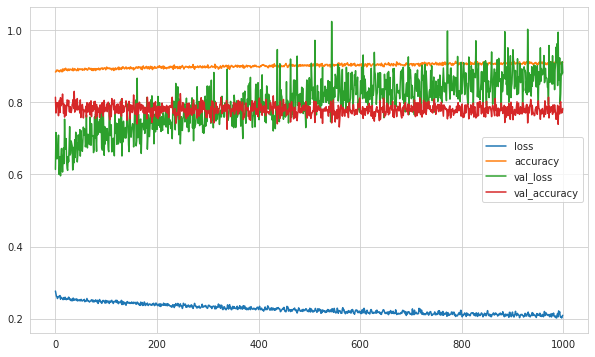

In [115]:
loss_df.plot();

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step


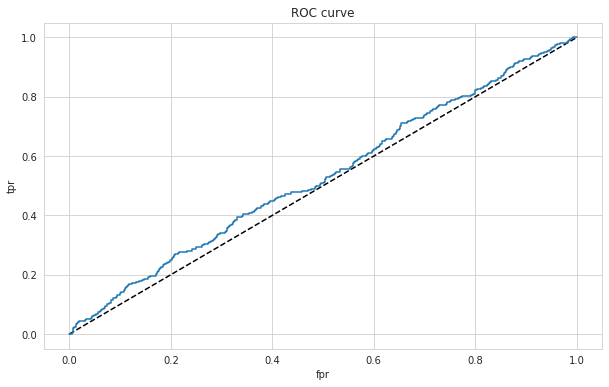

In [118]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [119]:
roc_auc_score(y_test, y_pred_proba)

0.5300816995732249

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Final Model and Model Deployment

In [121]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [122]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [123]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1, class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.6116 - accuracy: 0.6869 - val_loss: 0.5584 - val_accuracy: 0.7160
Epoch 2/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.5259 - accuracy: 0.7424 - val_loss: 0.5197 - val_accuracy: 0.7385
Epoch 3/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.4930 - accuracy: 0.7650 - val_loss: 0.4844 - val_accuracy: 0.7555
Epoch 4/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.4781 - accuracy: 0.7757 - val_loss: 0.4988 - val_accuracy: 0.7515
Epoch 5/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.4667 - accuracy: 0.7865 - val_loss: 0.4438 - val_accuracy: 0.7880
Epoch 6/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.4595 - accuracy: 0.7908 - val_loss: 0.4799 - val_accuracy: 0.7570
Epoch 7/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.4563 - accuracy: 0.7903 - val_loss: 0.4671 - val_accuracy:

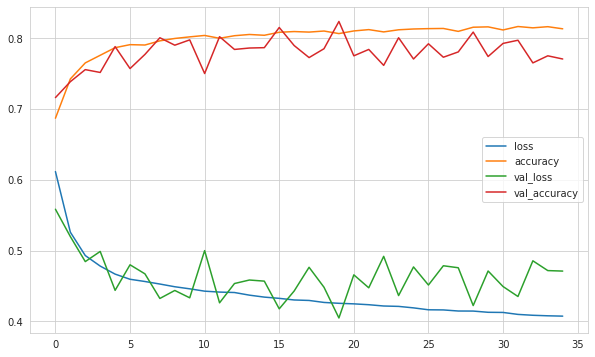

In [125]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [126]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1360  233]
 [ 120  287]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      1593
           1       0.55      0.71      0.62       407

    accuracy                           0.82      2000
   macro avg       0.74      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000



## Prediction

In [127]:
predict = df.drop('Exited', axis = 1).iloc[0:1, :]
predict

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,0,42,2,0.000,1,1,1,101348.880


In [128]:
(model.predict(predict) > 0.5).astype("int32")

1/1 [==============================] - 0s 55ms/step


array([[1]], dtype=int32)

In [129]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___